###GoogleDrive Authentication

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Text dataset

#### Data Understanding

#####Set up

In [ ]:
# Load data from GoogleDrive (this will need to be updated with your own GoogleDrive links)

tweets_train = drive.CreateFile({'id': '1fcpSV5UXfUgiI96J6fma_8h5-lJxTZ9U'})
tweets_train.GetContentFile('Tweets_train.csv')

tweets_dev = drive.CreateFile({'id': '1FosMzKQZQu6BQp_aRt1tviXgSQeYm5l_'})
tweets_dev.GetContentFile('Tweets_dev.csv')

tweets_test = drive.CreateFile({'id': '1_x-ZqLvFHOczCpKv9aDk5_Hy25FMgnjV'})
tweets_test.GetContentFile('New_Tweets_test-1.csv')

In [ ]:
# Set up
!pip3 install pandas-profiling --upgrade
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np

# Cleaning
from sklearn.pipeline import Pipeline
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
!pip3 install num2words
from num2words import num2words

# Pre-processing
import nltk
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk import PorterStemmer
from gensim.models import Word2Vec

# Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier

# Evaluation
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.8/328.8 KB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 KB 51.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 KB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 80.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 85.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 KB 33.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=948e20c74f62f5295a27d0972326614e00ccfeb5f07dfbc932f103a4aa89e408
  Stored in directory: /root/.cache/pip/wheels/23/14/6e/4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
Successfully built htmlmin
  Attempting uninstall: typeguard
    Found existing installation: typeguard 2.7.1
    Unin

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 KB 12.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=da0bf1d85b22d5c71484f0e4acd477a7b55af874c80f07678b70efca11e88b0d
  Stored in directory: /root/.cache/pip/wheels/56/ea/58/ead137b087d9e326852a851351d1debf4ada529b6ac0ec4e8c
Successfully built docopt


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
# Turn datasets into pandas data frames
train = pd.read_csv('Tweets_train.csv')
dev = pd.read_csv('Tweets_dev.csv')
test = pd.read_csv('New_Tweets_test-1.csv', encoding='utf-8')

#####Pandas Profile

In [ ]:
# View pandas profile report of train
#profile_train = ProfileReport(train, minimal=True)
#profile_train.to_notebook_iframe()

# View pandas profile report of dev
#profile_dev = ProfileReport(dev, minimal=True)
#profile_dev.to_notebook_iframe()

# View pandas profile report of test
#profile_test = ProfileReport(test, minimal=True)
#profile_test.to_notebook_iframe()

#####Other exploration

######Tweet length and word count

In [ ]:
# Train tweet length by sentiment

# Create a new column 'text_len' and add the length of the 'text' column for each row
#train["text_len"] = train["text"].astype(str).apply(len)

# Group the data by 'airline_sentiment' and calculate the mean, min, and max of 'text_len'
#round(pd.DataFrame(train.groupby("airline_sentiment").text_len.agg(['mean','min','max'])),2)

In [ ]:
# Dev tweet length by sentiment

# Create a new column 'text_len' and add the length of the 'text' column for each row
#dev["text_len"] = dev["text"].astype(str).apply(len)

# Group the data by 'airline_sentiment' and calculate the mean, min, and max of 'text_len'
#round(pd.DataFrame(dev.groupby("airline_sentiment").text_len.agg(['mean','min','max'])),2)

In [ ]:
# Test tweet length by sentiment

# Create a new column 'text_len' and add the length of the 'text' column for each row
#test["text_len"] = test["text"].astype(str).apply(len)

# Group the data by 'airline_sentiment' and calculate the mean, min, and max of 'text_len'
#round(pd.DataFrame(test.groupby("airline_sentiment").text_len.agg(['mean','min','max'])),2)

In [ ]:
# Train tweet word count by sentiment

#train["word_count"] = train["text"].apply(lambda x: len(str(x).split()))
#round(pd.DataFrame(train.groupby("airline_sentiment").word_count.agg(['mean','min','max'])),2)

In [ ]:
# Dev tweet word count by sentiment

#dev["word_count"] = dev["text"].apply(lambda x: len(str(x).split()))
#round(pd.DataFrame(dev.groupby("airline_sentiment").word_count.agg(['mean','min','max'])),2)

In [ ]:
# test tweet word count by sentiment

#test["word_count"] = test["text"].apply(lambda x: len(str(x).split()))
#round(pd.DataFrame(test.groupby("airline_sentiment").word_count.agg(['mean','min','max'])),2)

######Extract hastags and mentions

In [ ]:
# Extract hastags
#def extract_hash_tags(s):
    #hashes = re.findall(r"#(\w+)", s)
    #return " ".join(hashes)
#train['hashtags'] = train['text'].apply(lambda x : extract_hash_tags(x))
#dev['hashtags'] = dev['text'].apply(lambda x : extract_hash_tags(x))
#test['hashtags'] = test['text'].apply(lambda x : extract_hash_tags(x))

In [ ]:
# Extract mentions
#def extract_mentions(s):
   # hashes = re.findall(r"@(\w+)", s)
   # return " ".join(hashes)
#train['mentions'] = train['text'].apply(lambda x : extract_mentions(x))
#dev['mentions'] = dev['text'].apply(lambda x : extract_mentions(x))
#test['mentions'] = test['text'].apply(lambda x : extract_mentions(x))

####Data Preparation

#####Preprocessing

In [ ]:
# Define a function to convert numbers to text
def convert_numbers_to_text(text):
    numbers = re.findall(r'\d+', text)
    for number in numbers:
        text = text.replace(number, num2words(int(number)))
    return text

In [ ]:
# Define function to clean and preprocess the datasets with nltk TweetTokenizer and WordNetLemmatizer
def preprocess_1(data):
  # Remove duplicates from data
  data.drop_duplicates(inplace = True)
  # Create new column for clean text, with text in lowercase
  data["cleantext"] = data["text"].str.lower()
  # Convert numbers to text
  data["cleantext"] = data["cleantext"].apply(convert_numbers_to_text)
  # Remove punctuation, URLs and special characters
  data["cleantext"] = data["cleantext"].apply(
    lambda x: ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)",
                              " ",x).split()))
  # Remove 'stop words'
  stop = set(stopwords.words("english"))
  data["cleantext"] = data["cleantext"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
  # Remove short words with less than 2 letters
  data["cleantext"] = data["cleantext"].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))
  # Tokenize cleantext
  tweet_tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
  data["cleantext"] = data["cleantext"].apply(tweet_tokenizer.tokenize)
  # Lemmatize tokens
  lemmatizer = WordNetLemmatizer()
  def lemmatize(s):
     s = [lemmatizer.lemmatize(word) for word in s]
     return s
  data["cleantext"] = data["cleantext"].apply(lambda x: lemmatize(x))
  # Join all the tokens back together
  data["cleantext"] = data["cleantext"].apply(lambda x: " ".join(x))
  return data


In [ ]:
# Clean and process the datasets
train_1 = preprocess_1(train)
dev_1 = preprocess_1(dev)
test_1 = preprocess_1(test)

In [ ]:
#Check it worked
print(train_1)

                 tweet_id                                               text  \
0      569179849518161920                    @united you're good. Thank you!   
1      569835751275433984  @AmericanAir way to ruin a vacation, my brothe...   
2      568588936852799488  @JetBlue yes thankfully! Catering just got her...   
3      569525116725567491  @USAirways The automated message isn't helpful...   
4      568807823187976193  @JetBlue I'm #MakingLoveOutofNothingAtAll on m...   
...                   ...                                                ...   
11853  570123872168574976  @AmericanAir will not help us on the phone, at...   
11854  570063683256242177  @USAirways has the worst customer service line...   
11855  568032524749942784  @USAirways grades for this trip:\n\nFlight tim...   
11856  569705813142409217  @united Thanks for the vague canned response t...   
11857  569976114124349440  @united already did that at the airport and 12...   

      airline_sentiment                

In [ ]:
# Define function to clean and preprocess the datasets with nltk TweetTokenizer and PorterStemmer
def preprocess_2(data):
  # Remove duplicates from data
  data.drop_duplicates(inplace = True)
  # Create new column for clean text, with text in lowercase
  data["cleantext"] = data["text"].str.lower()
  # Convert numbers to text
  data["cleantext"] = data["cleantext"].apply(convert_numbers_to_text)
  # Remove punctuation, URLs and special characters
  data["cleantext"] = data["cleantext"].apply(
    lambda x: ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)",
                              " ",x).split()))
  # Remove 'stop words'
  stop = set(stopwords.words("english"))
  data["cleantext"] = data["cleantext"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
  # Remove short words with less than 2 letters
  data["cleantext"] = data["cleantext"].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))
  # Tokenize cleantext
  tweet_tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
  data["cleantext"] = data["cleantext"].apply(tweet_tokenizer.tokenize)
  # Stem tokens
  stemmer = PorterStemmer()
  def stem(s):
     s = [stemmer.stem(word) for word in s]
     return s
  data["cleantext"] = data["cleantext"].apply(lambda x: stem(x))
  # Join all the tokens back together
  data["cleantext"] = data["cleantext"].apply(lambda x: " ".join(x))
  return data


In [ ]:
# Clean and process the datasets
train_2 = preprocess_2(train)
dev_2 = preprocess_2(dev)
test_2 = preprocess_2(test)

In [ ]:
# Check it worked
print(train_2)

                 tweet_id                                               text  \
0      569179849518161920                    @united you're good. Thank you!   
1      569835751275433984  @AmericanAir way to ruin a vacation, my brothe...   
2      568588936852799488  @JetBlue yes thankfully! Catering just got her...   
3      569525116725567491  @USAirways The automated message isn't helpful...   
4      568807823187976193  @JetBlue I'm #MakingLoveOutofNothingAtAll on m...   
...                   ...                                                ...   
11853  570123872168574976  @AmericanAir will not help us on the phone, at...   
11854  570063683256242177  @USAirways has the worst customer service line...   
11855  568032524749942784  @USAirways grades for this trip:\n\nFlight tim...   
11856  569705813142409217  @united Thanks for the vague canned response t...   
11857  569976114124349440  @united already did that at the airport and 12...   

      airline_sentiment                

#####Vectorize: CountVectorizer vs TFIDFVectorizer

In [ ]:
# Create single data set for Vectorizer
combined_1 = pd.concat([train_1, dev_1, test_1])
combined_2 = pd.concat([train_2, dev_2, test_2])

In [ ]:
# Define function for CountVectorizer
def countvectorizer(combined, data):
  countvec = CountVectorizer()
  countvec.fit(combined["cleantext"])
  X = countvec.transform(data["cleantext"])
  return X


In [ ]:
# Apply CountVectorizer 1
X_train_cv1 = countvectorizer(combined_1, train)
X_dev_cv1 = countvectorizer(combined_1, dev)
X_test_cv1 = countvectorizer(combined_1, test)

In [ ]:
# Apply CountVectorizer 2
X_train_cv2 = countvectorizer(combined_2, train)
X_dev_cv2 = countvectorizer(combined_2, dev)
X_test_cv2 = countvectorizer(combined_2, test)

In [ ]:
# Define function for TfidfVectrizer
def tfidfvectorizer(combined, data):
  tfidf = TfidfVectorizer()
  tfidf.fit(combined["cleantext"])
  X = tfidf.transform(data["cleantext"])
  return X

In [ ]:
# Apply TfidfVectorizer 1
X_train_tf1 = tfidfvectorizer(combined_1, train)
X_dev_tf1 = tfidfvectorizer(combined_1, dev)
X_test_tf1 = tfidfvectorizer(combined_1, test)

In [ ]:
# Apply TfidfVectorizer 2
X_train_tf2 = tfidfvectorizer(combined_2, train)
X_dev_tf2 = tfidfvectorizer(combined_2, dev)
X_test_tf2 = tfidfvectorizer(combined_2, test)

####Modelling Experiments

In [ ]:
# Create instance of SVM
svc = SVC(random_state = 42)

In [ ]:
# Create instance of Multinomial Naive Bayes
random_state = 42
MNB = MultinomialNB()

In [ ]:
# Create instance of RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

In [ ]:
# Initialize the lstm model
random_state=42
lstm = Sequential()

######Experiment 1: SVC + preprocess_1 + CV

In [ ]:
# Fit model to data
svc.fit(X_train_cv1, train_1["airline_sentiment"])

# Predict values with validation dataset
svc1_dev = svc.predict(X_dev_cv1)

# Get the f1-score
f1_svc1_dev = f1_score(dev_1["airline_sentiment"], svc1_dev, average='weighted')
print("F1-score: {:.2f}".format(f1_svc1_dev))

F1-score: 0.76


In [ ]:
# Get the classification report
print(classification_report(dev_1["airline_sentiment"], svc1_dev))

              precision    recall  f1-score   support

    negative       0.80      0.92      0.85       825
     neutral       0.63      0.48      0.54       279
    positive       0.78      0.56      0.66       213

    accuracy                           0.77      1317
   macro avg       0.74      0.65      0.68      1317
weighted avg       0.76      0.77      0.76      1317



######Experiment 2: SVC + preprocess_2 + CV

In [ ]:
# Fit model to data
svc.fit(X_train_cv2, train_2["airline_sentiment"])

# Predict values with validation dataset
svc2_dev = svc.predict(X_dev_cv2)

# Get the f1-score
f1_svc2_dev = f1_score(dev_2["airline_sentiment"], svc2_dev, average='weighted')
print("F1-score: {:.2f}".format(f1_svc2_dev))

F1-score: 0.76


In [ ]:
# Get the classification report
print(classification_report(dev_2["airline_sentiment"], svc2_dev))

              precision    recall  f1-score   support

    negative       0.80      0.92      0.85       825
     neutral       0.63      0.48      0.54       279
    positive       0.78      0.56      0.66       213

    accuracy                           0.77      1317
   macro avg       0.74      0.65      0.68      1317
weighted avg       0.76      0.77      0.76      1317



######Experiment 3: SVC + preprocess_1 + TFIDF

In [ ]:
# Fit model to data
svc.fit(X_train_tf1, train_1["airline_sentiment"])

# Predict values with validation dataset

svc3_dev = svc.predict(X_dev_tf1)

# Get the f1-score
f1_svc3_dev = f1_score(dev_2["airline_sentiment"], svc3_dev, average='weighted')
print("F1-score: {:.2f}".format(f1_svc3_dev))

F1-score: 0.75


In [ ]:
# Get the classification report
print(classification_report(dev_2["airline_sentiment"], svc3_dev))

              precision    recall  f1-score   support

    negative       0.77      0.96      0.85       825
     neutral       0.71      0.37      0.48       279
    positive       0.82      0.56      0.67       213

    accuracy                           0.77      1317
   macro avg       0.77      0.63      0.67      1317
weighted avg       0.77      0.77      0.75      1317



######Experiment 4: SVC + preprocess_2 + TFIDF

In [ ]:
# Fit model to data
svc.fit(X_train_tf2, train_2["airline_sentiment"])

# Predict values with validation dataset
svc4_dev = svc.predict(X_dev_tf2)

# Get the f1-score
f1_svc4_dev = f1_score(dev_2["airline_sentiment"], svc4_dev, average='weighted')
print("F1-score: {:.2f}".format(f1_svc4_dev))

F1-score: 0.75


In [ ]:
# Get the classification report
print(classification_report(dev_2["airline_sentiment"], svc4_dev))

              precision    recall  f1-score   support

    negative       0.77      0.96      0.85       825
     neutral       0.71      0.37      0.48       279
    positive       0.82      0.56      0.67       213

    accuracy                           0.77      1317
   macro avg       0.77      0.63      0.67      1317
weighted avg       0.77      0.77      0.75      1317



######Learnings: There does not appear to be a difference between preprocess 1 and preprocess 2, but CounterVectorizer produces a better F1-score for this data.

######Experiment 5: GridSearchCV + SVC

In [ ]:
# Define the parameter grid for the GridSearchCV
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
# Also tried with wider grid of [10, 50, 100, 200, 500] and [0.01, 0.1, 1, 10, 100], but this didn't improve score.
# Also tried searching with kernamls  'poly', 'sigmoid', but this didn't improve the results.

# Create the GridSearchCV object
grid_search = GridSearchCV(svc, param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train_cv1, train_1["airline_sentiment"])

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'C': 0.1, 'kernel': 'linear'}
Best score: 0.7726700056797645


In [ ]:
# Create instance of SVC with best parameters
svc_best = SVC(**grid_search.best_params_)

# Fit model to data
svc_best.fit(X_train_cv1, train_1["airline_sentiment"])

# Predict values with validation dataset
svc5_dev = svc.predict(X_dev_cv1)

# Get the f1-score
f1_svc5_dev = f1_score(dev_1["airline_sentiment"], svc5_dev, average='weighted')
print("F1-score: {:.2f}".format(f1_svc5_dev))

F1-score: 0.55


In [ ]:
# Get the classification report
print(classification_report(dev_1["airline_sentiment"], svc5_dev))

              precision    recall  f1-score   support

    negative       0.65      0.99      0.79       825
     neutral       0.59      0.04      0.07       279
    positive       0.90      0.17      0.29       213

    accuracy                           0.66      1317
   macro avg       0.71      0.40      0.38      1317
weighted avg       0.68      0.66      0.55      1317



######Experiment 6: Feature Selection + SVC

In [ ]:
# Define the feature selection method
ch2 = SelectKBest(chi2, k=1000)
X = ch2.fit_transform(X_train_cv1, train_1["airline_sentiment"])
X_dev = ch2.fit_transform(X_dev_cv1, dev_1["airline_sentiment"])

# Fit the model to the data
svc.fit(X, train_1["airline_sentiment"])

# Predict values with validation dataset
svc6_dev = svc.predict(X_dev)

# Get the f1-score
f1_svc6_dev = f1_score(dev_1["airline_sentiment"], svc6_dev, average='weighted')
print("F1-score: {:.2f}".format(f1_svc6_dev))

F1-score: 0.54


In [ ]:
# Get the classification report
print(classification_report(dev_1["airline_sentiment"], svc6_dev))

              precision    recall  f1-score   support

    negative       0.71      0.72      0.72       825
     neutral       0.29      0.44      0.35       279
    positive       0.34      0.08      0.14       213

    accuracy                           0.56      1317
   macro avg       0.45      0.41      0.40      1317
weighted avg       0.56      0.56      0.54      1317



######Learnings: The defaults of SVC produce a better result for this data than GridSearch or Feature selection to tune the parameters.

######Experiment 7: MNB



In [ ]:
# Fit model to data
MNB.fit(X_train_cv1, train_1["airline_sentiment"])

# Predict values with validation dataset
MNB1_dev = MNB.predict(X_dev_cv1)

# Get the f1-score
f1_MNB1_dev = f1_score(dev_1["airline_sentiment"], MNB1_dev, average='weighted')
print("F1-score: {:.2f}".format(f1_MNB1_dev))

F1-score: 0.73


In [ ]:
# Get the classification report
print(classification_report(dev_1["airline_sentiment"], MNB1_dev))

              precision    recall  f1-score   support

    negative       0.77      0.93      0.85       825
     neutral       0.63      0.37      0.47       279
    positive       0.72      0.54      0.61       213

    accuracy                           0.75      1317
   macro avg       0.71      0.61      0.64      1317
weighted avg       0.73      0.75      0.73      1317



Learnings: SVC is better than MNB.

######Experiment 8: SVC + StackingClassifier

In [ ]:
# Create an instance of the StackingClassifier
stacking = StackingClassifier(estimators=[('svc', svc)], final_estimator=LogisticRegression())

# Fit model to data
stacking.fit(X_train_cv1, train_1["airline_sentiment"])

# Predict values with validation dataset
stacking_dev = stacking.predict(X_dev_cv1)

# Get the f1-score
f1_stacking_dev = f1_score(dev_1["airline_sentiment"], stacking_dev, average='weighted')
print("F1-score: {:.2f}".format(f1_stacking_dev))

F1-score: 0.76


In [ ]:
# Get the classification report
print(classification_report(dev_1["airline_sentiment"], stacking_dev))

              precision    recall  f1-score   support

    negative       0.80      0.92      0.85       825
     neutral       0.63      0.48      0.54       279
    positive       0.78      0.56      0.65       213

    accuracy                           0.77      1317
   macro avg       0.73      0.65      0.68      1317
weighted avg       0.76      0.77      0.76      1317



######Experiment 9: Ensembled VotingClassifier + RandomForest + SVC

In [ ]:
# Instantiate the ensemble model
ensemble1 = VotingClassifier(estimators=[('rf', rf), ('svc', svc)], voting='hard')

# Fit model to data
ensemble1.fit(X_train_cv1, train_1["airline_sentiment"])

# Predict values with validation dataset
ensemble1_dev = ensemble1.predict(X_dev_cv1)

# Get the f1-score
f1_ensemble1_dev = f1_score(dev_1["airline_sentiment"], ensemble1_dev, average='weighted')
print("F1-score: {:.2f}".format(f1_ensemble1_dev))

F1-score: 0.74


In [ ]:
# Get the classification report
print(classification_report(dev_1["airline_sentiment"], ensemble1_dev))

              precision    recall  f1-score   support

    negative       0.77      0.95      0.85       825
     neutral       0.68      0.40      0.50       279
    positive       0.82      0.51      0.63       213

    accuracy                           0.76      1317
   macro avg       0.76      0.62      0.66      1317
weighted avg       0.76      0.76      0.74      1317



######Experiment 10: Ensembled VotingClassifier + MNB + SVC

In [ ]:
# Instantiate the ensemble model
ensemble2 = VotingClassifier(estimators=[('MNB', MNB), ('svc', svc)], voting='hard')

# Fit model to data
ensemble2.fit(X_train_cv1, train_1["airline_sentiment"])

# Predict values with validation dataset
ensemble2_dev = ensemble2.predict(X_dev_cv1)

# Get the f1-score
f1_ensemble2_dev = f1_score(dev_1["airline_sentiment"], ensemble2_dev, average='weighted')
print("F1-score: {:.2f}".format(f1_ensemble2_dev))

F1-score: 0.71


In [ ]:
# Get the classification report
print(classification_report(dev_1["airline_sentiment"], ensemble2_dev))

              precision    recall  f1-score   support

    negative       0.74      0.97      0.84       825
     neutral       0.69      0.30      0.42       279
    positive       0.87      0.45      0.59       213

    accuracy                           0.75      1317
   macro avg       0.77      0.57      0.62      1317
weighted avg       0.75      0.75      0.71      1317



Learnings: Stacked with LogisticRegression is better than other ensembled approaches tried. However, it produces same f1-score as straight SVC.

######Experiment 11: LSTM

In [ ]:
# Define the maximum number of words to keep
max_words = 140 #36 is the max number of words in a tweet, but it produced a lower f1-score, as did 100 and 200.

# Define the maximum length of a tweet
max_length = 200 #186 is the max length of the tweets, so rounded to 200.

# Initialize the Tokenizer
tokenizer = Tokenizer(num_words=max_words)

# Fit the tokenizer to the data
tokenizer.fit_on_texts(combined_1["cleantext"]) # Does this tokenizer need to see the whole data set like CountVec?

# Convert the data sets to sequences of integers
X_train_LSTM = tokenizer.texts_to_sequences(train_1["cleantext"])
X_dev_LSTM = tokenizer.texts_to_sequences(dev_1["cleantext"])
X_test_LSTM = tokenizer.texts_to_sequences(test_1["cleantext"])

# Pad the sequences to the maximum length
X_train_LSTM = pad_sequences(X_train_LSTM, maxlen=max_length)
X_dev_LSTM = pad_sequences(X_dev_LSTM, maxlen=max_length)
X_test_LSTM = pad_sequences(X_test_LSTM, maxlen=max_length)

# Define the number of dimensions for the embedding layer
embedding_dims = 32 # Tried 64 and 128, both lowered the f1-score

# Initialize the model
model = Sequential()

# Add an embedding layer
model.add(Embedding(max_words, embedding_dims, input_length=max_length))

#Add dropout layer
model.add(Dropout(0.4))

# Add an LSTM layer
model.add(LSTM(128)) # 64 produced a max f1-score of 71

# Add a dense layer
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Initialize the encoder
encoder = LabelEncoder()

# Fit the encoder on the sentiment labels
encoder.fit(train_1["airline_sentiment"])

# Transform the sentiment labels to integers
y_train_LSTM = encoder.transform(train_1["airline_sentiment"])
y_dev_LSTM = encoder.transform(dev_1["airline_sentiment"])
y_test_LSTM = encoder.transform(test_1["airline_sentiment"])

#2 is positive
#1 is neutral
#0 is negative

In [ ]:
# Set up callback in keras to stop the training when the performance on the validation set stops improving
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')

# Train the model (initially tried 50 epochs, but all tests seemed to finish before 20, so adjusted accordingly)
model.fit(X_train_LSTM, y_train_LSTM, batch_size=32, epochs=50, callbacks=[early_stop], validation_data=(X_dev_LSTM, y_dev_LSTM))

Epoch 1/50
368/368 [==============================] - 12s 15ms/step - loss: 0.7716 - accuracy: 0.6723 - val_loss: 0.6735 - val_accuracy: 0.7183
Epoch 2/50
368/368 [==============================] - 5s 13ms/step - loss: 0.6651 - accuracy: 0.7196 - val_loss: 0.6634 - val_accuracy: 0.7236
Epoch 3/50
368/368 [==============================] - 5s 13ms/step - loss: 0.6527 - accuracy: 0.7235 - val_loss: 0.6624 - val_accuracy: 0.7229
Epoch 4/50
368/368 [==============================] - 5s 13ms/step - loss: 0.6480 - accuracy: 0.7250 - val_loss: 0.6515 - val_accuracy: 0.7312
Epoch 5/50
368/368 [==============================] - 5s 13ms/step - loss: 0.6525 - accuracy: 0.7248 - val_loss: 0.6556 - val_accuracy: 0.7267
Epoch 6/50
368/368 [==============================] - 5s 13ms/step - loss: 0.6433 - accuracy: 0.7261 - val_loss: 0.6530 - val_accuracy: 0.7251
Epoch 7/50
368/368 [==============================] - 5s 13ms/step - loss: 0.6365 - accuracy: 0.7316 - val_loss: 0.6543 - val_accuracy: 0.730

In [ ]:
# Predict the labels for the test set
y_pred_LSTM = model.predict(X_dev_LSTM)
y_pred_LSTM = np.argmax(y_pred_LSTM, axis=1)

# Get the f1-score
f1_LSTM = f1_score(y_dev_LSTM, y_pred_LSTM, average='weighted')
print("F1-score: {:.2f}".format(f1_LSTM))

42/42 [==============================] - 1s 6ms/step
F1-score: 0.72


In [ ]:
# Get the classification report
print(classification_report(y_dev_LSTM, y_pred_LSTM))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81       825
           1       0.51      0.50      0.51       279
           2       0.75      0.56      0.64       213

    accuracy                           0.72      1317
   macro avg       0.68      0.64      0.65      1317
weighted avg       0.72      0.72      0.72      1317



Learnings: The LSTM has a lower f1-score than the default SVC, despite my attempts at hyperparameter tuning.

#### Evaluation

Best models applied to test data with f1-score, classification report and confusion matrix.

######Experiment 1

In [ ]:
# Predict values with test dataset
svc1_test = svc.predict(X_test_cv1)

# Get the f1-score
f1_svc1_test = f1_score(test_1["airline_sentiment"], svc1_test, average='weighted')
print("F1-score: {:.2f}".format(f1_svc1_test))

F1-score: 0.77


In [ ]:
# Get the classification report
print(classification_report(test_1["airline_sentiment"], svc1_test))

              precision    recall  f1-score   support

    negative       0.82      0.92      0.86       918
     neutral       0.64      0.52      0.57       310
    positive       0.72      0.56      0.63       236

    accuracy                           0.78      1464
   macro avg       0.73      0.66      0.69      1464
weighted avg       0.76      0.78      0.77      1464



In [ ]:
# Create the confusion matrix
svc1_matrix = confusion_matrix(test_1["airline_sentiment"], svc1_test)

In [ ]:
# Check order of classes in matrix
svc.classes_

array(['negative', 'neutral', 'positive'], dtype=object)

[Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Neutral'), Text(0, 2.5, 'Positive')]

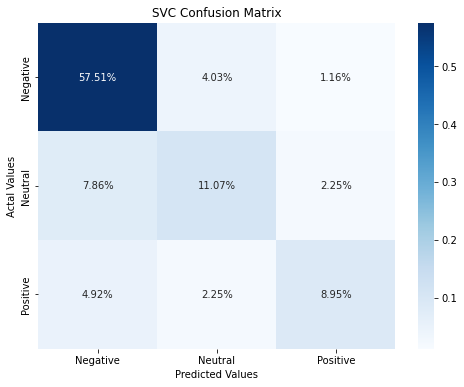

In [ ]:
# Plot the matrix
plt.figure(figsize=(8,6))
sv1_map = sns.heatmap(svc1_matrix/np.sum(svc1_matrix), annot=True,
            fmt='.2%', cmap='Blues')
plt.title('SVC Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
sv1_map.xaxis.set_ticklabels(['Negative','Neutral','Positive'])
sv1_map.yaxis.set_ticklabels(['Negative','Neutral','Positive'])

######Experiment 8

In [ ]:
# Predict values with test dataset
stacking_test = stacking.predict(X_test_cv1)

# Get the f1-score
f1_stacking_test = f1_score(test_1["airline_sentiment"], stacking_test, average='weighted')
print("F1-score: {:.2f}".format(f1_stacking_test))

F1-score: 0.77


In [ ]:
# Get the classification report
print(classification_report(test_1["airline_sentiment"], stacking_test))

              precision    recall  f1-score   support

    negative       0.82      0.92      0.87       918
     neutral       0.64      0.52      0.57       310
    positive       0.72      0.56      0.63       236

    accuracy                           0.78      1464
   macro avg       0.73      0.67      0.69      1464
weighted avg       0.77      0.78      0.77      1464



In [ ]:
# Create the confusion matrix
stacking_matrix = confusion_matrix(test_1["airline_sentiment"], stacking_test)

[Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Neutral'), Text(0, 2.5, 'Positive')]

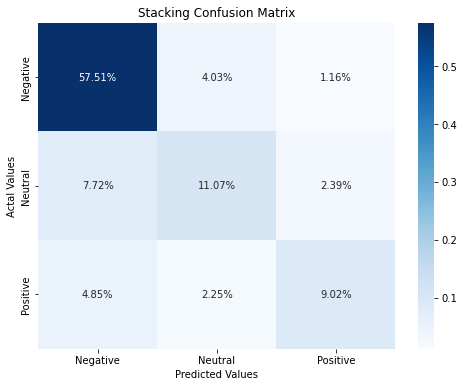

In [ ]:
# Plot the matrix
plt.figure(figsize=(8,6))
stacking_map = sns.heatmap(stacking_matrix/np.sum(stacking_matrix), annot=True,
            fmt='.2%', cmap='Blues')
plt.title('Stacking Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
stacking_map.xaxis.set_ticklabels(['Negative','Neutral','Positive'])
stacking_map.yaxis.set_ticklabels(['Negative','Neutral','Positive'])

######Experiment 11

In [ ]:
# Predict the labels for the test set
y_test_LSTM = model.predict(X_test_LSTM)
y_test_LSTM = np.argmax(y_test_LSTM, axis=1)

# Get the f1-score
f1_LSTM = f1_score(y_test_LSTM, y_test_LSTM, average='weighted')
print("F1-score: {:.2f}".format(f1_LSTM))

46/46 [==============================] - 0s 6ms/step
F1-score: 1.00


In [ ]:
# Get the classification report
print(classification_report(y_test_LSTM, y_test_LSTM))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       962
           1       1.00      1.00      1.00       316
           2       1.00      1.00      1.00       186

    accuracy                           1.00      1464
   macro avg       1.00      1.00      1.00      1464
weighted avg       1.00      1.00      1.00      1464



In [ ]:
# Create the confusion matrix
LSTM_matrix = confusion_matrix(y_test_LSTM, y_test_LSTM)

[Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Neutral'), Text(0, 2.5, 'Positive')]

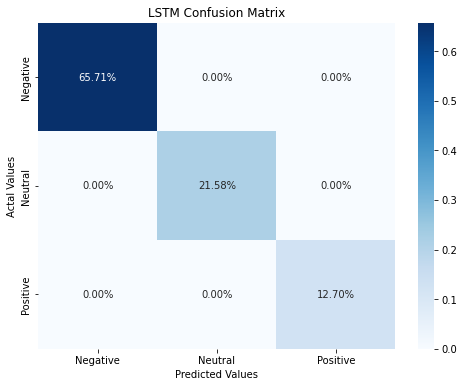

In [ ]:
# Plot the matrix
plt.figure(figsize=(8,6))
LSTM_map = sns.heatmap(LSTM_matrix/np.sum(LSTM_matrix), annot=True,
            fmt='.2%', cmap='Blues')
plt.title('LSTM Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
LSTM_map.xaxis.set_ticklabels(['Negative','Neutral','Positive'])
LSTM_map.yaxis.set_ticklabels(['Negative','Neutral','Positive'])

# Time series dataset

####Data Understanding

#####Set up

In [ ]:
# Load data from GoogleDrive
weather = drive.CreateFile({'id': '1vqyYG19YDW1SCWf3syIOPV3EkgDZH0Cv'})
weather.GetContentFile('weather.csv')

In [ ]:
# Set up
!pip3 install pandas-profiling --upgrade
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import tensorflow as tf

# Pre-processing
import statsmodels.api as sm
import statistics

# Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout
from sklearn.pipeline import Pipeline
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.base import TransformerMixin
from keras.layers import Conv1D, MaxPooling1D, Flatten

# Evaluation
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
import matplotlib.pyplot as plt


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.7/328.7 KB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 KB 14.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 KB 51.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 91.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 102.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 KB 2.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=489ea0fde39208858965bf439824c0218d2be7b3bf8c915ae79c5574b1938386
  Stored in directory: /root/.cache/pip/wheels/23/14/6e/4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
Successfully built htmlmin
  Attempting uninstall: typeguard
    Found existing installation: typeguard 2.7.1
    Uni

#####Pandas Profile

In [ ]:
# Turn data sets into pandas data frames
data_pd = pd.read_csv('weather.csv', index_col=False)
data_pd.columns =['datetime', 'intemp1', 'outtemp', 'cputemp', 'count', 'intemp2', 'airpressure', 'humidity'] # Name columns

# Print to check it has worked
print(data_pd)

                               datetime  intemp1  outtemp  cputemp  count  \
0       Wed 17 Nov 2021 03:21:02 PM GMT     24.2      9.8   36.318      1   
1       Wed 17 Nov 2021 03:22:03 PM GMT     24.2      9.8   36.856      1   
2       Wed 17 Nov 2021 03:23:05 PM GMT     24.2      9.8   40.840      1   
3       Wed 17 Nov 2021 03:24:02 PM GMT     24.2      9.8   36.856      1   
4       Wed 17 Nov 2021 03:25:03 PM GMT     24.2      9.8   36.856      1   
...                                 ...      ...      ...      ...    ...   
545431  Thu 01 Dec 2022 09:58:02 AM GMT     19.9      4.5   31.476      1   
545432  Thu 01 Dec 2022 09:59:03 AM GMT     19.9      4.5   32.140      1   
545433  Thu 01 Dec 2022 10:00:02 AM GMT     19.9      4.5   32.140      1   
545434  Thu 01 Dec 2022 10:01:03 AM GMT     19.9      4.5   32.140      1   
545435  Thu 01 Dec 2022 10:02:02 AM GMT     19.9      4.5   32.140      1   

        intemp2  airpressure  humidity  
0         26.22      1006.76     3

In [ ]:
# Create and view pandas profiling report
profile = ProfileReport(data_pd, minimal=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

####Data Preparation

#####Data Cleaning

In [ ]:
# Remove any duplicates
data_pd.drop_duplicates(inplace = True)

# Remove count column
withoutcount = data_pd.drop(columns=['count'])

# Remove missing value in timestamp
withoutmissing = withoutcount.drop(withoutcount[withoutcount.datetime=='?'].index)

# Remove last 4 characters in string to remove GMT/BST (not ideal, but can't get other methods to work for now.)
withoutmissing['datetime'] = withoutmissing['datetime'].str[:-4]

In [ ]:
# Check it worked
print(withoutmissing)

                           datetime  intemp1  outtemp  cputemp  intemp2  \
0       Wed 17 Nov 2021 03:21:02 PM     24.2      9.8   36.318    26.22   
1       Wed 17 Nov 2021 03:22:03 PM     24.2      9.8   36.856    26.24   
2       Wed 17 Nov 2021 03:23:05 PM     24.2      9.8   40.840    26.28   
3       Wed 17 Nov 2021 03:24:02 PM     24.2      9.8   36.856    26.47   
4       Wed 17 Nov 2021 03:25:03 PM     24.2      9.8   36.856    26.59   
...                             ...      ...      ...      ...      ...   
545431  Thu 01 Dec 2022 09:58:02 AM     19.9      4.5   31.476    21.17   
545432  Thu 01 Dec 2022 09:59:03 AM     19.9      4.5   32.140    21.14   
545433  Thu 01 Dec 2022 10:00:02 AM     19.9      4.5   32.140    21.15   
545434  Thu 01 Dec 2022 10:01:03 AM     19.9      4.5   32.140    21.07   
545435  Thu 01 Dec 2022 10:02:02 AM     19.9      4.5   32.140    21.07   

        airpressure  humidity  
0           1006.76     31.03  
1           1006.80     30.98  
2  

#####Data Preprocessing

In [ ]:
# Convert pandas object to datetime object
datetime_isolated = pd.to_datetime(withoutmissing['datetime'])
withoutmissing.datetime = datetime_isolated

In [ ]:
#Create reference to the clean new data
data_clean = withoutmissing

In [ ]:
# Check it worked
print(data_clean)

                  datetime  intemp1  outtemp  cputemp  intemp2  airpressure  \
0      2021-11-17 15:21:02     24.2      9.8   36.318    26.22      1006.76   
1      2021-11-17 15:22:03     24.2      9.8   36.856    26.24      1006.80   
2      2021-11-17 15:23:05     24.2      9.8   40.840    26.28      1006.84   
3      2021-11-17 15:24:02     24.2      9.8   36.856    26.47      1006.86   
4      2021-11-17 15:25:03     24.2      9.8   36.856    26.59      1006.90   
...                    ...      ...      ...      ...      ...          ...   
545431 2022-12-01 09:58:02     19.9      4.5   31.476    21.17      1016.14   
545432 2022-12-01 09:59:03     19.9      4.5   32.140    21.14      1016.12   
545433 2022-12-01 10:00:02     19.9      4.5   32.140    21.15      1016.14   
545434 2022-12-01 10:01:03     19.9      4.5   32.140    21.07      1016.16   
545435 2022-12-01 10:02:02     19.9      4.5   32.140    21.07      1016.14   

        humidity  
0          31.03  
1          30

In [ ]:
# Calculate observations per day for train/test split
observations_per_day = data_clean.groupby(data_clean['datetime'].dt.date).count()
print(observations_per_day)

# Calculate the median
median_observations = statistics.median(observations_per_day['datetime'])
print(median_observations) #1440

# Define a custom function to check if the number of observations is less than the median
def check_median(row):
    return row['datetime'] < median_observations

# Apply the function to each row
results = observations_per_day.apply(check_median, axis=1)

# Count the number of rows where the function returns True
num_days_below_median = results.sum()

print(num_days_below_median)

# Select only the rows where the function returns True
filtered_observations_per_day = observations_per_day[results]

# Get a list of the dates that have fewer than the median number of observations
dates_below_median = filtered_observations_per_day.index.tolist()
print(dates_below_median)

            datetime  intemp1  outtemp  cputemp  intemp2  airpressure  \
datetime                                                                
2021-11-17       519      519      519      519      519          519   
2021-11-18      1440     1440     1440     1440     1440         1440   
2021-11-19      1440     1440     1440     1440     1440         1440   
2021-11-20      1440     1440     1440     1440     1440         1440   
2021-11-21      1440     1440     1440     1440     1440         1440   
...              ...      ...      ...      ...      ...          ...   
2022-11-27      1440     1440     1440     1440     1440         1440   
2022-11-28      1440     1440     1440     1440     1440         1440   
2022-11-29      1440     1440     1440     1440     1440         1440   
2022-11-30      1440     1440     1440     1440     1440         1440   
2022-12-01       603      603      603      603      603          603   

            humidity  
datetime              
2021

In [ ]:
# Remove dates with less than 1440 observations (60 minutes in 24 hours)
data = data_clean[data_clean['datetime'].dt.date != pd.to_datetime('2021-11-17').date()]
data = data[data['datetime'].dt.date != pd.to_datetime('2022-03-27').date()]
data = data[data['datetime'].dt.date != pd.to_datetime('2022-09-10').date()]
data = data[data['datetime'].dt.date != pd.to_datetime('2022-12-01').date()]

In [ ]:
# Repeat calculations for median to confirm it worked
# Calculate observations per day for train/test split
observations_per_day2 = data.groupby(data['datetime'].dt.date).count()
print(observations_per_day2)

# Calculate the median
median_observations2 = statistics.median(observations_per_day2['datetime'])

# Define a custom function to check if the number of observations is less than the median
def check_median2(row):
    return row['datetime'] < median_observations2

# Apply the function to each row
results2 = observations_per_day2.apply(check_median2, axis=1)

# Count the number of rows where the function returns True
num_days_below_median2 = results2.sum()

print(num_days_below_median2)

            datetime  intemp1  outtemp  cputemp  intemp2  airpressure  \
datetime                                                                
2021-11-18      1440     1440     1440     1440     1440         1440   
2021-11-19      1440     1440     1440     1440     1440         1440   
2021-11-20      1440     1440     1440     1440     1440         1440   
2021-11-21      1440     1440     1440     1440     1440         1440   
2021-11-22      1440     1440     1440     1440     1440         1440   
...              ...      ...      ...      ...      ...          ...   
2022-11-26      1440     1440     1440     1440     1440         1440   
2022-11-27      1440     1440     1440     1440     1440         1440   
2022-11-28      1440     1440     1440     1440     1440         1440   
2022-11-29      1440     1440     1440     1440     1440         1440   
2022-11-30      1440     1440     1440     1440     1440         1440   

            humidity  
datetime              
2021

In [ ]:
# Convert datetime to numeric
data["datetime"] = pd.to_numeric(data["datetime"])

#####Create Test and Train

In [ ]:
# test_size = 1440*100 # 144000 - which will give us at least two months (89280) on uninterupted data + some data from the outlier in temperature
# Using test size ensures the data is cut at the same point everytime, so random.seed() should not be necessary.

# Function for splitting into train data set
def train (data):
  test_size = 144000
  data_train = data[:-test_size]
  return data_train

# Function for splitting into test data set
def test (data):
  test_size = 144000
  data_test = data[-test_size:]
  return data_test

In [ ]:
# Create test and train sets
train = train(data)
test = test(data)

In [ ]:
# Create new data sets that join datetime with individual weather measures as separate data sets
internal1_train = pd.concat([train.datetime, train.intemp1], axis=1)
internal2_train = pd.concat([train.datetime, train.intemp2], axis=1)
external_train = pd.concat([train.datetime, train.outtemp], axis=1)
cputemp_train = pd.concat([train.datetime, train.cputemp], axis=1)
airpressure_train = pd.concat([train.datetime, train.airpressure], axis=1)
humidity_train = pd.concat([train.datetime, train.humidity], axis=1)

internal1_test = pd.concat([test.datetime, test.intemp1], axis=1)
internal2_test = pd.concat([test.datetime, test.intemp2], axis=1)
external_test = pd.concat([test.datetime, test.outtemp], axis=1)
cputemp_test = pd.concat([test.datetime, test.cputemp], axis=1)
airpressure_test = pd.concat([test.datetime, test.airpressure], axis=1)
humidity_test = pd.concat([test.datetime, test.humidity], axis=1)

In [ ]:
# Check it worked as expected
print(internal1_train)

                   datetime  intemp1
519     1637193604000000000     22.7
520     1637193663000000000     22.7
521     1637193722000000000     22.6
522     1637193783000000000     22.6
523     1637193842000000000     22.6
...                     ...      ...
399395  1661129762000000000     25.1
399396  1661129823000000000     25.1
399397  1661129883000000000     25.1
399398  1661129942000000000     25.0
399399  1661130003000000000     25.0

[397501 rows x 2 columns]


##### Create time intervals for X and y

In [ ]:
def create_dataset(data, n_steps=1):
    X, y = [], []
    for i in range(len(data) - n_steps):
        a = data.iloc[i:(i+n_steps), 1:]
        X.append(a)
        y.append(data.iloc[i + n_steps, 1:])
    return np.array(X), np.array(y)

###### Internal1

In [ ]:
# 5min
x_train_in5, y_train_in5 = create_dataset(internal1_train, n_steps=5)
x_test_in5, y_test_in5 = create_dataset(internal1_test, n_steps=5)

# 10min
x_train_in10, y_train_in10 = create_dataset(internal1_train, n_steps=10)
x_test_in10, y_test_in10 = create_dataset(internal1_test, n_steps=10)

# 15min
x_train_in15, y_train_in15 = create_dataset(internal1_train, n_steps=15)
x_test_in15, y_test_in15 = create_dataset(internal1_test, n_steps=15)

# 30min
x_train_in30, y_train_in30 = create_dataset(internal1_train, n_steps=30)
x_test_in30, y_test_in30 = create_dataset(internal1_test, n_steps=30)

# 1hours
x_train_in60, y_train_in60 = create_dataset(internal1_train, n_steps=60)
x_test_in60, y_test_in60 = create_dataset(internal1_test, n_steps=60)

# 2hours
x_train_in120, y_train_in120 = create_dataset(internal1_train, n_steps=120)
x_test_in120, y_test_in120 = create_dataset(internal1_test, n_steps=120)

# 6hours
x_train_in360, y_train_in360 = create_dataset(internal1_train, n_steps=360)
x_test_in360, y_test_in360 = create_dataset(internal1_test, n_steps=360)

# 12hours
x_train_in720, y_train_in720 = create_dataset(internal1_train, n_steps=720)
x_test_in720, y_test_in720 = create_dataset(internal1_test, n_steps=720)

In [ ]:
# Check it worked
print(x_train_in5)

[[[22.7]
  [22.7]
  [22.6]
  [22.6]
  [22.6]]

 [[22.7]
  [22.6]
  [22.6]
  [22.6]
  [22.6]]

 [[22.6]
  [22.6]
  [22.6]
  [22.6]
  [22.6]]

 ...

 [[25.1]
  [25.1]
  [25.1]
  [25.1]
  [25.1]]

 [[25.1]
  [25.1]
  [25.1]
  [25.1]
  [25.1]]

 [[25.1]
  [25.1]
  [25.1]
  [25.1]
  [25. ]]]


In [ ]:
# Check it worked
print(y_train_in5)

[[22.6]
 [22.6]
 [22.6]
 ...
 [25.1]
 [25. ]
 [25. ]]


###### Internal2

In [ ]:
# 5min
x_train_in25, y_train_in25 = create_dataset(internal2_train, n_steps=5)
x_test_in25, y_test_in25 = create_dataset(internal2_test, n_steps=5)

# 10min
x_train_in210, y_train_in210 = create_dataset(internal2_train, n_steps=10)
x_test_in210, y_test_in210 = create_dataset(internal2_test, n_steps=10)

# 15min
x_train_in215, y_train_in215 = create_dataset(internal2_train, n_steps=15)
x_test_in215, y_test_in215 = create_dataset(internal2_test, n_steps=15)

# 30min
x_train_in230, y_train_in230 = create_dataset(internal2_train, n_steps=30)
x_test_in230, y_test_in230 = create_dataset(internal2_test, n_steps=30)

# 1hours
x_train_in260, y_train_in260 = create_dataset(internal2_train, n_steps=60)
x_test_in260, y_test_in260 = create_dataset(internal2_test, n_steps=60)

# 2hours
x_train_in2120, y_train_in2120 = create_dataset(internal2_train, n_steps=120)
x_test_in2120, y_test_in2120 = create_dataset(internal2_test, n_steps=120)

# 6hours
x_train_in2360, y_train_in2360 = create_dataset(internal2_train, n_steps=360)
x_test_in2360, y_test_in2360 = create_dataset(internal2_test, n_steps=360)

# 12hours
x_train_in2720, y_train_in2720 = create_dataset(internal2_train, n_steps=720)
x_test_in2720, y_test_in2720 = create_dataset(internal2_test, n_steps=720)

###### External

In [ ]:
# 5min
x_train_out5, y_train_out5 = create_dataset(external_train, n_steps=5)
x_test_out5, y_test_out5 = create_dataset(external_test, n_steps=5)

# 10min
x_train_out10, y_train_out10 = create_dataset(external_train, n_steps=10)
x_test_out10, y_test_out10 = create_dataset(external_test, n_steps=10)

# 15min
x_train_out15, y_train_out15 = create_dataset(external_train, n_steps=15)
x_test_out15, y_test_out15 = create_dataset(external_test, n_steps=15)

# 30min
x_train_out30, y_train_out30 = create_dataset(external_train, n_steps=30)
x_test_out30, y_test_out30 = create_dataset(external_test, n_steps=30)

# 1hours
x_train_out60, y_train_out60 = create_dataset(external_train, n_steps=60)
x_test_out60, y_test_out60 = create_dataset(external_test, n_steps=60)

# 2hours
x_train_out120, y_train_out120 = create_dataset(external_train, n_steps=120)
x_test_out120, y_test_out120 = create_dataset(external_test, n_steps=120)

# 6hours
x_train_out360, y_train_out360 = create_dataset(external_train, n_steps=360)
x_test_out360, y_test_out360 = create_dataset(external_test, n_steps=360)

# 12hours
x_train_out720, y_train_out720 = create_dataset(external_train, n_steps=720)
x_test_out720, y_test_out720 = create_dataset(external_test, n_steps=720)

###### CPUtemp

In [ ]:
# 5min
x_train_cpu5, y_train_cpu5 = create_dataset(cputemp_train, n_steps=5)
x_test_cpu5, y_test_cpu5 = create_dataset(cputemp_test, n_steps=5)

# 10min
x_train_cpu10, y_train_cpu10 = create_dataset(cputemp_train, n_steps=10)
x_test_cpu10, y_test_cpu10 = create_dataset(cputemp_test, n_steps=10)

# 15min
x_train_cpu15, y_train_cpu15 = create_dataset(cputemp_train, n_steps=15)
x_test_cpu15, y_test_cpu15 = create_dataset(cputemp_test, n_steps=15)

# 30min
x_train_cpu30, y_train_cpu30 = create_dataset(cputemp_train, n_steps=30)
x_test_cpu30, y_test_cpu30 = create_dataset(cputemp_test, n_steps=30)

# 1hours
x_train_cpu60, y_train_cpu60 = create_dataset(cputemp_train, n_steps=60)
x_test_cpu60, y_test_cpu60 = create_dataset(cputemp_test, n_steps=60)

# 2hours
x_train_cpu120, y_train_cpu120 = create_dataset(cputemp_train, n_steps=120)
x_test_cpu120, y_test_cpu120 = create_dataset(cputemp_test, n_steps=120)

# 6hours
x_train_cpu360, y_train_cpu360 = create_dataset(cputemp_train, n_steps=360)
x_test_cpu360, y_test_cpu360 = create_dataset(cputemp_test, n_steps=360)

# 12hours
x_train_cpu720, y_train_cpu720 = create_dataset(cputemp_train, n_steps=720)
x_test_cpu720, y_test_cpu720 = create_dataset(cputemp_test, n_steps=720)

###### Airpressure

In [ ]:
# 5min
x_train_air5, y_train_air5 = create_dataset(airpressure_train, n_steps=5)
x_test_air5, y_test_air5 = create_dataset(airpressure_test, n_steps=5)

# 10min
x_train_air10, y_train_air10 = create_dataset(airpressure_train, n_steps=10)
x_test_air10, y_test_air10 = create_dataset(airpressure_test, n_steps=10)

# 15min
x_train_air15, y_train_air15 = create_dataset(airpressure_train, n_steps=15)
x_test_air15, y_test_air15 = create_dataset(airpressure_test, n_steps=15)

# 30min
x_train_air30, y_train_air30 = create_dataset(airpressure_train, n_steps=30)
x_test_air30, y_test_air30 = create_dataset(airpressure_test, n_steps=30)

# 1hours
x_train_air60, y_train_air60 = create_dataset(airpressure_train, n_steps=60)
x_test_air60, y_test_air60 = create_dataset(airpressure_test, n_steps=60)

# 2hours
x_train_air120, y_train_air120 = create_dataset(airpressure_train, n_steps=120)
x_test_air120, y_test_air120 = create_dataset(airpressure_test, n_steps=120)

# 6hours
x_train_air360, y_train_air360 = create_dataset(airpressure_train, n_steps=360)
x_test_air360, y_test_air360 = create_dataset(airpressure_test, n_steps=360)

# 12hours
x_train_air720, y_train_air720 = create_dataset(airpressure_train, n_steps=720)
x_test_air720, y_test_air720 = create_dataset(airpressure_test, n_steps=720)

######Humidity

In [ ]:
# 5min
x_train_hum5, y_train_hum5 = create_dataset(humidity_train, n_steps=5)
x_test_hum5, y_test_hum5 = create_dataset(humidity_test, n_steps=5)

# 10min
x_train_hum10, y_train_hum10 = create_dataset(humidity_train, n_steps=10)
x_test_hum10, y_test_hum10 = create_dataset(humidity_test, n_steps=10)

# 15min
x_train_hum15, y_train_hum15 = create_dataset(humidity_train, n_steps=15)
x_test_hum15, y_test_hum15 = create_dataset(humidity_test, n_steps=15)

# 30min
x_train_hum30, y_train_hum30 = create_dataset(humidity_train, n_steps=30)
x_test_hum30, y_test_hum30 = create_dataset(humidity_test, n_steps=30)

# 1hours
x_train_hum60, y_train_hum60 = create_dataset(humidity_train, n_steps=60)
x_test_hum60, y_test_hum60 = create_dataset(humidity_test, n_steps=60)

# 2hours
x_train_hum120, y_train_hum120 = create_dataset(humidity_train, n_steps=120)
x_test_hum120, y_test_hum120 = create_dataset(humidity_test, n_steps=120)

# 6hours
x_train_hum360, y_train_hum360 = create_dataset(humidity_train, n_steps=360)
x_test_hum360, y_test_hum360 = create_dataset(humidity_test, n_steps=360)

# 12hours
x_train_hum720, y_train_hum720 = create_dataset(humidity_train, n_steps=720)
x_test_hum720, y_test_hum720 = create_dataset(humidity_test, n_steps=720)

####Modelling

######Models

In [ ]:
# Define the Decision Tree Regressor
dtreg = DecisionTreeRegressor(random_state=42)

In [ ]:
# Define the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)

In [ ]:
# Set up LSTM
time_steps = 5

class ReshapeData(TransformerMixin):
    def __init__(self, time_steps):
        self.time_steps = time_steps

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return np.reshape(X, (X.shape[0], self.time_steps, X.shape[2]))

def create_LSTM(time_steps, input_shape):
    model = Sequential()
    model.add(LSTM(128, input_shape=(time_steps, input_shape)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Create a pipeline
pipeline_LSTM = Pipeline([
    ('reshape', ReshapeData(time_steps)),
    ('model', KerasRegressor(build_fn=create_LSTM, epochs=5, batch_size=128))
])

<ipython-input-25-5b21ea8caad0>:24: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ('model', KerasRegressor(build_fn=create_LSTM, epochs=5, batch_size=128))


In [ ]:
# Set up LSTM10
time_steps = 10

class ReshapeData(TransformerMixin):
    def __init__(self, time_steps):
        self.time_steps = time_steps

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return np.reshape(X, (X.shape[0], self.time_steps, X.shape[2]))

def create_LSTM10(time_steps, input_shape):
    model = Sequential()
    model.add(LSTM(128, input_shape=(time_steps, input_shape)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Create a pipeline
pipeline_LSTM10 = Pipeline([
    ('reshape', ReshapeData(time_steps)),
    ('model', KerasRegressor(build_fn=create_LSTM, epochs=5, batch_size=128))
])

<ipython-input-26-845940d087dc>:24: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ('model', KerasRegressor(build_fn=create_LSTM, epochs=5, batch_size=128))


In [ ]:
# Set up LSTM15
time_steps = 15

class ReshapeData(TransformerMixin):
    def __init__(self, time_steps):
        self.time_steps = time_steps

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return np.reshape(X, (X.shape[0], self.time_steps, X.shape[2]))

def create_LSTM15(time_steps, input_shape):
    model = Sequential()
    model.add(LSTM(128, input_shape=(time_steps, input_shape)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Create a pipeline
pipeline_LSTM15 = Pipeline([
    ('reshape', ReshapeData(time_steps)),
    ('model', KerasRegressor(build_fn=create_LSTM, epochs=5, batch_size=128))
])

<ipython-input-27-3b315af50139>:24: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ('model', KerasRegressor(build_fn=create_LSTM, epochs=5, batch_size=128))


In [ ]:
# Set up LSTM30
time_steps = 30

class ReshapeData(TransformerMixin):
    def __init__(self, time_steps):
        self.time_steps = time_steps

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return np.reshape(X, (X.shape[0], self.time_steps, X.shape[2]))

def create_LSTM30(time_steps, input_shape):
    model = Sequential()
    model.add(LSTM(128, input_shape=(time_steps, input_shape)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Create a pipeline
pipeline_LSTM30 = Pipeline([
    ('reshape', ReshapeData(time_steps)),
    ('model', KerasRegressor(build_fn=create_LSTM, epochs=5, batch_size=128))
])

<ipython-input-28-9e5b396aac83>:24: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ('model', KerasRegressor(build_fn=create_LSTM, epochs=5, batch_size=128))


In [ ]:
# Set up LSTM60
time_steps = 60

class ReshapeData(TransformerMixin):
    def __init__(self, time_steps):
        self.time_steps = time_steps

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return np.reshape(X, (X.shape[0], self.time_steps, X.shape[2]))

def create_LSTM60(time_steps, input_shape):
    model = Sequential()
    model.add(LSTM(128, input_shape=(time_steps, input_shape)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Create a pipeline
pipeline_LSTM60 = Pipeline([
    ('reshape', ReshapeData(time_steps)),
    ('model', KerasRegressor(build_fn=create_LSTM, epochs=5, batch_size=128))
])

<ipython-input-29-554f10f5f7af>:24: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ('model', KerasRegressor(build_fn=create_LSTM, epochs=5, batch_size=128))


In [ ]:
# Set up LSTM120
time_steps = 120

class ReshapeData(TransformerMixin):
    def __init__(self, time_steps):
        self.time_steps = time_steps

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return np.reshape(X, (X.shape[0], self.time_steps, X.shape[2]))

def create_LSTM120(time_steps, input_shape):
    model = Sequential()
    model.add(LSTM(128, input_shape=(time_steps, input_shape)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Create a pipeline
pipeline_LSTM120 = Pipeline([
    ('reshape', ReshapeData(time_steps)),
    ('model', KerasRegressor(build_fn=create_LSTM, epochs=5, batch_size=128))
])

<ipython-input-30-a2f32a372234>:24: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ('model', KerasRegressor(build_fn=create_LSTM, epochs=5, batch_size=128))


In [ ]:
# Set up LSTM360
time_steps = 360

class ReshapeData(TransformerMixin):
    def __init__(self, time_steps):
        self.time_steps = time_steps

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return np.reshape(X, (X.shape[0], self.time_steps, X.shape[2]))

def create_LSTM360(time_steps, input_shape):
    model = Sequential()
    model.add(LSTM(128, input_shape=(time_steps, input_shape)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Create a pipeline
pipeline_LSTM360 = Pipeline([
    ('reshape', ReshapeData(time_steps)),
    ('model', KerasRegressor(build_fn=create_LSTM, epochs=5, batch_size=128))
])

<ipython-input-31-1a9c222bd5e4>:24: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ('model', KerasRegressor(build_fn=create_LSTM, epochs=5, batch_size=128))


In [ ]:
# Set up LSTM720
time_steps = 720

class ReshapeData(TransformerMixin):
    def __init__(self, time_steps):
        self.time_steps = time_steps

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return np.reshape(X, (X.shape[0], self.time_steps, X.shape[2]))

def create_LSTM720(time_steps, input_shape):
    model = Sequential()
    model.add(LSTM(128, input_shape=(time_steps, input_shape)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Create a pipeline
pipeline_LSTM720 = Pipeline([
    ('reshape', ReshapeData(time_steps)),
    ('model', KerasRegressor(build_fn=create_LSTM, epochs=5, batch_size=128))
])

<ipython-input-32-66b438c58c74>:24: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ('model', KerasRegressor(build_fn=create_LSTM, epochs=5, batch_size=128))


In [ ]:
# Set up CNN5
class ReshapeData1D(TransformerMixin):
    def __init__(self, time_steps):
        self.time_steps = time_steps

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return np.reshape(X, (X.shape[0], self.time_steps, 1))

def create_CNN(time_steps):
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(time_steps, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Create a pipeline
pipeline_CNN = Pipeline([
    ('reshape', ReshapeData1D(time_steps)),
    ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))
])

<ipython-input-33-986c73543fbd>:24: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))


In [ ]:
# Set up CNN10
class ReshapeData1D(TransformerMixin):
    def __init__(self, time_steps):
        self.time_steps = time_steps

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return np.reshape(X, (X.shape[0], self.time_steps, 1))

def create_CNN10(time_steps):
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(time_steps, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Create a pipeline
pipeline_CNN10 = Pipeline([
    ('reshape', ReshapeData1D(time_steps)),
    ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))
])

<ipython-input-34-379256ab3a69>:24: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))


In [ ]:
# Set up CNN15
class ReshapeData1D(TransformerMixin):
    def __init__(self, time_steps):
        self.time_steps = time_steps

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return np.reshape(X, (X.shape[0], self.time_steps, 1))

def create_CNN15(time_steps):
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(time_steps, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Create a pipeline
pipeline_CNN15 = Pipeline([
    ('reshape', ReshapeData1D(time_steps)),
    ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))
])

<ipython-input-35-85ab88cf373b>:24: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))


In [ ]:
# Set up CNN30
class ReshapeData1D(TransformerMixin):
    def __init__(self, time_steps):
        self.time_steps = time_steps

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return np.reshape(X, (X.shape[0], self.time_steps, 1))

def create_CNN30(time_steps):
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(time_steps, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Create a pipeline
pipeline_CNN30 = Pipeline([
    ('reshape', ReshapeData1D(time_steps)),
    ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))
])

<ipython-input-36-16c427de9549>:24: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))


In [ ]:
# Set up CNN60
class ReshapeData1D(TransformerMixin):
    def __init__(self, time_steps):
        self.time_steps = time_steps

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return np.reshape(X, (X.shape[0], self.time_steps, 1))

def create_CNN60(time_steps):
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(time_steps, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Create a pipeline
pipeline_CNN60 = Pipeline([
    ('reshape', ReshapeData1D(time_steps)),
    ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))
])

<ipython-input-37-3b6b5cefd681>:24: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))


In [ ]:
# Set up CNN120
class ReshapeData1D(TransformerMixin):
    def __init__(self, time_steps):
        self.time_steps = time_steps

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return np.reshape(X, (X.shape[0], self.time_steps, 1))

def create_CNN120(time_steps):
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(time_steps, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Create a pipeline
pipeline_CNN120 = Pipeline([
    ('reshape', ReshapeData1D(time_steps)),
    ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))
])

<ipython-input-38-5e493fee8c4c>:24: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))


In [ ]:
# Set up CNN360
class ReshapeData1D(TransformerMixin):
    def __init__(self, time_steps):
        self.time_steps = time_steps

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return np.reshape(X, (X.shape[0], self.time_steps, 1))

def create_CNN360(time_steps):
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(time_steps, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Create a pipeline
pipeline_CNN360 = Pipeline([
    ('reshape', ReshapeData1D(time_steps)),
    ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))
])

<ipython-input-43-5ff00acd7843>:24: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))


In [ ]:
# Set up CNN720
class ReshapeData1D(TransformerMixin):
    def __init__(self, time_steps):
        self.time_steps = time_steps

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return np.reshape(X, (X.shape[0], self.time_steps, 1))

def create_CNN720(time_steps):
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(time_steps, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Create a pipeline
pipeline_CNN720 = Pipeline([
    ('reshape', ReshapeData1D(time_steps)),
    ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))
])

<ipython-input-40-13d5f88dca8a>:24: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))


#####Internal1

######5 min

In [ ]:
# Set up Decision Tree Regressor for 5min
x_train_in5_reshape = x_train_in5.reshape(x_train_in5.shape[0], -1)
x_test_in5_reshape = x_test_in5.reshape(x_test_in5.shape[0], -1)

# Apply Decision Tree Reressor
dtreg.fit(x_train_in5_reshape, y_train_in5)

# Prediction on test set
dtreg_in5 = dtreg.predict(x_test_in5_reshape)

# Get MSE score
mse_dtreg_in5 = mean_squared_error(y_test_in5, dtreg_in5)
print('Mean Squared Error:', mse_dtreg_in5)

# Calculate the MAPE
MAPE_dtreg_in5 = mean_absolute_percentage_error(y_test_in5, dtreg_in5)
print('MAPE:', MAPE_dtreg_in5)

Mean Squared Error: 0.0010632678777307283
MAPE: 0.0007516666809585254


In [ ]:
# Apply Gradient Boosting Regressor for 5min
gbr.fit(x_train_in5_reshape, y_train_in5.ravel())

# Prediction on test set
gbr_in5 = gbr.predict(x_test_in5_reshape)

# Get MSE score
mse_gbr_in5 = mean_squared_error(y_test_in5, gbr_in5)
print('Mean Squared Error:', mse_gbr_in5)

# Calculate the MAPE
MAPE_gbr_in5 = mean_absolute_percentage_error(y_test_in5, gbr_in5)
print('MAPE:', MAPE_gbr_in5)

Mean Squared Error: 0.0017633167824703383
MAPE: 0.0013229427969113344


In [ ]:
# Set parameters for 5 min LSTM
random_state = 42
time_steps = 5
pipeline_LSTM.set_params(model__time_steps=time_steps, model__input_shape=x_train_in5.shape[2])

# Fit LSTM pipeline
pipeline_LSTM.fit(x_train_in5, y_train_in5)

# Make predictions on the test data
y_LSTM_in5 = pipeline_LSTM.predict(x_test_in5)

# Calculate the mean squared error between the predicted values and the true values
mse_LSTM_in5 = mean_squared_error(y_test_in5, y_LSTM_in5)
print('Mean Squared Error:', mse_LSTM_in5)

# Calculate the MAPE
MAPE_LSTM_in5 = mean_absolute_percentage_error(y_test_in5, y_LSTM_in5)
print('MAPE:', MAPE_LSTM_in5)

Epoch 1/5
3106/3106 [==============================] - 18s 4ms/step - loss: 4.7582
Epoch 2/5
3106/3106 [==============================] - 13s 4ms/step - loss: 0.0050
Epoch 3/5
3106/3106 [==============================] - 12s 4ms/step - loss: 0.0032
Epoch 4/5
3106/3106 [==============================] - 12s 4ms/step - loss: 0.0028
Epoch 5/5
1125/1125 [==============================] - 3s 2ms/step
Mean Squared Error: 0.0020593544125735936
MAPE: 0.0018012333952859255


In [ ]:
# Set parameters for 5 min CNN
random_state = 42
time_steps = 5

# Fit CNN pipeline
pipeline_CNN.fit(x_train_in5, y_train_in5)

# Make predictions on the test data
y_CNN_in5 = pipeline_CNN.predict(x_test_in5)

# Calculate the mean squared error between the predicted values and the true values
mse_CNN_in5 = mean_squared_error(y_test_in5, y_CNN_in5)
print('Mean Squared Error:', mse_CNN_in5)

# Calculate the MAPE
MAPE_CNN_in5 = mean_absolute_percentage_error(y_test_in5, y_CNN_in5)
print('MAPE:', MAPE_CNN_in5)

Epoch 1/5
3106/3106 [==============================] - 12s 3ms/step - loss: 4.3635
Epoch 2/5
3106/3106 [==============================] - 8s 3ms/step - loss: 0.0043
Epoch 3/5
3106/3106 [==============================] - 8s 3ms/step - loss: 0.0036
Epoch 4/5
3106/3106 [==============================] - 9s 3ms/step - loss: 0.0036
Epoch 5/5
1125/1125 [==============================] - 2s 1ms/step
Mean Squared Error: 0.0031332631658669364
MAPE: 0.0019713141208096002


######10 min

In [ ]:
# Set up Decision Tree Regressor for 10min
x_train_in10_reshape = x_train_in10.reshape(x_train_in10.shape[0], -1)
x_test_in10_reshape = x_test_in10.reshape(x_test_in10.shape[0], -1)

# Apply Decision Tree Reressor
dtreg.fit(x_train_in10_reshape, y_train_in10)

# Prediction on test set
dtreg_in10 = dtreg.predict(x_test_in10_reshape)

# Get MSE score
mse_dtreg_in10 = mean_squared_error(y_test_in10, dtreg_in10)
print('Mean Squared Error:', mse_dtreg_in10)

# Calculate the MAPE
MAPE_dtreg_in10 = mean_absolute_percentage_error(y_test_in10, dtreg_in10)
print('MAPE:', MAPE_dtreg_in10)

Mean Squared Error: 0.00119305671699254
MAPE: 0.0008156600045504116


In [ ]:
# Apply Gradient Boosting Regressor for 10min
gbr.fit(x_train_in10_reshape, y_train_in10.ravel())

# Prediction on test set
gbr_in10 = gbr.predict(x_test_in10_reshape)

# Get MSE score
mse_gbr_in10 = mean_squared_error(y_test_in10, gbr_in10)
print('Mean Squared Error:', mse_gbr_in10)

# Calculate the MAPE
MAPE_gbr_in10 = mean_absolute_percentage_error(y_test_in10, gbr_in10)
print('MAPE:', MAPE_gbr_in10)

Mean Squared Error: 0.0017260039349795825
MAPE: 0.0013024024688893909


In [ ]:
# Set parameters for 10min LSTM
random_state = 42
time_steps = 10
pipeline_LSTM10.set_params(model__time_steps=time_steps, model__input_shape=x_train_in10.shape[2])

# Fit LSTM pipeline
pipeline_LSTM10.fit(x_train_in10, y_train_in10)

# Make predictions on the test data
y_LSTM_in10 = pipeline_LSTM10.predict(x_test_in10)

# Calculate the mean squared error between the predicted values and the true values
mse_LSTM_in10 = mean_squared_error(y_test_in10, y_LSTM_in10)
print('Mean Squared Error:', mse_LSTM_in10)

# Calculate the MAPE
MAPE_LSTM_in10 = mean_absolute_percentage_error(y_test_in10, y_LSTM_in10)
print('MAPE:', MAPE_LSTM_in10)

Epoch 1/5
3106/3106 [==============================] - 19s 6ms/step - loss: 4.5859
Epoch 2/5
3106/3106 [==============================] - 19s 6ms/step - loss: 0.0072
Epoch 3/5
3106/3106 [==============================] - 19s 6ms/step - loss: 0.0041
Epoch 4/5
3106/3106 [==============================] - 20s 6ms/step - loss: 0.0032
Epoch 5/5
1125/1125 [==============================] - 4s 4ms/step
Mean Squared Error: 0.0015554992008364537
MAPE: 0.0015074372685926411


In [ ]:
# Set parameters for 10min CNN
random_state = 42
time_steps = 10

# Fit CNN pipeline
pipeline_CNN10.fit(x_train_in10, y_train_in10)

# Make predictions on the test data
y_CNN_in10 = pipeline_CNN10.predict(x_test_in10)

# Calculate the mean squared error between the predicted values and the true values
mse_CNN_in10 = mean_squared_error(y_test_in10, y_CNN_in10)
print('Mean Squared Error:', mse_CNN_in10)

# Calculate the MAPE
MAPE_CNN_in10 = mean_absolute_percentage_error(y_test_in10, y_CNN_in10)
print('MAPE:', MAPE_CNN_in10)

Epoch 1/5
3106/3106 [==============================] - 12s 4ms/step - loss: 2.2218
Epoch 2/5
3106/3106 [==============================] - 9s 3ms/step - loss: 0.0052
Epoch 3/5
3106/3106 [==============================] - 12s 4ms/step - loss: 0.0050
Epoch 4/5
3106/3106 [==============================] - 13s 4ms/step - loss: 0.0046
Epoch 5/5
1125/1125 [==============================] - 3s 2ms/step
Mean Squared Error: 0.0033158305032155865
MAPE: 0.002217018447220793


######15 min

In [ ]:
# Set up Decision Tree Regressor for 15min
x_train_in15_reshape = x_train_in15.reshape(x_train_in15.shape[0], -1)
x_test_in15_reshape = x_test_in15.reshape(x_test_in15.shape[0], -1)

# Apply Decision Tree Reressor
dtreg.fit(x_train_in15_reshape, y_train_in15)

# Prediction on test set
dtreg_in15 = dtreg.predict(x_test_in15_reshape)

# Get MSE score
mse_dtreg_in15 = mean_squared_error(y_test_in15, dtreg_in15)
print('Mean Squared Error:', mse_dtreg_in15)

# Calculate the MAPE
MAPE_dtreg_in15 = mean_absolute_percentage_error(y_test_in15, dtreg_in15)
print('MAPE:', MAPE_dtreg_in15)

Mean Squared Error: 0.0013829252179933516
MAPE: 0.0008706452882969693


In [ ]:
# Apply Gradient Boosting Regressor for 15min
gbr.fit(x_train_in15_reshape, y_train_in15.ravel())

# Prediction on test set
gbr_in15 = gbr.predict(x_test_in15_reshape)

# Get MSE score
mse_gbr_in15 = mean_squared_error(y_test_in15, gbr_in15)
print('Mean Squared Error:', mse_gbr_in15)

# Calculate the MAPE
MAPE_gbr_in15 = mean_absolute_percentage_error(y_test_in15, gbr_in15)
print('MAPE:', MAPE_gbr_in15)

Mean Squared Error: 0.0017805377830893215
MAPE: 0.00133326432631143


In [ ]:
# Set parameters for 15min LSTM
random_state = 42
time_steps = 15
pipeline_LSTM15.set_params(model__time_steps=time_steps, model__input_shape=x_train_in15.shape[2])

# Fit LSTM pipeline
pipeline_LSTM15.fit(x_train_in15, y_train_in15)

# Make predictions on the test data
y_LSTM_in15 = pipeline_LSTM15.predict(x_test_in15)

# Calculate the mean squared error between the predicted values and the true values
mse_LSTM_in15 = mean_squared_error(y_test_in15, y_LSTM_in15)
print('Mean Squared Error:', mse_LSTM_in15)

# Calculate the MAPE
MAPE_LSTM_in15 = mean_absolute_percentage_error(y_test_in15, y_LSTM_in15)
print('MAPE:', MAPE_LSTM_in15)

Epoch 1/5
3106/3106 [==============================] - 16s 5ms/step - loss: 4.3473
Epoch 2/5
3106/3106 [==============================] - 15s 5ms/step - loss: 0.0055
Epoch 3/5
3106/3106 [==============================] - 14s 5ms/step - loss: 0.0035
Epoch 4/5
3106/3106 [==============================] - 14s 5ms/step - loss: 0.0026
Epoch 5/5
1125/1125 [==============================] - 3s 2ms/step
Mean Squared Error: 0.0015644560852212921
MAPE: 0.0014348622487449169


In [ ]:
# Set parameters for 15min CNN
random_state = 42
time_steps = 15

# Fit CNN pipeline
pipeline_CNN15.fit(x_train_in15, y_train_in15)

# Make predictions on the test data
y_CNN_in15 = pipeline_CNN15.predict(x_test_in15)

# Calculate the mean squared error between the predicted values and the true values
mse_CNN_in15 = mean_squared_error(y_test_in15, y_CNN_in15)
print('Mean Squared Error:', mse_CNN_in15)

# Calculate the MAPE
MAPE_CNN_in15 = mean_absolute_percentage_error(y_test_in15, y_CNN_in15)
print('MAPE:', MAPE_CNN_in15)

Epoch 1/5
3106/3106 [==============================] - 13s 4ms/step - loss: 1.2757
Epoch 2/5
3106/3106 [==============================] - 15s 5ms/step - loss: 0.0119
Epoch 3/5
3106/3106 [==============================] - 13s 4ms/step - loss: 0.0109
Epoch 4/5
3106/3106 [==============================] - 15s 5ms/step - loss: 0.0090
Epoch 5/5
1125/1125 [==============================] - 4s 4ms/step
Mean Squared Error: 0.004765456130546855
MAPE: 0.00274903313664806


######30 min

In [ ]:
# Set up Decision Tree Regressor for 30min
x_train_in30_reshape = x_train_in30.reshape(x_train_in30.shape[0], -1)
x_test_in30_reshape = x_test_in30.reshape(x_test_in30.shape[0], -1)

# Apply Decision Tree Reressor
dtreg.fit(x_train_in30_reshape, y_train_in30)

# Prediction on test set
dtreg_in30 = dtreg.predict(x_test_in30_reshape)

# Get MSE score
mse_dtreg_in30 = mean_squared_error(y_test_in30, dtreg_in30)
print('Mean Squared Error:', mse_dtreg_in30)

# Calculate the MAPE
MAPE_dtreg_in30 = mean_absolute_percentage_error(y_test_in30, dtreg_in30)
print('MAPE:', MAPE_dtreg_in30)

Mean Squared Error: 0.0018279228882960377
MAPE: 0.0009834826271251527


In [ ]:
# Apply Gradient Boosting Regressor for 30min
gbr.fit(x_train_in30_reshape, y_train_in30.ravel())

# Prediction on test set
gbr_in30 = gbr.predict(x_test_in30_reshape)

# Get MSE score
mse_gbr_in30 = mean_squared_error(y_test_in30, gbr_in30)
print('Mean Squared Error:', mse_gbr_in30)

# Calculate the MAPE
MAPE_gbr_in30 = mean_absolute_percentage_error(y_test_in30, gbr_in30)
print('MAPE:', MAPE_gbr_in30)

Mean Squared Error: 0.0017655391532149917
MAPE: 0.0013252815086314193


In [ ]:
# Set parameters for 30min LSTM
random_state = 42
time_steps = 30
pipeline_LSTM30.set_params(model__time_steps=time_steps, model__input_shape=x_train_in30.shape[2])

# Fit LSTM pipeline
pipeline_LSTM30.fit(x_train_in30, y_train_in30)

# Make predictions on the test data
y_LSTM_in30 = pipeline_LSTM30.predict(x_test_in30)

# Calculate the mean squared error between the predicted values and the true values
mse_LSTM_in30 = mean_squared_error(y_test_in30, y_LSTM_in30)
print('Mean Squared Error:', mse_LSTM_in30)

# Calculate the MAPE
MAPE_LSTM_in30 = mean_absolute_percentage_error(y_test_in30, y_LSTM_in30)
print('MAPE:', MAPE_LSTM_in30)

Epoch 1/5
3106/3106 [==============================] - 18s 5ms/step - loss: 4.2885
Epoch 2/5
3106/3106 [==============================] - 16s 5ms/step - loss: 0.0175
Epoch 3/5
3106/3106 [==============================] - 16s 5ms/step - loss: 0.0031
Epoch 4/5
3106/3106 [==============================] - 16s 5ms/step - loss: 0.0026
Epoch 5/5
1125/1125 [==============================] - 3s 2ms/step
Mean Squared Error: 0.0015051636682180442
MAPE: 0.001517393066313506


In [ ]:
# Set parameters for 30min CNN
random_state = 42
time_steps = 30

# Fit CNN pipeline
pipeline_CNN30.fit(x_train_in30, y_train_in30)

# Make predictions on the test data
y_CNN_in30 = pipeline_CNN30.predict(x_test_in30)

# Calculate the mean squared error between the predicted values and the true values
mse_CNN_in30 = mean_squared_error(y_test_in30, y_CNN_in30)
print('Mean Squared Error:', mse_CNN_in30)

# Calculate the MAPE
MAPE_CNN_in30 = mean_absolute_percentage_error(y_test_in30, y_CNN_in30)
print('MAPE:', MAPE_CNN_in30)

Epoch 1/5
3106/3106 [==============================] - 9s 3ms/step - loss: 3.6717
Epoch 2/5
3106/3106 [==============================] - 9s 3ms/step - loss: 0.0254
Epoch 3/5
3106/3106 [==============================] - 9s 3ms/step - loss: 0.0147
Epoch 4/5
3106/3106 [==============================] - 8s 3ms/step - loss: 0.0073
Epoch 5/5
1125/1125 [==============================] - 2s 1ms/step
Mean Squared Error: 0.003975358237468149
MAPE: 0.0023429437716126936


######1 hour

In [ ]:
# Set up Decision Tree Regressor for 60min
x_train_in60_reshape = x_train_in60.reshape(x_train_in60.shape[0], -1)
x_test_in60_reshape = x_test_in60.reshape(x_test_in60.shape[0], -1)

# Apply Decision Tree Reressor
dtreg.fit(x_train_in60_reshape, y_train_in60)

# Prediction on test set
dtreg_in60 = dtreg.predict(x_test_in60_reshape)

# Get MSE score
mse_dtreg_in60 = mean_squared_error(y_test_in60, dtreg_in60)
print('Mean Squared Error:', mse_dtreg_in60)

# Calculate the MAPE
MAPE_dtreg_in60 = mean_absolute_percentage_error(y_test_in60, dtreg_in60)
print('MAPE:', MAPE_dtreg_in60)

Mean Squared Error: 0.002216302037766568
MAPE: 0.0011063997859278253


In [ ]:
# Apply Gradient Boosting Regressor for 60min
gbr.fit(x_train_in60_reshape, y_train_in60.ravel())

# Prediction on test set
gbr_in60 = gbr.predict(x_test_in60_reshape)

# Get MSE score
mse_gbr_in60 = mean_squared_error(y_test_in60, gbr_in60)
print('Mean Squared Error:', mse_gbr_in60)

# Calculate the MAPE
MAPE_gbr_in60 = mean_absolute_percentage_error(y_test_in60, gbr_in60)
print('MAPE:', MAPE_gbr_in60)

Mean Squared Error: 0.0017543027531355924
MAPE: 0.001317844047095244


In [ ]:
# Set parameters for 60min LSTM
random_state = 42
time_steps = 60
pipeline_LSTM60.set_params(model__time_steps=time_steps, model__input_shape=x_train_in60.shape[2])

# Fit LSTM pipeline
pipeline_LSTM60.fit(x_train_in60, y_train_in60)

# Make predictions on the test data
y_LSTM_in60 = pipeline_LSTM60.predict(x_test_in60)

# Calculate the mean squared error between the predicted values and the true values
mse_LSTM_in60 = mean_squared_error(y_test_in60, y_LSTM_in60)
print('Mean Squared Error:', mse_LSTM_in60)

# Calculate the MAPE
MAPE_LSTM_in60 = mean_absolute_percentage_error(y_test_in60, y_LSTM_in60)
print('MAPE:', MAPE_LSTM_in60)

Epoch 1/5
3106/3106 [==============================] - 21s 6ms/step - loss: 4.2713
Epoch 2/5
3106/3106 [==============================] - 20s 6ms/step - loss: 0.0094
Epoch 3/5
3106/3106 [==============================] - 20s 6ms/step - loss: 0.0027
Epoch 4/5
3106/3106 [==============================] - 20s 6ms/step - loss: 0.0023
Epoch 5/5
1125/1125 [==============================] - 4s 3ms/step
Mean Squared Error: 0.0017190734989327632
MAPE: 0.001727039625653288


In [ ]:
# Set parameters for 60min CNN
random_state = 42
time_steps = 60

# Fit CNN pipeline
pipeline_CNN60.fit(x_train_in60, y_train_in60)

# Make predictions on the test data
y_CNN_in60 = pipeline_CNN60.predict(x_test_in60)

# Calculate the mean squared error between the predicted values and the true values
mse_CNN_in60 = mean_squared_error(y_test_in60, y_CNN_in60)
print('Mean Squared Error:', mse_CNN_in60)

# Calculate the MAPE
MAPE_CNN_in60 = mean_absolute_percentage_error(y_test_in60, y_CNN_in60)
print('MAPE:', MAPE_CNN_in60)

Epoch 1/5
3106/3106 [==============================] - 10s 3ms/step - loss: 1.8451
Epoch 2/5
3106/3106 [==============================] - 9s 3ms/step - loss: 0.0263
Epoch 3/5
3106/3106 [==============================] - 9s 3ms/step - loss: 0.0134
Epoch 4/5
3106/3106 [==============================] - 9s 3ms/step - loss: 0.0103
Epoch 5/5
1125/1125 [==============================] - 2s 2ms/step
Mean Squared Error: 0.036775417282823096
MAPE: 0.009206601982214974


######2 hours

In [ ]:
# Set up Decision Tree Regressor for 120min
x_train_in120_reshape = x_train_in120.reshape(x_train_in120.shape[0], -1)
x_test_in120_reshape = x_test_in120.reshape(x_test_in120.shape[0], -1)

# Apply Decision Tree Reressor
dtreg.fit(x_train_in120_reshape, y_train_in120)

# Prediction on test set
dtreg_in120 = dtreg.predict(x_test_in120_reshape)

# Get MSE score
mse_dtreg_in120 = mean_squared_error(y_test_in120, dtreg_in120)
print('Mean Squared Error:', mse_dtreg_in120)

# Calculate the MAPE
MAPE_dtreg_in120 = mean_absolute_percentage_error(y_test_in120, dtreg_in120)
print('MAPE:', MAPE_dtreg_in120)

Mean Squared Error: 0.002680512763831154
MAPE: 0.0013051777171226582


In [ ]:
# Apply Gradient Boosting Regressor for 120min
gbr.fit(x_train_in120_reshape, y_train_in120.ravel())

# Prediction on test set
gbr_in120 = gbr.predict(x_test_in120_reshape)

# Get MSE score
mse_gbr_in120 = mean_squared_error(y_test_in120, gbr_in120)
print('Mean Squared Error:', mse_gbr_in120)

# Calculate the MAPE
MAPE_gbr_in120 = mean_absolute_percentage_error(y_test_in120, gbr_in120)
print('MAPE:', MAPE_gbr_in120)

Mean Squared Error: 0.0017461808223786068
MAPE: 0.0013118720087639997


In [ ]:
# Set parameters for 120min LSTM
random_state = 42
time_steps = 120
pipeline_LSTM120.set_params(model__time_steps=time_steps, model__input_shape=x_train_in120.shape[2])

# Fit LSTM pipeline
pipeline_LSTM120.fit(x_train_in120, y_train_in120)

# Make predictions on the test data
y_LSTM_in120 = pipeline_LSTM120.predict(x_test_in120)

# Calculate the mean squared error between the predicted values and the true values
mse_LSTM_in120 = mean_squared_error(y_test_in120, y_LSTM_in120)
print('Mean Squared Error:', mse_LSTM_in120)

# Calculate the MAPE
MAPE_LSTM_in120 = mean_absolute_percentage_error(y_test_in120, y_LSTM_in120)
print('MAPE:', MAPE_LSTM_in120)

Epoch 1/5
3105/3105 [==============================] - 31s 9ms/step - loss: 4.7426
Epoch 2/5
3105/3105 [==============================] - 29s 9ms/step - loss: 0.0054
Epoch 3/5
3105/3105 [==============================] - 29s 9ms/step - loss: 0.0032
Epoch 4/5
3105/3105 [==============================] - 29s 9ms/step - loss: 0.0026
Epoch 5/5
1125/1125 [==============================] - 5s 4ms/step
Mean Squared Error: 0.0024031036221928946
MAPE: 0.002138620316173024


In [ ]:
# Set parameters for 120min CNN
random_state = 42
time_steps = 120

# Fit CNN pipeline
pipeline_CNN120.fit(x_train_in120, y_train_in120)

# Make predictions on the test data
y_CNN_in120 = pipeline_CNN120.predict(x_test_in120)

# Calculate the mean squared error between the predicted values and the true values
mse_CNN_in120 = mean_squared_error(y_test_in120, y_CNN_in120)
print('Mean Squared Error:', mse_CNN_in120)

# Calculate the MAPE
MAPE_CNN_in120 = mean_absolute_percentage_error(y_test_in120, y_CNN_in120)
print('MAPE:', MAPE_CNN_in120)

Epoch 1/5
3105/3105 [==============================] - 9s 3ms/step - loss: 0.6022
Epoch 2/5
3105/3105 [==============================] - 9s 3ms/step - loss: 0.0256
Epoch 3/5
3105/3105 [==============================] - 9s 3ms/step - loss: 0.0229
Epoch 4/5
3105/3105 [==============================] - 9s 3ms/step - loss: 0.0177
Epoch 5/5
1125/1125 [==============================] - 2s 2ms/step
Mean Squared Error: 0.009424096023701013
MAPE: 0.004126293607174582


######6 hours

In [ ]:
# Set up Decision Tree Regressor for 360min
x_train_in360_reshape = x_train_in360.reshape(x_train_in360.shape[0], -1)
x_test_in360_reshape = x_test_in360.reshape(x_test_in360.shape[0], -1)

# Apply Decision Tree Reressor
dtreg.fit(x_train_in360_reshape, y_train_in360)

# Prediction on test set
dtreg_in360 = dtreg.predict(x_test_in360_reshape)

# Get MSE score
mse_dtreg_in360 = mean_squared_error(y_test_in360, dtreg_in360)
print('Mean Squared Error:', mse_dtreg_in360)

# Calculate the MAPE
MAPE_dtreg_in360 = mean_absolute_percentage_error(y_test_in360, dtreg_in360)
print('MAPE:', MAPE_dtreg_in360)

Mean Squared Error: 0.0035816662845354554
MAPE: 0.001718430980670897


In [ ]:
# Apply Gradient Boosting Regressor for 360min
gbr.fit(x_train_in360_reshape, y_train_in360.ravel())

# Prediction on test set
gbr_in360 = gbr.predict(x_test_in360_reshape)

# Get MSE score
mse_gbr_in360 = mean_squared_error(y_test_in360, gbr_in360)
print('Mean Squared Error:', mse_gbr_in360)

# Calculate the MAPE
MAPE_gbr_in360 = mean_absolute_percentage_error(y_test_in360, gbr_in360)
print('MAPE:', MAPE_gbr_in360)

Mean Squared Error: 0.0017843603666706546
MAPE: 0.0013452784683500977


In [ ]:
# Set parameters for 360min LSTM
random_state = 42
time_steps = 360
pipeline_LSTM360.set_params(model__time_steps=time_steps, model__input_shape=x_train_in360.shape[2])

# Fit LSTM pipeline
pipeline_LSTM360.fit(x_train_in360, y_train_in360)

# Make predictions on the test data
y_LSTM_in360 = pipeline_LSTM360.predict(x_test_in360)

# Calculate the mean squared error between the predicted values and the true values
mse_LSTM_in360 = mean_squared_error(y_test_in360, y_LSTM_in360)
print('Mean Squared Error:', mse_LSTM_in360)

# Calculate the MAPE
MAPE_LSTM_in360 = mean_absolute_percentage_error(y_test_in360, y_LSTM_in360)
print('MAPE:', MAPE_LSTM_in360)

Epoch 1/5
3103/3103 [==============================] - 74s 22ms/step - loss: 4.1340
Epoch 2/5
3103/3103 [==============================] - 68s 22ms/step - loss: 0.0042
Epoch 3/5
3103/3103 [==============================] - 68s 22ms/step - loss: 0.0025
Epoch 4/5
3103/3103 [==============================] - 68s 22ms/step - loss: 0.0024
Epoch 5/5
1123/1123 [==============================] - 10s 9ms/step
Mean Squared Error: 0.001681036940460281
MAPE: 0.0014622831376540398


In [ ]:
# Set parameters for 360min CNN
random_state = 42
time_steps = 360

# Fit CNN pipeline
pipeline_CNN360.fit(x_train_in360, y_train_in360)

# Make predictions on the test data
y_CNN_in360 = pipeline_CNN360.predict(x_test_in360)

# Calculate the mean squared error between the predicted values and the true values
mse_CNN_in360 = mean_squared_error(y_test_in360, y_CNN_in360)
print('Mean Squared Error:', mse_CNN_in360)

# Calculate the MAPE
MAPE_CNN_in360 = mean_absolute_percentage_error(y_test_in360, y_CNN_in360)
print('MAPE:', MAPE_CNN_in360)

Epoch 1/5
3103/3103 [==============================] - 11s 2ms/step - loss: 0.5866
Epoch 2/5
3103/3103 [==============================] - 7s 2ms/step - loss: 0.0743
Epoch 3/5
3103/3103 [==============================] - 7s 2ms/step - loss: 0.0517
Epoch 4/5
3103/3103 [==============================] - 7s 2ms/step - loss: 0.0390
Epoch 5/5
1123/1123 [==============================] - 2s 1ms/step
Mean Squared Error: 0.013212774328166118
MAPE: 0.004838766270873311


######12 hours

In [ ]:
# Set up Decision Tree Regressor for 720min
x_train_in720_reshape = x_train_in720.reshape(x_train_in720.shape[0], -1)
x_test_in720_reshape = x_test_in720.reshape(x_test_in720.shape[0], -1)

# Apply Decision Tree Reressor
dtreg.fit(x_train_in720_reshape, y_train_in720)

# Prediction on test set
dtreg_in720 = dtreg.predict(x_test_in720_reshape)

# Get MSE score
mse_dtreg_in720 = mean_squared_error(y_test_in720, dtreg_in720)
print('Mean Squared Error:', mse_dtreg_in720)

# Calculate the MAPE
MAPE_dtreg_in720 = mean_absolute_percentage_error(y_test_in720, dtreg_in720)
print('MAPE:', MAPE_dtreg_in720)

Mean Squared Error: 0.003924343941931881
MAPE: 0.0018843002062309169


In [ ]:
# Apply Gradient Boosting Regressor for 720min
gbr.fit(x_train_in720_reshape, y_train_in720.ravel())

# Prediction on test set
gbr_in720 = gbr.predict(x_test_in720_reshape)

# Get MSE score
mse_gbr_in720 = mean_squared_error(y_test_in720, gbr_in720)
print('Mean Squared Error:', mse_gbr_in720)

# Calculate the MAPE
MAPE_gbr_in720 = mean_absolute_percentage_error(y_test_in720, gbr_in720)
print('MAPE:', MAPE_gbr_in720)

Mean Squared Error: 0.0017888409039915336
MAPE: 0.0013381616720294228


In [ ]:
# Set parameters for 720min LSTM
random_state = 42
time_steps = 720
pipeline_LSTM720.set_params(model__time_steps=time_steps, model__input_shape=x_train_in720.shape[2])

# Fit LSTM pipeline
pipeline_LSTM720.fit(x_train_in720, y_train_in720)

# Make predictions on the test data
y_LSTM_in720 = pipeline_LSTM720.predict(x_test_in720)

# Calculate the mean squared error between the predicted values and the true values
mse_LSTM_in720 = mean_squared_error(y_test_in720, y_LSTM_in720)
print('Mean Squared Error:', mse_LSTM_in720)

# Calculate the MAPE
MAPE_LSTM_in720 = mean_absolute_percentage_error(y_test_in720, y_LSTM_in720)
print('MAPE:', MAPE_LSTM_in720)

Epoch 1/5
3100/3100 [==============================] - 130s 41ms/step - loss: 3.7797
Epoch 2/5
3100/3100 [==============================] - 127s 41ms/step - loss: 0.0042
Epoch 3/5
3100/3100 [==============================] - 125s 40ms/step - loss: 0.0028
Epoch 4/5
3100/3100 [==============================] - 125s 40ms/step - loss: 0.0024
Epoch 5/5
1120/1120 [==============================] - 20s 18ms/step
Mean Squared Error: 0.001353633268621989
MAPE: 0.001245895635213858


In [ ]:
# Set parameters for 720min CNN
random_state = 42
time_steps = 720

# Fit CNN pipeline
pipeline_CNN720.fit(x_train_in720, y_train_in720)

# Make predictions on the test data
y_CNN_in720 = pipeline_CNN720.predict(x_test_in720)

# Calculate the mean squared error between the predicted values and the true values
mse_CNN_in720 = mean_squared_error(y_test_in720, y_CNN_in720)
print('Mean Squared Error:', mse_CNN_in720)

# Calculate the MAPE
MAPE_CNN_in720 = mean_absolute_percentage_error(y_test_in720, y_CNN_in720)
print('MAPE:', MAPE_CNN_in720)

Epoch 1/5
3100/3100 [==============================] - 8s 2ms/step - loss: 0.9869
Epoch 2/5
3100/3100 [==============================] - 7s 2ms/step - loss: 0.1290
Epoch 3/5
3100/3100 [==============================] - 7s 2ms/step - loss: 0.0808
Epoch 4/5
3100/3100 [==============================] - 7s 2ms/step - loss: 0.0553
Epoch 5/5
1120/1120 [==============================] - 2s 1ms/step
Mean Squared Error: 0.02632880492495582
MAPE: 0.007441501611125589


#####Internal2

######5 min

In [ ]:
# Set up Decision Tree Regressor for 5min
x_train_in25_reshape = x_train_in25.reshape(x_train_in25.shape[0], -1)
x_test_in25_reshape = x_test_in25.reshape(x_test_in25.shape[0], -1)

# Apply Decision Tree Reressor
dtreg.fit(x_train_in25_reshape, y_train_in25)

# Prediction on test set
dtreg_in25 = dtreg.predict(x_test_in25_reshape)

# Get MSE score
mse_dtreg_in25 = mean_squared_error(y_test_in25, dtreg_in25)
print('Mean Squared Error:', mse_dtreg_in25)

# Calculate the MAPE
MAPE_dtreg_in25 = mean_absolute_percentage_error(y_test_in25, dtreg_in25)
print('MAPE:', MAPE_dtreg_in25)

Mean Squared Error: 0.0015148221341695755
MAPE: 0.0013197984240995429


In [ ]:
# Apply Gradient Boosting Regressor for 5min
gbr.fit(x_train_in25_reshape, y_train_in25.ravel())

# Prediction on test set
gbr_in25 = gbr.predict(x_test_in25_reshape)

# Get MSE score
mse_gbr_in25 = mean_squared_error(y_test_in25, gbr_in25)
print('Mean Squared Error:', mse_gbr_in25)

# Calculate the MAPE
MAPE_gbr_in25 = mean_absolute_percentage_error(y_test_in25, gbr_in25)
print('MAPE:', MAPE_gbr_in25)

Mean Squared Error: 0.0022926583093675363
MAPE: 0.0017662131184347648


In [ ]:
# Set parameters for 5 min LSTM
random_state = 42
time_steps = 5
pipeline_LSTM.set_params(model__time_steps=time_steps, model__input_shape=x_train_in25.shape[2])

# Fit LSTM pipeline
pipeline_LSTM.fit(x_train_in25, y_train_in25)

# Make predictions on the test data
y_LSTM_in25 = pipeline_LSTM.predict(x_test_in25)

# Calculate the mean squared error between the predicted values and the true values
mse_LSTM_in25 = mean_squared_error(y_test_in25, y_LSTM_in25)
print('Mean Squared Error:', mse_LSTM_in25)

# Calculate the MAPE
MAPE_LSTM_in25 = mean_absolute_percentage_error(y_test_in25, y_LSTM_in25)
print('MAPE:', MAPE_LSTM_in25)

Epoch 1/5
3106/3106 [==============================] - 13s 4ms/step - loss: 6.5716
Epoch 2/5
3106/3106 [==============================] - 11s 4ms/step - loss: 0.0049
Epoch 3/5
3106/3106 [==============================] - 11s 3ms/step - loss: 0.0029
Epoch 4/5
3106/3106 [==============================] - 11s 4ms/step - loss: 0.0026
Epoch 5/5
1125/1125 [==============================] - 2s 2ms/step
Mean Squared Error: 0.0016542787996388264
MAPE: 0.0015584266535152587


In [ ]:
# Set up CNN5
class ReshapeData1D(TransformerMixin):
    def __init__(self, time_steps):
        self.time_steps = time_steps

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return np.reshape(X, (X.shape[0], self.time_steps, 1))

def create_CNN(time_steps):
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(time_steps, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Create a pipeline
pipeline_CNN = Pipeline([
    ('reshape', ReshapeData1D(time_steps)),
    ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))
])

<ipython-input-57-986c73543fbd>:24: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))


In [ ]:
# Set parameters for 5 min CNN
random_state = 42
time_steps = 5

# Fit CNN pipeline
pipeline_CNN.fit(x_train_in25, y_train_in25)

# Make predictions on the test data
y_CNN_in25 = pipeline_CNN.predict(x_test_in25)

# Calculate the mean squared error between the predicted values and the true values
mse_CNN_in25 = mean_squared_error(y_test_in25, y_CNN_in25)
print('Mean Squared Error:', mse_CNN_in25)

# Calculate the MAPE
MAPE_CNN_in25 = mean_absolute_percentage_error(y_test_in25, y_CNN_in25)
print('MAPE:', MAPE_CNN_in25)

Epoch 1/5
3106/3106 [==============================] - 8s 2ms/step - loss: 8.7973
Epoch 2/5
3106/3106 [==============================] - 7s 2ms/step - loss: 0.0032
Epoch 3/5
3106/3106 [==============================] - 7s 2ms/step - loss: 0.0026
Epoch 4/5
3106/3106 [==============================] - 7s 2ms/step - loss: 0.0025
Epoch 5/5
1125/1125 [==============================] - 2s 1ms/step
Mean Squared Error: 0.001908882721982136
MAPE: 0.001470724132878507


######10 min

In [ ]:
# Set up Decision Tree Regressor for 10min
x_train_in210_reshape = x_train_in210.reshape(x_train_in210.shape[0], -1)
x_test_in210_reshape = x_test_in210.reshape(x_test_in210.shape[0], -1)

# Apply Decision Tree Reressor
dtreg.fit(x_train_in210_reshape, y_train_in210)

# Prediction on test set
dtreg_in210 = dtreg.predict(x_test_in210_reshape)

# Get MSE score
mse_dtreg_in210 = mean_squared_error(y_test_in210, dtreg_in210)
print('Mean Squared Error:', mse_dtreg_in210)

# Calculate the MAPE
MAPE_dtreg_in210 = mean_absolute_percentage_error(y_test_in210, dtreg_in210)
print('MAPE:', MAPE_dtreg_in210)

Mean Squared Error: 0.0014821374748246396
MAPE: 0.001300036603691829


In [ ]:
# Apply Gradient Boosting Regressor for 10min
gbr.fit(x_train_in210_reshape, y_train_in210.ravel())

# Prediction on test set
gbr_in210 = gbr.predict(x_test_in210_reshape)

# Get MSE score
mse_gbr_in210 = mean_squared_error(y_test_in210, gbr_in210)
print('Mean Squared Error:', mse_gbr_in210)

# Calculate the MAPE
MAPE_gbr_in210 = mean_absolute_percentage_error(y_test_in210, gbr_in210)
print('MAPE:', MAPE_gbr_in210)

Mean Squared Error: 0.0022892263599461893
MAPE: 0.0017646441129848959


In [ ]:
# Set parameters for 10min LSTM
random_state = 42
time_steps = 10
pipeline_LSTM10.set_params(model__time_steps=time_steps, model__input_shape=x_train_in210.shape[2])

# Fit LSTM pipeline
pipeline_LSTM10.fit(x_train_in210, y_train_in210)

# Make predictions on the test data
y_LSTM_in210 = pipeline_LSTM10.predict(x_test_in210)

# Calculate the mean squared error between the predicted values and the true values
mse_LSTM_in210 = mean_squared_error(y_test_in210, y_LSTM_in210)
print('Mean Squared Error:', mse_LSTM_in210)

# Calculate the MAPE
MAPE_LSTM_in210 = mean_absolute_percentage_error(y_test_in210, y_LSTM_in210)
print('MAPE:', MAPE_LSTM_in210)

Epoch 1/5
3106/3106 [==============================] - 13s 4ms/step - loss: 6.6040
Epoch 2/5
3106/3106 [==============================] - 12s 4ms/step - loss: 0.0078
Epoch 3/5
3106/3106 [==============================] - 12s 4ms/step - loss: 0.0039
Epoch 4/5
3106/3106 [==============================] - 12s 4ms/step - loss: 0.0037
Epoch 5/5
1125/1125 [==============================] - 2s 2ms/step
Mean Squared Error: 0.0030740433151009105
MAPE: 0.0023069521007320695


In [ ]:
# Set up CNN10
class ReshapeData1D(TransformerMixin):
    def __init__(self, time_steps):
        self.time_steps = time_steps

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return np.reshape(X, (X.shape[0], self.time_steps, 1))

def create_CNN10(time_steps):
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(time_steps, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Create a pipeline
pipeline_CNN10 = Pipeline([
    ('reshape', ReshapeData1D(time_steps)),
    ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))
])

<ipython-input-62-379256ab3a69>:24: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))


In [ ]:
# Set parameters for 10min CNN
random_state = 42
time_steps = 10

# Fit CNN pipeline
pipeline_CNN10.fit(x_train_in210, y_train_in210)

# Make predictions on the test data
y_CNN_in210 = pipeline_CNN10.predict(x_test_in210)

# Calculate the mean squared error between the predicted values and the true values
mse_CNN_in210 = mean_squared_error(y_test_in210, y_CNN_in210)
print('Mean Squared Error:', mse_CNN_in210)

# Calculate the MAPE
MAPE_CNN_in210 = mean_absolute_percentage_error(y_test_in210, y_CNN_in210)
print('MAPE:', MAPE_CNN_in210)

Epoch 1/5
3106/3106 [==============================] - 7s 2ms/step - loss: 1.9949
Epoch 2/5
3106/3106 [==============================] - 7s 2ms/step - loss: 0.0053
Epoch 3/5
3106/3106 [==============================] - 7s 2ms/step - loss: 0.0053
Epoch 4/5
3106/3106 [==============================] - 7s 2ms/step - loss: 0.0052
Epoch 5/5
1125/1125 [==============================] - 2s 1ms/step
Mean Squared Error: 0.002701918915563231
MAPE: 0.0017560480767285882


######15 min

In [ ]:
# Set up Decision Tree Regressor for 15min
x_train_in215_reshape = x_train_in215.reshape(x_train_in215.shape[0], -1)
x_test_in215_reshape = x_test_in215.reshape(x_test_in215.shape[0], -1)

# Apply Decision Tree Reressor
dtreg.fit(x_train_in215_reshape, y_train_in215)

# Prediction on test set
dtreg_in215 = dtreg.predict(x_test_in215_reshape)

# Get MSE score
mse_dtreg_in215 = mean_squared_error(y_test_in215, dtreg_in215)
print('Mean Squared Error:', mse_dtreg_in215)

# Calculate the MAPE
MAPE_dtreg_in215 = mean_absolute_percentage_error(y_test_in215, dtreg_in215)
print('MAPE:', MAPE_dtreg_in215)

Mean Squared Error: 0.0014890981699482583
MAPE: 0.001306202205443655


In [ ]:
# Apply Gradient Boosting Regressor for 15min
gbr.fit(x_train_in215_reshape, y_train_in215.ravel())

# Prediction on test set
gbr_in215 = gbr.predict(x_test_in215_reshape)

# Get MSE score
mse_gbr_in215 = mean_squared_error(y_test_in215, gbr_in215)
print('Mean Squared Error:', mse_gbr_in215)

# Calculate the MAPE
MAPE_gbr_in215 = mean_absolute_percentage_error(y_test_in215, gbr_in215)
print('MAPE:', MAPE_gbr_in215)

Mean Squared Error: 0.0023135479114647045
MAPE: 0.0017754397628735295


In [ ]:
# Set parameters for 15min LSTM
random_state = 42
time_steps = 15
pipeline_LSTM15.set_params(model__time_steps=time_steps, model__input_shape=x_train_in215.shape[2])

# Fit LSTM pipeline
pipeline_LSTM15.fit(x_train_in215, y_train_in215)

# Make predictions on the test data
y_LSTM_in215 = pipeline_LSTM15.predict(x_test_in215)

# Calculate the mean squared error between the predicted values and the true values
mse_LSTM_in215 = mean_squared_error(y_test_in215, y_LSTM_in215)
print('Mean Squared Error:', mse_LSTM_in215)

# Calculate the MAPE
MAPE_LSTM_in215 = mean_absolute_percentage_error(y_test_in215, y_LSTM_in215)
print('MAPE:', MAPE_LSTM_in215)

Epoch 1/5
3106/3106 [==============================] - 14s 4ms/step - loss: 6.4526
Epoch 2/5
3106/3106 [==============================] - 13s 4ms/step - loss: 0.0066
Epoch 3/5
3106/3106 [==============================] - 12s 4ms/step - loss: 0.0039
Epoch 4/5
3106/3106 [==============================] - 12s 4ms/step - loss: 0.0021
Epoch 5/5
1125/1125 [==============================] - 2s 2ms/step
Mean Squared Error: 0.0018968200066569513
MAPE: 0.0017176467082750905


In [ ]:
# Set up CNN15
class ReshapeData1D(TransformerMixin):
    def __init__(self, time_steps):
        self.time_steps = time_steps

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return np.reshape(X, (X.shape[0], self.time_steps, 1))

def create_CNN15(time_steps):
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(time_steps, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Create a pipeline
pipeline_CNN15 = Pipeline([
    ('reshape', ReshapeData1D(time_steps)),
    ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))
])

<ipython-input-67-85ab88cf373b>:24: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))


In [ ]:
# Set parameters for 15min CNN
random_state = 42
time_steps = 15

# Fit CNN pipeline
pipeline_CNN15.fit(x_train_in215, y_train_in215)

# Make predictions on the test data
y_CNN_in215 = pipeline_CNN15.predict(x_test_in215)

# Calculate the mean squared error between the predicted values and the true values
mse_CNN_in215 = mean_squared_error(y_test_in215, y_CNN_in215)
print('Mean Squared Error:', mse_CNN_in215)

# Calculate the MAPE
MAPE_CNN_in215 = mean_absolute_percentage_error(y_test_in215, y_CNN_in215)
print('MAPE:', MAPE_CNN_in215)

Epoch 1/5
3106/3106 [==============================] - 7s 2ms/step - loss: 6.4395
Epoch 2/5
3106/3106 [==============================] - 7s 2ms/step - loss: 0.0113
Epoch 3/5
3106/3106 [==============================] - 7s 2ms/step - loss: 0.0109
Epoch 4/5
3106/3106 [==============================] - 7s 2ms/step - loss: 0.0100
Epoch 5/5
1125/1125 [==============================] - 2s 1ms/step
Mean Squared Error: 0.005384962692311614
MAPE: 0.0024740250052556786


######30 min

In [ ]:
# Set up Decision Tree Regressor for 30min
x_train_in230_reshape = x_train_in230.reshape(x_train_in230.shape[0], -1)
x_test_in230_reshape = x_test_in230.reshape(x_test_in230.shape[0], -1)

# Apply Decision Tree Reressor
dtreg.fit(x_train_in230_reshape, y_train_in230)

# Prediction on test set
dtreg_in230 = dtreg.predict(x_test_in230_reshape)

# Get MSE score
mse_dtreg_in230 = mean_squared_error(y_test_in230, dtreg_in230)
print('Mean Squared Error:', mse_dtreg_in230)

# Calculate the MAPE
MAPE_dtreg_in230 = mean_absolute_percentage_error(y_test_in230, dtreg_in230)
print('MAPE:', MAPE_dtreg_in230)

Mean Squared Error: 0.0015143536847954432
MAPE: 0.0013168588682260438


In [ ]:
# Apply Gradient Boosting Regressor for 30min
gbr.fit(x_train_in230_reshape, y_train_in230.ravel())

# Prediction on test set
gbr_in230 = gbr.predict(x_test_in230_reshape)

# Get MSE score
mse_gbr_in230 = mean_squared_error(y_test_in230, gbr_in230)
print('Mean Squared Error:', mse_gbr_in230)

# Calculate the MAPE
MAPE_gbr_in230 = mean_absolute_percentage_error(y_test_in230, gbr_in230)
print('MAPE:', MAPE_gbr_in230)

Mean Squared Error: 0.0022539083906640708
MAPE: 0.0017606884465436233


In [ ]:
# Set parameters for 30min LSTM
random_state = 42
time_steps = 30
pipeline_LSTM30.set_params(model__time_steps=time_steps, model__input_shape=x_train_in230.shape[2])

# Fit LSTM pipeline
pipeline_LSTM30.fit(x_train_in230, y_train_in230)

# Make predictions on the test data
y_LSTM_in230 = pipeline_LSTM30.predict(x_test_in230)

# Calculate the mean squared error between the predicted values and the true values
mse_LSTM_in230 = mean_squared_error(y_test_in230, y_LSTM_in230)
print('Mean Squared Error:', mse_LSTM_in230)

# Calculate the MAPE
MAPE_LSTM_in230 = mean_absolute_percentage_error(y_test_in230, y_LSTM_in230)
print('MAPE:', MAPE_LSTM_in230)

Epoch 1/5
3106/3106 [==============================] - 17s 5ms/step - loss: 5.6836
Epoch 2/5
3106/3106 [==============================] - 15s 5ms/step - loss: 0.0075
Epoch 3/5
3106/3106 [==============================] - 15s 5ms/step - loss: 0.0022
Epoch 4/5
3106/3106 [==============================] - 15s 5ms/step - loss: 0.0019
Epoch 5/5
1125/1125 [==============================] - 3s 2ms/step
Mean Squared Error: 0.0009465513703520481
MAPE: 0.0011125591103721697


In [ ]:
# Set up CNN30
class ReshapeData1D(TransformerMixin):
    def __init__(self, time_steps):
        self.time_steps = time_steps

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return np.reshape(X, (X.shape[0], self.time_steps, 1))

def create_CNN30(time_steps):
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(time_steps, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Create a pipeline
pipeline_CNN30 = Pipeline([
    ('reshape', ReshapeData1D(time_steps)),
    ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))
])

<ipython-input-72-16c427de9549>:24: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))


In [ ]:
# Set parameters for 30min CNN
random_state = 42
time_steps = 30

# Fit CNN pipeline
pipeline_CNN30.fit(x_train_in230, y_train_in230)

# Make predictions on the test data
y_CNN_in230 = pipeline_CNN30.predict(x_test_in230)

# Calculate the mean squared error between the predicted values and the true values
mse_CNN_in230 = mean_squared_error(y_test_in230, y_CNN_in230)
print('Mean Squared Error:', mse_CNN_in230)

# Calculate the MAPE
MAPE_CNN_in230 = mean_absolute_percentage_error(y_test_in230, y_CNN_in230)
print('MAPE:', MAPE_CNN_in230)

Epoch 1/5
3106/3106 [==============================] - 7s 2ms/step - loss: 3.1959
Epoch 2/5
3106/3106 [==============================] - 7s 2ms/step - loss: 0.0166
Epoch 3/5
3106/3106 [==============================] - 7s 2ms/step - loss: 0.0118
Epoch 4/5
3106/3106 [==============================] - 7s 2ms/step - loss: 0.0072
Epoch 5/5
1125/1125 [==============================] - 2s 1ms/step
Mean Squared Error: 0.004148556078816151
MAPE: 0.002498511024627951


######1 hour

In [ ]:
# Set up Decision Tree Regressor for 60min
x_train_in260_reshape = x_train_in260.reshape(x_train_in260.shape[0], -1)
x_test_in260_reshape = x_test_in260.reshape(x_test_in260.shape[0], -1)

# Apply Decision Tree Reressor
dtreg.fit(x_train_in260_reshape, y_train_in260)

# Prediction on test set
dtreg_in260 = dtreg.predict(x_test_in260_reshape)

# Get MSE score
mse_dtreg_in260 = mean_squared_error(y_test_in260, dtreg_in260)
print('Mean Squared Error:', mse_dtreg_in260)

# Calculate the MAPE
MAPE_dtreg_in260 = mean_absolute_percentage_error(y_test_in260, dtreg_in260)
print('MAPE:', MAPE_dtreg_in260)

Mean Squared Error: 0.001548878699458107
MAPE: 0.0013408172775736032


In [ ]:
# Apply Gradient Boosting Regressor for 60min
gbr.fit(x_train_in260_reshape, y_train_in260.ravel())

# Prediction on test set
gbr_in260 = gbr.predict(x_test_in260_reshape)

# Get MSE score
mse_gbr_in260 = mean_squared_error(y_test_in260, gbr_in260)
print('Mean Squared Error:', mse_gbr_in260)

# Calculate the MAPE
MAPE_gbr_in260 = mean_absolute_percentage_error(y_test_in260, gbr_in260)
print('MAPE:', MAPE_gbr_in260)

Mean Squared Error: 0.0022785596738046274
MAPE: 0.0017642185219740802


In [ ]:
# Set parameters for 60min LSTM
random_state = 42
time_steps = 60
pipeline_LSTM60.set_params(model__time_steps=time_steps, model__input_shape=x_train_in260.shape[2])

# Fit LSTM pipeline
pipeline_LSTM60.fit(x_train_in260, y_train_in260)

# Make predictions on the test data
y_LSTM_in260 = pipeline_LSTM60.predict(x_test_in260)

# Calculate the mean squared error between the predicted values and the true values
mse_LSTM_in260 = mean_squared_error(y_test_in260, y_LSTM_in260)
print('Mean Squared Error:', mse_LSTM_in260)

# Calculate the MAPE
MAPE_LSTM_in260 = mean_absolute_percentage_error(y_test_in260, y_LSTM_in260)
print('MAPE:', MAPE_LSTM_in260)

Epoch 1/5
3106/3106 [==============================] - 22s 7ms/step - loss: 5.6617
Epoch 2/5
3106/3106 [==============================] - 20s 7ms/step - loss: 0.0053
Epoch 3/5
3106/3106 [==============================] - 20s 7ms/step - loss: 0.0024
Epoch 4/5
3106/3106 [==============================] - 20s 7ms/step - loss: 0.0018
Epoch 5/5
1125/1125 [==============================] - 4s 3ms/step
Mean Squared Error: 0.003356822643453633
MAPE: 0.002528346716182403


In [ ]:
# Set up CNN60
class ReshapeData1D(TransformerMixin):
    def __init__(self, time_steps):
        self.time_steps = time_steps

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return np.reshape(X, (X.shape[0], self.time_steps, 1))

def create_CNN60(time_steps):
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(time_steps, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Create a pipeline
pipeline_CNN60 = Pipeline([
    ('reshape', ReshapeData1D(time_steps)),
    ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))
])

<ipython-input-77-3b6b5cefd681>:24: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))


In [ ]:
# Set parameters for 60min CNN
random_state = 42
time_steps = 60

# Fit CNN pipeline
pipeline_CNN60.fit(x_train_in260, y_train_in260)

# Make predictions on the test data
y_CNN_in260 = pipeline_CNN60.predict(x_test_in260)

# Calculate the mean squared error between the predicted values and the true values
mse_CNN_in260 = mean_squared_error(y_test_in260, y_CNN_in260)
print('Mean Squared Error:', mse_CNN_in260)

# Calculate the MAPE
MAPE_CNN_in260 = mean_absolute_percentage_error(y_test_in260, y_CNN_in260)
print('MAPE:', MAPE_CNN_in260)

Epoch 1/5
3106/3106 [==============================] - 7s 2ms/step - loss: 0.2803
Epoch 2/5
3106/3106 [==============================] - 7s 2ms/step - loss: 0.0192
Epoch 3/5
3106/3106 [==============================] - 7s 2ms/step - loss: 0.0123
Epoch 4/5
3106/3106 [==============================] - 7s 2ms/step - loss: 0.0092
Epoch 5/5
1125/1125 [==============================] - 2s 1ms/step
Mean Squared Error: 0.0024495190031473936
MAPE: 0.0016511306231186712


######2 hours

In [ ]:
# Set up Decision Tree Regressor for 120min
x_train_in2120_reshape = x_train_in2120.reshape(x_train_in2120.shape[0], -1)
x_test_in2120_reshape = x_test_in2120.reshape(x_test_in2120.shape[0], -1)

# Apply Decision Tree Reressor
dtreg.fit(x_train_in2120_reshape, y_train_in2120)

# Prediction on test set
dtreg_in2120 = dtreg.predict(x_test_in2120_reshape)

# Get MSE score
mse_dtreg_in2120 = mean_squared_error(y_test_in2120, dtreg_in2120)
print('Mean Squared Error:', mse_dtreg_in2120)

# Calculate the MAPE
MAPE_dtreg_in2120 = mean_absolute_percentage_error(y_test_in2120, dtreg_in2120)
print('MAPE:', MAPE_dtreg_in2120)

Mean Squared Error: 0.0016024867945510146
MAPE: 0.001365479519321153


In [ ]:
# Apply Gradient Boosting Regressor for 120min
gbr.fit(x_train_in2120_reshape, y_train_in2120.ravel())

# Prediction on test set
gbr_in2120 = gbr.predict(x_test_in2120_reshape)

# Get MSE score
mse_gbr_in2120 = mean_squared_error(y_test_in2120, gbr_in2120)
print('Mean Squared Error:', mse_gbr_in2120)

# Calculate the MAPE
MAPE_gbr_in2120 = mean_absolute_percentage_error(y_test_in2120, gbr_in2120)
print('MAPE:', MAPE_gbr_in2120)

Mean Squared Error: 0.002291881500201578
MAPE: 0.001765446319320824


In [ ]:
# Set parameters for 120min LSTM
random_state = 42
time_steps = 120
pipeline_LSTM120.set_params(model__time_steps=time_steps, model__input_shape=x_train_in2120.shape[2])

# Fit LSTM pipeline
pipeline_LSTM120.fit(x_train_in2120, y_train_in2120)

# Make predictions on the test data
y_LSTM_in2120 = pipeline_LSTM120.predict(x_test_in2120)

# Calculate the mean squared error between the predicted values and the true values
mse_LSTM_in2120 = mean_squared_error(y_test_in2120, y_LSTM_in2120)
print('Mean Squared Error:', mse_LSTM_in2120)

# Calculate the MAPE
MAPE_LSTM_in2120 = mean_absolute_percentage_error(y_test_in2120, y_LSTM_in2120)
print('MAPE:', MAPE_LSTM_in2120)

Epoch 1/5
3105/3105 [==============================] - 34s 10ms/step - loss: 6.9166
Epoch 2/5
3105/3105 [==============================] - 32s 10ms/step - loss: 0.0122
Epoch 3/5
3105/3105 [==============================] - 32s 10ms/step - loss: 0.0026
Epoch 4/5
3105/3105 [==============================] - 32s 10ms/step - loss: 0.0020
Epoch 5/5
1125/1125 [==============================] - 5s 4ms/step
Mean Squared Error: 0.0015312908481532861
MAPE: 0.00156880213656325


In [ ]:
# Set up CNN120
class ReshapeData1D(TransformerMixin):
    def __init__(self, time_steps):
        self.time_steps = time_steps

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return np.reshape(X, (X.shape[0], self.time_steps, 1))

def create_CNN120(time_steps):
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(time_steps, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Create a pipeline
pipeline_CNN120 = Pipeline([
    ('reshape', ReshapeData1D(time_steps)),
    ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))
])

<ipython-input-82-5e493fee8c4c>:24: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))


In [ ]:
# Set parameters for 120min CNN
random_state = 42
time_steps = 120

# Fit CNN pipeline
pipeline_CNN120.fit(x_train_in2120, y_train_in2120)

# Make predictions on the test data
y_CNN_in2120 = pipeline_CNN120.predict(x_test_in2120)

# Calculate the mean squared error between the predicted values and the true values
mse_CNN_in2120 = mean_squared_error(y_test_in2120, y_CNN_in2120)
print('Mean Squared Error:', mse_CNN_in2120)

# Calculate the MAPE
MAPE_CNN_in2120 = mean_absolute_percentage_error(y_test_in2120, y_CNN_in2120)
print('MAPE:', MAPE_CNN_in2120)

Epoch 1/5
3105/3105 [==============================] - 8s 2ms/step - loss: 1.1981
Epoch 2/5
3105/3105 [==============================] - 7s 2ms/step - loss: 0.0284
Epoch 3/5
3105/3105 [==============================] - 7s 2ms/step - loss: 0.0244
Epoch 4/5
3105/3105 [==============================] - 7s 2ms/step - loss: 0.0177
Epoch 5/5
1125/1125 [==============================] - 2s 1ms/step
Mean Squared Error: 0.004351120690866319
MAPE: 0.0023581886393931736


######6 hours

In [ ]:
# Set up Decision Tree Regressor for 360min
x_train_in2360_reshape = x_train_in2360.reshape(x_train_in2360.shape[0], -1)
x_test_in2360_reshape = x_test_in2360.reshape(x_test_in2360.shape[0], -1)

# Apply Decision Tree Reressor
dtreg.fit(x_train_in2360_reshape, y_train_in2360)

# Prediction on test set
dtreg_in2360 = dtreg.predict(x_test_in2360_reshape)

# Get MSE score
mse_dtreg_in2360 = mean_squared_error(y_test_in2360, dtreg_in2360)
print('Mean Squared Error:', mse_dtreg_in2360)

# Calculate the MAPE
MAPE_dtreg_in2360 = mean_absolute_percentage_error(y_test_in2360, dtreg_in2360)
print('MAPE:', MAPE_dtreg_in2360)

Mean Squared Error: 0.0016789919242550825
MAPE: 0.0014065600063907086


In [ ]:
# Apply Gradient Boosting Regressor for 360min
gbr.fit(x_train_in2360_reshape, y_train_in2360.ravel())

# Prediction on test set
gbr_in2360 = gbr.predict(x_test_in2360_reshape)

# Get MSE score
mse_gbr_in2360 = mean_squared_error(y_test_in2360, gbr_in2360)
print('Mean Squared Error:', mse_gbr_in2360)

# Calculate the MAPE
MAPE_gbr_in2360 = mean_absolute_percentage_error(y_test_in2360, gbr_in2360)
print('MAPE:', MAPE_gbr_in2360)

Mean Squared Error: 0.0022936452478691935
MAPE: 0.0017679643643791747


In [ ]:
# Set parameters for 360min LSTM
random_state = 42
time_steps = 360
pipeline_LSTM360.set_params(model__time_steps=time_steps, model__input_shape=x_train_in2360.shape[2])

# Fit LSTM pipeline
pipeline_LSTM360.fit(x_train_in2360, y_train_in2360)

# Make predictions on the test data
y_LSTM_in2360 = pipeline_LSTM360.predict(x_test_in2360)

# Calculate the mean squared error between the predicted values and the true values
mse_LSTM_in2360 = mean_squared_error(y_test_in2360, y_LSTM_in2360)
print('Mean Squared Error:', mse_LSTM_in2360)

# Calculate the MAPE
MAPE_LSTM_in2360 = mean_absolute_percentage_error(y_test_in2360, y_LSTM_in2360)
print('MAPE:', MAPE_LSTM_in2360)

Epoch 1/5
3103/3103 [==============================] - 69s 22ms/step - loss: 5.7495
Epoch 2/5
3103/3103 [==============================] - 68s 22ms/step - loss: 0.0056
Epoch 3/5
3103/3103 [==============================] - 68s 22ms/step - loss: 0.0072
Epoch 4/5
3103/3103 [==============================] - 68s 22ms/step - loss: 0.0023
Epoch 5/5
1123/1123 [==============================] - 11s 9ms/step
Mean Squared Error: 0.0032217814355133658
MAPE: 0.002384783050329857


In [ ]:
# Set up CNN360
class ReshapeData1D(TransformerMixin):
    def __init__(self, time_steps):
        self.time_steps = time_steps

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return np.reshape(X, (X.shape[0], self.time_steps, 1))

def create_CNN360(time_steps):
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(time_steps, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Create a pipeline
pipeline_CNN360 = Pipeline([
    ('reshape', ReshapeData1D(time_steps)),
    ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))
])

<ipython-input-87-5ff00acd7843>:24: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))


In [ ]:
# Set parameters for 360min CNN
random_state = 42
time_steps = 360

# Fit CNN pipeline
pipeline_CNN360.fit(x_train_in2360, y_train_in2360)

# Make predictions on the test data
y_CNN_in2360 = pipeline_CNN360.predict(x_test_in2360)

# Calculate the mean squared error between the predicted values and the true values
mse_CNN_in2360 = mean_squared_error(y_test_in2360, y_CNN_in2360)
print('Mean Squared Error:', mse_CNN_in2360)

# Calculate the MAPE
MAPE_CNN_in2360 = mean_absolute_percentage_error(y_test_in2360, y_CNN_in2360)
print('MAPE:', MAPE_CNN_in2360)

Epoch 1/5
3103/3103 [==============================] - 8s 2ms/step - loss: 0.5906
Epoch 2/5
3103/3103 [==============================] - 8s 2ms/step - loss: 0.0662
Epoch 3/5
3103/3103 [==============================] - 8s 2ms/step - loss: 0.0470
Epoch 4/5
3103/3103 [==============================] - 8s 2ms/step - loss: 0.0388
Epoch 5/5
1123/1123 [==============================] - 2s 1ms/step
Mean Squared Error: 0.015510581747405492
MAPE: 0.004980970119029626


######12 hours

In [ ]:
# Set up Decision Tree Regressor for 720min
x_train_in2720_reshape = x_train_in2720.reshape(x_train_in2720.shape[0], -1)
x_test_in2720_reshape = x_test_in2720.reshape(x_test_in2720.shape[0], -1)

# Apply Decision Tree Reressor
dtreg.fit(x_train_in2720_reshape, y_train_in2720)

# Prediction on test set
dtreg_in2720 = dtreg.predict(x_test_in2720_reshape)

# Get MSE score
mse_dtreg_in2720 = mean_squared_error(y_test_in2720, dtreg_in2720)
print('Mean Squared Error:', mse_dtreg_in2720)

# Calculate the MAPE
MAPE_dtreg_in2720 = mean_absolute_percentage_error(y_test_in2720, dtreg_in2720)
print('MAPE:', MAPE_dtreg_in2720)

Mean Squared Error: 0.0017089405360134003
MAPE: 0.0014105966022701984


In [ ]:
# Apply Gradient Boosting Regressor for 720min
gbr.fit(x_train_in2720_reshape, y_train_in2720.ravel())

# Prediction on test set
gbr_in2720 = gbr.predict(x_test_in2720_reshape)

# Get MSE score
mse_gbr_in2720 = mean_squared_error(y_test_in2720, gbr_in2720)
print('Mean Squared Error:', mse_gbr_in2720)

# Calculate the MAPE
MAPE_gbr_in2720 = mean_absolute_percentage_error(y_test_in2720, gbr_in2720)
print('MAPE:', MAPE_gbr_in2720)

Mean Squared Error: 0.00238127419035438
MAPE: 0.0018083431218699037


In [ ]:
# Set parameters for 720min LSTM
random_state = 42
time_steps = 720
pipeline_LSTM720.set_params(model__time_steps=time_steps, model__input_shape=x_train_in2720.shape[2])

# Fit LSTM pipeline
pipeline_LSTM720.fit(x_train_in2720, y_train_in2720)

# Make predictions on the test data
y_LSTM_in2720 = pipeline_LSTM720.predict(x_test_in2720)

# Calculate the mean squared error between the predicted values and the true values
mse_LSTM_in2720 = mean_squared_error(y_test_in2720, y_LSTM_in2720)
print('Mean Squared Error:', mse_LSTM_in2720)

# Calculate the MAPE
MAPE_LSTM_in2720 = mean_absolute_percentage_error(y_test_in2720, y_LSTM_in2720)
print('MAPE:', MAPE_LSTM_in2720)

Epoch 1/5
3100/3100 [==============================] - 128s 41ms/step - loss: 5.8403
Epoch 2/5
3100/3100 [==============================] - 126s 41ms/step - loss: 0.0050
Epoch 3/5
3100/3100 [==============================] - 125s 40ms/step - loss: 0.0024
Epoch 4/5
3100/3100 [==============================] - 126s 41ms/step - loss: 0.0121
Epoch 5/5
1120/1120 [==============================] - 18s 16ms/step
Mean Squared Error: 0.0009960223627428445
MAPE: 0.0011334821426147526


In [ ]:
# Set up CNN720
class ReshapeData1D(TransformerMixin):
    def __init__(self, time_steps):
        self.time_steps = time_steps

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return np.reshape(X, (X.shape[0], self.time_steps, 1))

def create_CNN720(time_steps):
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(time_steps, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Create a pipeline
pipeline_CNN720 = Pipeline([
    ('reshape', ReshapeData1D(time_steps)),
    ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))
])

<ipython-input-92-13d5f88dca8a>:24: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))


In [ ]:
# Set parameters for 720min CNN
random_state = 42
time_steps = 720

# Fit CNN pipeline
pipeline_CNN720.fit(x_train_in2720, y_train_in2720)

# Make predictions on the test data
y_CNN_in2720 = pipeline_CNN720.predict(x_test_in2720)

# Calculate the mean squared error between the predicted values and the true values
mse_CNN_in2720 = mean_squared_error(y_test_in2720, y_CNN_in2720)
print('Mean Squared Error:', mse_CNN_in2720)

# Calculate the MAPE
MAPE_CNN_in2720 = mean_absolute_percentage_error(y_test_in2720, y_CNN_in2720)
print('MAPE:', MAPE_CNN_in2720)

Epoch 1/5
3100/3100 [==============================] - 8s 2ms/step - loss: 1.2036
Epoch 2/5
3100/3100 [==============================] - 7s 2ms/step - loss: 0.1435
Epoch 3/5
3100/3100 [==============================] - 7s 2ms/step - loss: 0.0902
Epoch 4/5
3100/3100 [==============================] - 7s 2ms/step - loss: 0.0633
Epoch 5/5
1120/1120 [==============================] - 2s 1ms/step
Mean Squared Error: 0.03188017623368452
MAPE: 0.007333160858813081


#####External

######5 min

In [ ]:
# Set up Decision Tree Regressor for 5min
x_train_out5_reshape = x_train_out5.reshape(x_train_out5.shape[0], -1)
x_test_out5_reshape = x_test_out5.reshape(x_test_out5.shape[0], -1)

# Apply Decision Tree Reressor
dtreg.fit(x_train_out5_reshape, y_train_out5)

# Prediction on test set
dtreg_out5 = dtreg.predict(x_test_out5_reshape)

# Get MSE score
mse_dtreg_out5 = mean_squared_error(y_test_out5, dtreg_out5)
print('Mean Squared Error:', mse_dtreg_out5)

# Calculate the MAPE
MAPE_dtreg_out5 = mean_absolute_percentage_error(y_test_out5, dtreg_out5)
print('MAPE:', MAPE_dtreg_out5)

Mean Squared Error: 0.08313870774405775
MAPE: 80936582142.73647


In [ ]:
# Apply Gradient Boosting Regressor for 5min
gbr.fit(x_train_out5_reshape, y_train_out5.ravel())

# Prediction on test set
gbr_out5 = gbr.predict(x_test_out5_reshape)

# Get MSE score
mse_gbr_out5 = mean_squared_error(y_test_out5, gbr_out5)
print('Mean Squared Error:', mse_gbr_out5)

# Calculate the MAPE
MAPE_gbr_out5 = mean_absolute_percentage_error(y_test_out5, gbr_out5)
print('MAPE:', MAPE_gbr_out5)

Mean Squared Error: 0.04918445453448103
MAPE: 53988016902.16059


In [ ]:
# Set parameters for 5 min LSTM
random_state = 42
time_steps = 5
pipeline_LSTM.set_params(model__time_steps=time_steps, model__input_shape=x_train_out5.shape[2])

# Fit LSTM pipeline
pipeline_LSTM.fit(x_train_out5, y_train_out5)

# Make predictions on the test data
y_LSTM_out5 = pipeline_LSTM.predict(x_test_out5)

# Calculate the mean squared error between the predicted values and the true values
mse_LSTM_out5 = mean_squared_error(y_test_out5, y_LSTM_out5)
print('Mean Squared Error:', mse_LSTM_out5)

# Calculate the MAPE
MAPE_LSTM_out5 = mean_absolute_percentage_error(y_test_out5, y_LSTM_out5)
print('MAPE:', MAPE_LSTM_out5)

Epoch 1/5
3106/3106 [==============================] - 12s 3ms/step - loss: 2.2258
Epoch 2/5
3106/3106 [==============================] - 11s 3ms/step - loss: 0.0912
Epoch 3/5
3106/3106 [==============================] - 11s 3ms/step - loss: 0.0884
Epoch 4/5
3106/3106 [==============================] - 11s 3ms/step - loss: 0.0871
Epoch 5/5
1125/1125 [==============================] - 2s 2ms/step
Mean Squared Error: 0.04929549335034924
MAPE: 60903585181.61526


In [ ]:
# Set up CNN5
class ReshapeData1D(TransformerMixin):
    def __init__(self, time_steps):
        self.time_steps = time_steps

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return np.reshape(X, (X.shape[0], self.time_steps, 1))

def create_CNN(time_steps):
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(time_steps, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Create a pipeline
pipeline_CNN = Pipeline([
    ('reshape', ReshapeData1D(time_steps)),
    ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))
])

<ipython-input-98-986c73543fbd>:24: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))


In [ ]:
# Set parameters for 5 min CNN
random_state = 42
time_steps = 5

# Fit CNN pipeline
pipeline_CNN.fit(x_train_out5, y_train_out5)

# Make predictions on the test data
y_CNN_out5 = pipeline_CNN.predict(x_test_out5)

# Calculate the mean squared error between the predicted values and the true values
mse_CNN_out5 = mean_squared_error(y_test_out5, y_CNN_out5)
print('Mean Squared Error:', mse_CNN_out5)

# Calculate the MAPE
MAPE_CNN_out5 = mean_absolute_percentage_error(y_test_out5, y_CNN_out5)
print('MAPE:', MAPE_CNN_out5)

Epoch 1/5
3106/3106 [==============================] - 7s 2ms/step - loss: 1.2081
Epoch 2/5
3106/3106 [==============================] - 7s 2ms/step - loss: 0.2376
Epoch 3/5
3106/3106 [==============================] - 7s 2ms/step - loss: 0.2287
Epoch 4/5
3106/3106 [==============================] - 7s 2ms/step - loss: 0.2252
Epoch 5/5
1125/1125 [==============================] - 1s 1ms/step
Mean Squared Error: 0.1248967025215895
MAPE: 57550313191.86899


######10 min

In [ ]:
# Set up Decision Tree Regressor for 10min
x_train_out10_reshape = x_train_out10.reshape(x_train_out10.shape[0], -1)
x_test_out10_reshape = x_test_out10.reshape(x_test_out10.shape[0], -1)

# Apply Decision Tree Reressor
dtreg.fit(x_train_out10_reshape, y_train_out10)

# Prediction on test set
dtreg_out10 = dtreg.predict(x_test_out10_reshape)

# Get MSE score
mse_dtreg_out10 = mean_squared_error(y_test_out10, dtreg_out10)
print('Mean Squared Error:', mse_dtreg_out10)

# Calculate the MAPE
MAPE_dtreg_out10 = mean_absolute_percentage_error(y_test_out10, dtreg_out10)
print('MAPE:', MAPE_dtreg_out10)

Mean Squared Error: 0.09154366333998698
MAPE: 79786569847.20163


In [ ]:
# Apply Gradient Boosting Regressor for 10min
gbr.fit(x_train_out10_reshape, y_train_out10.ravel())

# Prediction on test set
gbr_out10 = gbr.predict(x_test_out10_reshape)

# Get MSE score
mse_gbr_out10 = mean_squared_error(y_test_out10, gbr_out10)
print('Mean Squared Error:', mse_gbr_out10)

# Calculate the MAPE
MAPE_gbr_out10 = mean_absolute_percentage_error(y_test_out10, gbr_out10)
print('MAPE:', MAPE_gbr_out10)

Mean Squared Error: 0.04928386185826047
MAPE: 54257336124.78664


In [ ]:
# Set parameters for 10min LSTM
random_state = 42
time_steps = 10
pipeline_LSTM10.set_params(model__time_steps=time_steps, model__input_shape=x_train_out10.shape[2])

# Fit LSTM pipeline
pipeline_LSTM10.fit(x_train_out10, y_train_out10)

# Make predictions on the test data
y_LSTM_out10 = pipeline_LSTM10.predict(x_test_out10)

# Calculate the mean squared error between the predicted values and the true values
mse_LSTM_out10 = mean_squared_error(y_test_out10, y_LSTM_out10)
print('Mean Squared Error:', mse_LSTM_out10)

# Calculate the MAPE
MAPE_LSTM_out10 = mean_absolute_percentage_error(y_test_out10, y_LSTM_out10)
print('MAPE:', MAPE_LSTM_out10)

Epoch 1/5
3106/3106 [==============================] - 13s 4ms/step - loss: 2.1605
Epoch 2/5
3106/3106 [==============================] - 12s 4ms/step - loss: 0.0912
Epoch 3/5
3106/3106 [==============================] - 12s 4ms/step - loss: 0.0878
Epoch 4/5
3106/3106 [==============================] - 12s 4ms/step - loss: 0.0874
Epoch 5/5
1125/1125 [==============================] - 2s 2ms/step
Mean Squared Error: 0.04563457997286629
MAPE: 58827863215.47947


In [ ]:
# Set up CNN10
class ReshapeData1D(TransformerMixin):
    def __init__(self, time_steps):
        self.time_steps = time_steps

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return np.reshape(X, (X.shape[0], self.time_steps, 1))

def create_CNN10(time_steps):
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(time_steps, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Create a pipeline
pipeline_CNN10 = Pipeline([
    ('reshape', ReshapeData1D(time_steps)),
    ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))
])

<ipython-input-103-379256ab3a69>:24: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))


In [ ]:
# Set parameters for 10min CNN
random_state = 42
time_steps = 10

# Fit CNN pipeline
pipeline_CNN10.fit(x_train_out10, y_train_out10)

# Make predictions on the test data
y_CNN_out10 = pipeline_CNN10.predict(x_test_out10)

# Calculate the mean squared error between the predicted values and the true values
mse_CNN_out10 = mean_squared_error(y_test_out10, y_CNN_out10)
print('Mean Squared Error:', mse_CNN_out10)

# Calculate the MAPE
MAPE_CNN_out10 = mean_absolute_percentage_error(y_test_out10, y_CNN_out10)
print('MAPE:', MAPE_CNN_out10)

Epoch 1/5
3106/3106 [==============================] - 7s 2ms/step - loss: 0.6501
Epoch 2/5
3106/3106 [==============================] - 7s 2ms/step - loss: 0.1304
Epoch 3/5
3106/3106 [==============================] - 7s 2ms/step - loss: 0.1215
Epoch 4/5
3106/3106 [==============================] - 7s 2ms/step - loss: 0.1130
Epoch 5/5
1125/1125 [==============================] - 2s 1ms/step
Mean Squared Error: 0.05865762900692167
MAPE: 45756104982.33041


######15 min

In [ ]:
# Set up Decision Tree Regressor for 15min
x_train_out15_reshape = x_train_out15.reshape(x_train_out15.shape[0], -1)
x_test_out15_reshape = x_test_out15.reshape(x_test_out15.shape[0], -1)

# Apply Decision Tree Reressor
dtreg.fit(x_train_out15_reshape, y_train_out15)

# Prediction on test set
dtreg_out15 = dtreg.predict(x_test_out15_reshape)

# Get MSE score
mse_dtreg_out15 = mean_squared_error(y_test_out15, dtreg_out15)
print('Mean Squared Error:', mse_dtreg_out15)

# Calculate the MAPE
MAPE_dtreg_out15 = mean_absolute_percentage_error(y_test_out15, dtreg_out15)
print('MAPE:', MAPE_dtreg_out15)

Mean Squared Error: 0.09367228113044242
MAPE: 80802160206.79498


In [ ]:
# Apply Gradient Boosting Regressor for 15min
gbr.fit(x_train_out15_reshape, y_train_out15.ravel())

# Prediction on test set
gbr_out15 = gbr.predict(x_test_out15_reshape)

# Get MSE score
mse_gbr_out15 = mean_squared_error(y_test_out15, gbr_out15)
print('Mean Squared Error:', mse_gbr_out15)

# Calculate the MAPE
MAPE_gbr_out15 = mean_absolute_percentage_error(y_test_out15, gbr_out15)
print('MAPE:', MAPE_gbr_out15)

Mean Squared Error: 0.04935315978533233
MAPE: 54595250368.79344


In [ ]:
# Set parameters for 15min LSTM
random_state = 42
time_steps = 15
pipeline_LSTM15.set_params(model__time_steps=time_steps, model__input_shape=x_train_out15.shape[2])

# Fit LSTM pipeline
pipeline_LSTM15.fit(x_train_out15, y_train_out15)

# Make predictions on the test data
y_LSTM_out15 = pipeline_LSTM15.predict(x_test_out15)

# Calculate the mean squared error between the predicted values and the true values
mse_LSTM_out15 = mean_squared_error(y_test_out15, y_LSTM_out15)
print('Mean Squared Error:', mse_LSTM_out15)

# Calculate the MAPE
MAPE_LSTM_out15 = mean_absolute_percentage_error(y_test_out15, y_LSTM_out15)
print('MAPE:', MAPE_LSTM_out15)

Epoch 1/5
3106/3106 [==============================] - 14s 4ms/step - loss: 1.7334
Epoch 2/5
3106/3106 [==============================] - 12s 4ms/step - loss: 0.0901
Epoch 3/5
3106/3106 [==============================] - 13s 4ms/step - loss: 0.0878
Epoch 4/5
3106/3106 [==============================] - 12s 4ms/step - loss: 0.0861
Epoch 5/5
1125/1125 [==============================] - 2s 2ms/step
Mean Squared Error: 0.045654943888887266
MAPE: 60556235854.487206


In [ ]:
# Set up CNN15
class ReshapeData1D(TransformerMixin):
    def __init__(self, time_steps):
        self.time_steps = time_steps

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return np.reshape(X, (X.shape[0], self.time_steps, 1))

def create_CNN15(time_steps):
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(time_steps, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Create a pipeline
pipeline_CNN15 = Pipeline([
    ('reshape', ReshapeData1D(time_steps)),
    ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))
])

<ipython-input-108-85ab88cf373b>:24: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))


In [ ]:
# Set parameters for 15min CNN
random_state = 42
time_steps = 15

# Fit CNN pipeline
pipeline_CNN15.fit(x_train_out15, y_train_out15)

# Make predictions on the test data
y_CNN_out15 = pipeline_CNN15.predict(x_test_out15)

# Calculate the mean squared error between the predicted values and the true values
mse_CNN_out15 = mean_squared_error(y_test_out15, y_CNN_out15)
print('Mean Squared Error:', mse_CNN_out15)

# Calculate the MAPE
MAPE_CNN_out15 = mean_absolute_percentage_error(y_test_out15, y_CNN_out15)
print('MAPE:', MAPE_CNN_out15)

Epoch 1/5
3106/3106 [==============================] - 7s 2ms/step - loss: 1.4465
Epoch 2/5
3106/3106 [==============================] - 7s 2ms/step - loss: 0.2512
Epoch 3/5
3106/3106 [==============================] - 7s 2ms/step - loss: 0.2448
Epoch 4/5
3106/3106 [==============================] - 7s 2ms/step - loss: 0.2320
Epoch 5/5
1125/1125 [==============================] - 2s 1ms/step
Mean Squared Error: 0.12411124649349298
MAPE: 60363639217.536964


######30 min

In [ ]:
# Set up Decision Tree Regressor for 30min
x_train_out30_reshape = x_train_out30.reshape(x_train_out30.shape[0], -1)
x_test_out30_reshape = x_test_out30.reshape(x_test_out30.shape[0], -1)

# Apply Decision Tree Reressor
dtreg.fit(x_train_out30_reshape, y_train_out30)

# Prediction on test set
dtreg_out30 = dtreg.predict(x_test_out30_reshape)

# Get MSE score
mse_dtreg_out30 = mean_squared_error(y_test_out30, dtreg_out30)
print('Mean Squared Error:', mse_dtreg_out30)

# Calculate the MAPE
MAPE_dtreg_out30 = mean_absolute_percentage_error(y_test_out30, dtreg_out30)
print('MAPE:', MAPE_dtreg_out30)

Mean Squared Error: 0.0961812637026019
MAPE: 78203785986.16289


In [ ]:
# Apply Gradient Boosting Regressor for 30min
gbr.fit(x_train_out30_reshape, y_train_out30.ravel())

# Prediction on test set
gbr_out30 = gbr.predict(x_test_out30_reshape)

# Get MSE score
mse_gbr_out30 = mean_squared_error(y_test_out30, gbr_out30)
print('Mean Squared Error:', mse_gbr_out30)

# Calculate the MAPE
MAPE_gbr_out30 = mean_absolute_percentage_error(y_test_out30, gbr_out30)
print('MAPE:', MAPE_gbr_out30)

Mean Squared Error: 0.049405668517401906
MAPE: 54481256526.99522


In [ ]:
# Set parameters for 30min LSTM
random_state = 42
time_steps = 30
pipeline_LSTM30.set_params(model__time_steps=time_steps, model__input_shape=x_train_out30.shape[2])

# Fit LSTM pipeline
pipeline_LSTM30.fit(x_train_out30, y_train_out30)

# Make predictions on the test data
y_LSTM_out30 = pipeline_LSTM30.predict(x_test_out30)

# Calculate the mean squared error between the predicted values and the true values
mse_LSTM_out30 = mean_squared_error(y_test_out30, y_LSTM_out30)
print('Mean Squared Error:', mse_LSTM_out30)

# Calculate the MAPE
MAPE_LSTM_out30 = mean_absolute_percentage_error(y_test_out30, y_LSTM_out30)
print('MAPE:', MAPE_LSTM_out30)

Epoch 1/5
3106/3106 [==============================] - 17s 5ms/step - loss: 1.6693
Epoch 2/5
3106/3106 [==============================] - 15s 5ms/step - loss: 0.0903
Epoch 3/5
3106/3106 [==============================] - 15s 5ms/step - loss: 0.0880
Epoch 4/5
3106/3106 [==============================] - 15s 5ms/step - loss: 0.0859
Epoch 5/5
1125/1125 [==============================] - 3s 2ms/step
Mean Squared Error: 0.04676577907853643
MAPE: 60277659895.10021


In [ ]:
# Set up CNN30
class ReshapeData1D(TransformerMixin):
    def __init__(self, time_steps):
        self.time_steps = time_steps

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return np.reshape(X, (X.shape[0], self.time_steps, 1))

def create_CNN30(time_steps):
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(time_steps, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Create a pipeline
pipeline_CNN30 = Pipeline([
    ('reshape', ReshapeData1D(time_steps)),
    ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))
])

<ipython-input-113-16c427de9549>:24: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))


In [ ]:
# Set parameters for 30min CNN
random_state = 42
time_steps = 30

# Fit CNN pipeline
pipeline_CNN30.fit(x_train_out30, y_train_out30)

# Make predictions on the test data
y_CNN_out30 = pipeline_CNN30.predict(x_test_out30)

# Calculate the mean squared error between the predicted values and the true values
mse_CNN_out30 = mean_squared_error(y_test_out30, y_CNN_out30)
print('Mean Squared Error:', mse_CNN_out30)

# Calculate the MAPE
MAPE_CNN_out30 = mean_absolute_percentage_error(y_test_out30, y_CNN_out30)
print('MAPE:', MAPE_CNN_out30)

Epoch 1/5
3106/3106 [==============================] - 7s 2ms/step - loss: 0.7921
Epoch 2/5
3106/3106 [==============================] - 7s 2ms/step - loss: 0.1372
Epoch 3/5
3106/3106 [==============================] - 7s 2ms/step - loss: 0.1278
Epoch 4/5
3106/3106 [==============================] - 7s 2ms/step - loss: 0.1181
Epoch 5/5
1125/1125 [==============================] - 2s 1ms/step
Mean Squared Error: 0.061616148457023984
MAPE: 51994516572.31976


######1 hour

In [ ]:
# Set up Decision Tree Regressor for 60min
x_train_out60_reshape = x_train_out60.reshape(x_train_out60.shape[0], -1)
x_test_out60_reshape = x_test_out60.reshape(x_test_out60.shape[0], -1)

# Apply Decision Tree Reressor
dtreg.fit(x_train_out60_reshape, y_train_out60)

# Prediction on test set
dtreg_out60 = dtreg.predict(x_test_out60_reshape)

# Get MSE score
mse_dtreg_out60 = mean_squared_error(y_test_out60, dtreg_out60)
print('Mean Squared Error:', mse_dtreg_out60)

# Calculate the MAPE
MAPE_dtreg_out60 = mean_absolute_percentage_error(y_test_out60, dtreg_out60)
print('MAPE:', MAPE_dtreg_out60)

Mean Squared Error: 0.09962934078798345
MAPE: 71962478414.29655


In [ ]:
# Apply Gradient Boosting Regressor for 60min
gbr.fit(x_train_out60_reshape, y_train_out60.ravel())

# Prediction on test set
gbr_out60 = gbr.predict(x_test_out60_reshape)

# Get MSE score
mse_gbr_out60 = mean_squared_error(y_test_out60, gbr_out60)
print('Mean Squared Error:', mse_gbr_out60)

# Calculate the MAPE
MAPE_gbr_out60 = mean_absolute_percentage_error(y_test_out60, gbr_out60)
print('MAPE:', MAPE_gbr_out60)

Mean Squared Error: 0.049400643298746924
MAPE: 53877527153.51544


In [ ]:
# Set parameters for 60min LSTM
random_state = 42
time_steps = 60
pipeline_LSTM60.set_params(model__time_steps=time_steps, model__input_shape=x_train_out60.shape[2])

# Fit LSTM pipeline
pipeline_LSTM60.fit(x_train_out60, y_train_out60)

# Make predictions on the test data
y_LSTM_out60 = pipeline_LSTM60.predict(x_test_out60)

# Calculate the mean squared error between the predicted values and the true values
mse_LSTM_out60 = mean_squared_error(y_test_out60, y_LSTM_out60)
print('Mean Squared Error:', mse_LSTM_out60)

# Calculate the MAPE
MAPE_LSTM_out60 = mean_absolute_percentage_error(y_test_out60, y_LSTM_out60)
print('MAPE:', MAPE_LSTM_out60)

Epoch 1/5
3106/3106 [==============================] - 22s 7ms/step - loss: 1.7332
Epoch 2/5
3106/3106 [==============================] - 21s 7ms/step - loss: 0.0907
Epoch 3/5
3106/3106 [==============================] - 21s 7ms/step - loss: 0.0875
Epoch 4/5
3106/3106 [==============================] - 21s 7ms/step - loss: 0.0859
Epoch 5/5
1125/1125 [==============================] - 4s 3ms/step
Mean Squared Error: 0.05803822106411229
MAPE: 57026611780.00924


In [ ]:
# Set up CNN60
class ReshapeData1D(TransformerMixin):
    def __init__(self, time_steps):
        self.time_steps = time_steps

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return np.reshape(X, (X.shape[0], self.time_steps, 1))

def create_CNN60(time_steps):
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(time_steps, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Create a pipeline
pipeline_CNN60 = Pipeline([
    ('reshape', ReshapeData1D(time_steps)),
    ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))
])

<ipython-input-118-3b6b5cefd681>:24: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))


In [ ]:
# Set parameters for 60min CNN
random_state = 42
time_steps = 60

# Fit CNN pipeline
pipeline_CNN60.fit(x_train_out60, y_train_out60)

# Make predictions on the test data
y_CNN_out60 = pipeline_CNN60.predict(x_test_out60)

# Calculate the mean squared error between the predicted values and the true values
mse_CNN_out60 = mean_squared_error(y_test_out60, y_CNN_out60)
print('Mean Squared Error:', mse_CNN_out60)

# Calculate the MAPE
MAPE_CNN_out60 = mean_absolute_percentage_error(y_test_out60, y_CNN_out60)
print('MAPE:', MAPE_CNN_out60)

Epoch 1/5
3106/3106 [==============================] - 8s 2ms/step - loss: 0.4873
Epoch 2/5
3106/3106 [==============================] - 7s 2ms/step - loss: 0.1415
Epoch 3/5
3106/3106 [==============================] - 7s 2ms/step - loss: 0.1284
Epoch 4/5
3106/3106 [==============================] - 7s 2ms/step - loss: 0.1170
Epoch 5/5
1125/1125 [==============================] - 2s 1ms/step
Mean Squared Error: 0.05942822976574931
MAPE: 61713595733.51604


######2 hours

In [ ]:
# Set up Decision Tree Regressor for 120min
x_train_out120_reshape = x_train_out120.reshape(x_train_out120.shape[0], -1)
x_test_out120_reshape = x_test_out120.reshape(x_test_out120.shape[0], -1)

# Apply Decision Tree Reressor
dtreg.fit(x_train_out120_reshape, y_train_out120)

# Prediction on test set
dtreg_out120 = dtreg.predict(x_test_out120_reshape)

# Get MSE score
mse_dtreg_out120 = mean_squared_error(y_test_out120, dtreg_out120)
print('Mean Squared Error:', mse_dtreg_out120)

# Calculate the MAPE
MAPE_dtreg_out120 = mean_absolute_percentage_error(y_test_out120, dtreg_out120)
print('MAPE:', MAPE_dtreg_out120)

Mean Squared Error: 0.10498160906598106
MAPE: 78252704117.51479


In [ ]:
# Apply Gradient Boosting Regressor for 120min
gbr.fit(x_train_out120_reshape, y_train_out120.ravel())

# Prediction on test set
gbr_out120 = gbr.predict(x_test_out120_reshape)

# Get MSE score
mse_gbr_out120 = mean_squared_error(y_test_out120, gbr_out120)
print('Mean Squared Error:', mse_gbr_out120)

# Calculate the MAPE
MAPE_gbr_out120 = mean_absolute_percentage_error(y_test_out120, gbr_out120)
print('MAPE:', MAPE_gbr_out120)

Mean Squared Error: 0.04942298800188609
MAPE: 54168926170.42833


In [ ]:
# Set parameters for 120min LSTM
random_state = 42
time_steps = 120
pipeline_LSTM120.set_params(model__time_steps=time_steps, model__input_shape=x_train_out120.shape[2])

# Fit LSTM pipeline
pipeline_LSTM120.fit(x_train_out120, y_train_out120)

# Make predictions on the test data
y_LSTM_out120 = pipeline_LSTM120.predict(x_test_out120)

# Calculate the mean squared error between the predicted values and the true values
mse_LSTM_out120 = mean_squared_error(y_test_out120, y_LSTM_out120)
print('Mean Squared Error:', mse_LSTM_out120)

# Calculate the MAPE
MAPE_LSTM_out120 = mean_absolute_percentage_error(y_test_out120, y_LSTM_out120)
print('MAPE:', MAPE_LSTM_out120)

Epoch 1/5
3105/3105 [==============================] - 32s 10ms/step - loss: 1.4848
Epoch 2/5
3105/3105 [==============================] - 30s 10ms/step - loss: 0.0897
Epoch 3/5
3105/3105 [==============================] - 30s 10ms/step - loss: 0.0868
Epoch 4/5
3105/3105 [==============================] - 30s 10ms/step - loss: 0.0862
Epoch 5/5
1125/1125 [==============================] - 5s 4ms/step
Mean Squared Error: 0.04718336699185462
MAPE: 56337246265.74213


In [ ]:
# Set up CNN120
class ReshapeData1D(TransformerMixin):
    def __init__(self, time_steps):
        self.time_steps = time_steps

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return np.reshape(X, (X.shape[0], self.time_steps, 1))

def create_CNN120(time_steps):
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(time_steps, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Create a pipeline
pipeline_CNN120 = Pipeline([
    ('reshape', ReshapeData1D(time_steps)),
    ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))
])

<ipython-input-123-5e493fee8c4c>:24: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))


In [ ]:
# Set parameters for 120min CNN
random_state = 42
time_steps = 120

# Fit CNN pipeline
pipeline_CNN120.fit(x_train_out120, y_train_out120)

# Make predictions on the test data
y_CNN_out120 = pipeline_CNN120.predict(x_test_out120)

# Calculate the mean squared error between the predicted values and the true values
mse_CNN_out120 = mean_squared_error(y_test_out120, y_CNN_out120)
print('Mean Squared Error:', mse_CNN_out120)

# Calculate the MAPE
MAPE_CNN_out120 = mean_absolute_percentage_error(y_test_out120, y_CNN_out120)
print('MAPE:', MAPE_CNN_out120)

Epoch 1/5
3105/3105 [==============================] - 7s 2ms/step - loss: 0.8322
Epoch 2/5
3105/3105 [==============================] - 7s 2ms/step - loss: 0.1408
Epoch 3/5
3105/3105 [==============================] - 7s 2ms/step - loss: 0.1283
Epoch 4/5
3105/3105 [==============================] - 7s 2ms/step - loss: 0.1193
Epoch 5/5
1125/1125 [==============================] - 2s 1ms/step
Mean Squared Error: 0.08633246007586687
MAPE: 46814887810.301956


######6 hours

In [ ]:
# Set up Decision Tree Regressor for 360min
x_train_out360_reshape = x_train_out360.reshape(x_train_out360.shape[0], -1)
x_test_out360_reshape = x_test_out360.reshape(x_test_out360.shape[0], -1)

# Apply Decision Tree Reressor
dtreg.fit(x_train_out360_reshape, y_train_out360)

# Prediction on test set
dtreg_out360 = dtreg.predict(x_test_out360_reshape)

# Get MSE score
mse_dtreg_out360 = mean_squared_error(y_test_out360, dtreg_out360)
print('Mean Squared Error:', mse_dtreg_out360)

# Calculate the MAPE
MAPE_dtreg_out360 = mean_absolute_percentage_error(y_test_out360, dtreg_out360)
print('MAPE:', MAPE_dtreg_out360)

Mean Squared Error: 0.11091937193691054
MAPE: 81518790247.59955


In [ ]:
# Apply Gradient Boosting Regressor for 360min
gbr.fit(x_train_out360_reshape, y_train_out360.ravel())

# Prediction on test set
gbr_out360 = gbr.predict(x_test_out360_reshape)

# Get MSE score
mse_gbr_out360 = mean_squared_error(y_test_out360, gbr_out360)
print('Mean Squared Error:', mse_gbr_out360)

# Calculate the MAPE
MAPE_gbr_out360 = mean_absolute_percentage_error(y_test_out360, gbr_out360)
print('MAPE:', MAPE_gbr_out360)

Mean Squared Error: 0.04948760621034264
MAPE: 65108348891.300545


In [ ]:
# Set parameters for 360min LSTM
random_state = 42
time_steps = 360
pipeline_LSTM360.set_params(model__time_steps=time_steps, model__input_shape=x_train_out360.shape[2])

# Fit LSTM pipeline
pipeline_LSTM360.fit(x_train_out360, y_train_out360)

# Make predictions on the test data
y_LSTM_out360 = pipeline_LSTM360.predict(x_test_out360)

# Calculate the mean squared error between the predicted values and the true values
mse_LSTM_out360 = mean_squared_error(y_test_out360, y_LSTM_out360)
print('Mean Squared Error:', mse_LSTM_out360)

# Calculate the MAPE
MAPE_LSTM_out360 = mean_absolute_percentage_error(y_test_out360, y_LSTM_out360)
print('MAPE:', MAPE_LSTM_out360)

Epoch 1/5
3103/3103 [==============================] - 70s 22ms/step - loss: 1.6836
Epoch 2/5
3103/3103 [==============================] - 69s 22ms/step - loss: 0.0899
Epoch 3/5
3103/3103 [==============================] - 70s 22ms/step - loss: 0.0875
Epoch 4/5
3103/3103 [==============================] - 69s 22ms/step - loss: 0.0862
Epoch 5/5
1123/1123 [==============================] - 11s 9ms/step
Mean Squared Error: 0.04602633912855197
MAPE: 62507531471.3178


In [ ]:
# Set up CNN360
class ReshapeData1D(TransformerMixin):
    def __init__(self, time_steps):
        self.time_steps = time_steps

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return np.reshape(X, (X.shape[0], self.time_steps, 1))

def create_CNN360(time_steps):
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(time_steps, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Create a pipeline
pipeline_CNN360 = Pipeline([
    ('reshape', ReshapeData1D(time_steps)),
    ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))
])

<ipython-input-128-5ff00acd7843>:24: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))


In [ ]:
# Set parameters for 360min CNN
random_state = 42
time_steps = 360

# Fit CNN pipeline
pipeline_CNN360.fit(x_train_out360, y_train_out360)

# Make predictions on the test data
y_CNN_out360 = pipeline_CNN360.predict(x_test_out360)

# Calculate the mean squared error between the predicted values and the true values
mse_CNN_out360 = mean_squared_error(y_test_out360, y_CNN_out360)
print('Mean Squared Error:', mse_CNN_out360)

# Calculate the MAPE
MAPE_CNN_out360 = mean_absolute_percentage_error(y_test_out360, y_CNN_out360)
print('MAPE:', MAPE_CNN_out360)

Epoch 1/5
3103/3103 [==============================] - 8s 2ms/step - loss: 0.8268
Epoch 2/5
3103/3103 [==============================] - 7s 2ms/step - loss: 0.1514
Epoch 3/5
3103/3103 [==============================] - 7s 2ms/step - loss: 0.1379
Epoch 4/5
3103/3103 [==============================] - 7s 2ms/step - loss: 0.1249
Epoch 5/5
1123/1123 [==============================] - 2s 1ms/step
Mean Squared Error: 0.09000567521725863
MAPE: 67971775179.76381


######12 hours

In [ ]:
# Set up Decision Tree Regressor for 720min
x_train_out720_reshape = x_train_out720.reshape(x_train_out720.shape[0], -1)
x_test_out720_reshape = x_test_out720.reshape(x_test_out720.shape[0], -1)

# Apply Decision Tree Reressor
dtreg.fit(x_train_out720_reshape, y_train_out720)

# Prediction on test set
dtreg_out720 = dtreg.predict(x_test_out720_reshape)

# Get MSE score
mse_dtreg_out720 = mean_squared_error(y_test_out720, dtreg_out720)
print('Mean Squared Error:', mse_dtreg_out720)

# Calculate the MAPE
MAPE_dtreg_out720 = mean_absolute_percentage_error(y_test_out720, dtreg_out720)
print('MAPE:', MAPE_dtreg_out720)

Mean Squared Error: 0.11127079843662759
MAPE: 66007532226.96793


In [ ]:
# Apply Gradient Boosting Regressor for 720min
gbr.fit(x_train_out720_reshape, y_train_out720.ravel())

# Prediction on test set
gbr_out720 = gbr.predict(x_test_out720_reshape)

# Get MSE score
mse_gbr_out720 = mean_squared_error(y_test_out720, gbr_out720)
print('Mean Squared Error:', mse_gbr_out720)

# Calculate the MAPE
MAPE_gbr_out720 = mean_absolute_percentage_error(y_test_out720, gbr_out720)
print('MAPE:', MAPE_gbr_out720)

Mean Squared Error: 0.04956719392062061
MAPE: 54519762036.34252


In [ ]:
# Set parameters for 720min LSTM
random_state = 42
time_steps = 720
pipeline_LSTM720.set_params(model__time_steps=time_steps, model__input_shape=x_train_out720.shape[2])

# Fit LSTM pipeline
pipeline_LSTM720.fit(x_train_out720, y_train_out720)

# Make predictions on the test data
y_LSTM_out720 = pipeline_LSTM720.predict(x_test_out720)

# Calculate the mean squared error between the predicted values and the true values
mse_LSTM_out720 = mean_squared_error(y_test_out720, y_LSTM_out720)
print('Mean Squared Error:', mse_LSTM_out720)

# Calculate the MAPE
MAPE_LSTM_out720 = mean_absolute_percentage_error(y_test_out720, y_LSTM_out720)
print('MAPE:', MAPE_LSTM_out720)

Epoch 1/5
3100/3100 [==============================] - 129s 41ms/step - loss: 1.7345
Epoch 2/5
3100/3100 [==============================] - 128s 41ms/step - loss: 0.0898
Epoch 3/5
3100/3100 [==============================] - 127s 41ms/step - loss: 0.0878
Epoch 4/5
3100/3100 [==============================] - 127s 41ms/step - loss: 0.0866
Epoch 5/5
1120/1120 [==============================] - 19s 16ms/step
Mean Squared Error: 0.04894384702391095
MAPE: 56916869445.67728


In [ ]:
# Set up CNN720
class ReshapeData1D(TransformerMixin):
    def __init__(self, time_steps):
        self.time_steps = time_steps

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return np.reshape(X, (X.shape[0], self.time_steps, 1))

def create_CNN720(time_steps):
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(time_steps, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Create a pipeline
pipeline_CNN720 = Pipeline([
    ('reshape', ReshapeData1D(time_steps)),
    ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))
])

<ipython-input-134-13d5f88dca8a>:24: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))


In [ ]:
# Set parameters for 720min CNN
random_state = 42
time_steps = 720

# Fit CNN pipeline
pipeline_CNN720.fit(x_train_out720, y_train_out720)

# Make predictions on the test data
y_CNN_out720 = pipeline_CNN720.predict(x_test_out720)

# Calculate the mean squared error between the predicted values and the true values
mse_CNN_out720 = mean_squared_error(y_test_out720, y_CNN_out720)
print('Mean Squared Error:', mse_CNN_out720)

# Calculate the MAPE
MAPE_CNN_out720 = mean_absolute_percentage_error(y_test_out720, y_CNN_out720)
print('MAPE:', MAPE_CNN_out720)

Epoch 1/5
3100/3100 [==============================] - 8s 2ms/step - loss: 0.9526
Epoch 2/5
3100/3100 [==============================] - 7s 2ms/step - loss: 0.2139
Epoch 3/5
3100/3100 [==============================] - 7s 2ms/step - loss: 0.1521
Epoch 4/5
3100/3100 [==============================] - 7s 2ms/step - loss: 0.1399
Epoch 5/5
1120/1120 [==============================] - 2s 1ms/step
Mean Squared Error: 0.07886103299044035
MAPE: 99530276084.61331


#####CPUtemp

######5 min

In [ ]:
# Set up Decision Tree Regressor for 5min
x_train_cpu5_reshape = x_train_cpu5.reshape(x_train_cpu5.shape[0], -1)
x_test_cpu5_reshape = x_test_cpu5.reshape(x_test_cpu5.shape[0], -1)

# Apply Decision Tree Reressor
dtreg.fit(x_train_cpu5_reshape, y_train_cpu5)

# Prediction on test set
dtreg_cpu5 = dtreg.predict(x_test_cpu5_reshape)

# Get MSE score
mse_dtreg_cpu5 = mean_squared_error(y_test_cpu5, dtreg_cpu5)
print('Mean Squared Error:', mse_dtreg_cpu5)

# Calculate the MAPE
MAPE_dtreg_cpu5 = mean_absolute_percentage_error(y_test_cpu5, dtreg_cpu5)
print('MAPE:', MAPE_dtreg_cpu5)

Mean Squared Error: 0.12527088121676447
MAPE: 0.008504171058403101


In [ ]:
# Apply Gradient Boosting Regressor for 5min
gbr.fit(x_train_cpu5_reshape, y_train_cpu5.ravel())

# Prediction on test set
gbr_cpu5 = gbr.predict(x_test_cpu5_reshape)

# Get MSE score
mse_gbr_cpu5 = mean_squared_error(y_test_cpu5, gbr_cpu5)
print('Mean Squared Error:', mse_gbr_cpu5)

# Calculate the MAPE
MAPE_gbr_cpu5 = mean_absolute_percentage_error(y_test_cpu5, gbr_cpu5)
print('MAPE:', MAPE_gbr_cpu5)

Mean Squared Error: 0.1252048363392198
MAPE: 0.008465145246033019


In [ ]:
# Set parameters for 5 min LSTM
random_state = 42
time_steps = 5
pipeline_LSTM.set_params(model__time_steps=time_steps, model__input_shape=x_train_cpu5.shape[2])

# Fit LSTM pipeline
pipeline_LSTM.fit(x_train_cpu5, y_train_cpu5)

# Make predictions on the test data
y_LSTM_cpu5 = pipeline_LSTM.predict(x_test_cpu5)

# Calculate the mean squared error between the predicted values and the true values
mse_LSTM_cpu5 = mean_squared_error(y_test_cpu5, y_LSTM_cpu5)
print('Mean Squared Error:', mse_LSTM_cpu5)

# Calculate the MAPE
MAPE_LSTM_cpu5 = mean_absolute_percentage_error(y_test_cpu5, y_LSTM_cpu5)
print('MAPE:', MAPE_LSTM_cpu5)

Epoch 1/5
3106/3106 [==============================] - 15s 4ms/step - loss: 19.7354
Epoch 2/5
3106/3106 [==============================] - 13s 4ms/step - loss: 0.1795
Epoch 3/5
3106/3106 [==============================] - 13s 4ms/step - loss: 0.1634
Epoch 4/5
3106/3106 [==============================] - 13s 4ms/step - loss: 0.1580
Epoch 5/5
1125/1125 [==============================] - 3s 2ms/step
Mean Squared Error: 0.16218633481470193
MAPE: 0.010072254886021353


In [ ]:
# Set up CNN5
class ReshapeData1D(TransformerMixin):
    def __init__(self, time_steps):
        self.time_steps = time_steps

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return np.reshape(X, (X.shape[0], self.time_steps, 1))

def create_CNN(time_steps):
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(time_steps, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Create a pipeline
pipeline_CNN = Pipeline([
    ('reshape', ReshapeData1D(time_steps)),
    ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))
])

<ipython-input-173-986c73543fbd>:24: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))


In [ ]:
# Set parameters for 5 min CNN
random_state = 42
time_steps = 5

# Fit CNN pipeline
pipeline_CNN.fit(x_train_cpu5, y_train_cpu5)

# Make predictions on the test data
y_CNN_cpu5 = pipeline_CNN.predict(x_test_cpu5)

# Calculate the mean squared error between the predicted values and the true values
mse_CNN_cpu5 = mean_squared_error(y_test_cpu5, y_CNN_cpu5)
print('Mean Squared Error:', mse_CNN_cpu5)

# Calculate the MAPE
MAPE_CNN_cpu5 = mean_absolute_percentage_error(y_test_cpu5, y_CNN_cpu5)
print('MAPE:', MAPE_CNN_cpu5)

Epoch 1/5
3106/3106 [==============================] - 8s 3ms/step - loss: 6.1380
Epoch 2/5
3106/3106 [==============================] - 8s 3ms/step - loss: 0.1647
Epoch 3/5
3106/3106 [==============================] - 8s 3ms/step - loss: 0.1662
Epoch 4/5
3106/3106 [==============================] - 8s 3ms/step - loss: 0.1660
Epoch 5/5
1125/1125 [==============================] - 2s 1ms/step
Mean Squared Error: 0.1351067204428226
MAPE: 0.008987940756371871


######10 min

In [ ]:
# Set up Decision Tree Regressor for 10min
x_train_cpu10_reshape = x_train_cpu10.reshape(x_train_cpu10.shape[0], -1)
x_test_cpu10_reshape = x_test_cpu10.reshape(x_test_cpu10.shape[0], -1)

# Apply Decision Tree Reressor
dtreg.fit(x_train_cpu10_reshape, y_train_cpu10)

# Prediction on test set
dtreg_cpu10 = dtreg.predict(x_test_cpu10_reshape)

# Get MSE score
mse_dtreg_cpu10 = mean_squared_error(y_test_cpu10, dtreg_cpu10)
print('Mean Squared Error:', mse_dtreg_cpu10)

# Calculate the MAPE
MAPE_dtreg_cpu10 = mean_absolute_percentage_error(y_test_cpu10, dtreg_cpu10)
print('MAPE:', MAPE_dtreg_cpu10)

Mean Squared Error: 0.1808305702812908
MAPE: 0.009304098922768443


In [ ]:
# Apply Gradient Boosting Regressor for 10min
gbr.fit(x_train_cpu10_reshape, y_train_cpu10.ravel())

# Prediction on test set
gbr_cpu10 = gbr.predict(x_test_cpu10_reshape)

# Get MSE score
mse_gbr_cpu10 = mean_squared_error(y_test_cpu10, gbr_cpu10)
print('Mean Squared Error:', mse_gbr_cpu10)

# Calculate the MAPE
MAPE_gbr_cpu10 = mean_absolute_percentage_error(y_test_cpu10, gbr_cpu10)
print('MAPE:', MAPE_gbr_cpu10)

Mean Squared Error: 0.12071657211822051
MAPE: 0.008333063797530633


In [ ]:
# Set parameters for 10min LSTM
random_state = 42
time_steps = 10
pipeline_LSTM10.set_params(model__time_steps=time_steps, model__input_shape=x_train_cpu10.shape[2])

# Fit LSTM pipeline
pipeline_LSTM10.fit(x_train_cpu10, y_train_cpu10)

# Make predictions on the test data
y_LSTM_cpu10 = pipeline_LSTM10.predict(x_test_cpu10)

# Calculate the mean squared error between the predicted values and the true values
mse_LSTM_cpu10 = mean_squared_error(y_test_cpu10, y_LSTM_cpu10)
print('Mean Squared Error:', mse_LSTM_cpu10)

# Calculate the MAPE
MAPE_LSTM_cpu10 = mean_absolute_percentage_error(y_test_cpu10, y_LSTM_cpu10)
print('MAPE:', MAPE_LSTM_cpu10)

Epoch 1/5
3106/3106 [==============================] - 16s 4ms/step - loss: 21.6228
Epoch 2/5
3106/3106 [==============================] - 14s 4ms/step - loss: 0.1704
Epoch 3/5
3106/3106 [==============================] - 14s 4ms/step - loss: 0.1535
Epoch 4/5
3106/3106 [==============================] - 14s 5ms/step - loss: 0.1508
Epoch 5/5
1125/1125 [==============================] - 3s 2ms/step
Mean Squared Error: 0.11729220791538296
MAPE: 0.008199134014225855


In [ ]:
# Set up CNN10
class ReshapeData1D(TransformerMixin):
    def __init__(self, time_steps):
        self.time_steps = time_steps

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return np.reshape(X, (X.shape[0], self.time_steps, 1))

def create_CNN10(time_steps):
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(time_steps, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Create a pipeline
pipeline_CNN10 = Pipeline([
    ('reshape', ReshapeData1D(time_steps)),
    ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))
])

<ipython-input-178-379256ab3a69>:24: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))


In [ ]:
# Set parameters for 10min CNN
random_state = 42
time_steps = 10

# Fit CNN pipeline
pipeline_CNN10.fit(x_train_cpu10, y_train_cpu10)

# Make predictions on the test data
y_CNN_cpu10 = pipeline_CNN10.predict(x_test_cpu10)

# Calculate the mean squared error between the predicted values and the true values
mse_CNN_cpu10 = mean_squared_error(y_test_cpu10, y_CNN_cpu10)
print('Mean Squared Error:', mse_CNN_cpu10)

# Calculate the MAPE
MAPE_CNN_cpu10 = mean_absolute_percentage_error(y_test_cpu10, y_CNN_cpu10)
print('MAPE:', MAPE_CNN_cpu10)

Epoch 1/5
3106/3106 [==============================] - 8s 3ms/step - loss: 5.7858
Epoch 2/5
3106/3106 [==============================] - 8s 3ms/step - loss: 0.1479
Epoch 3/5
3106/3106 [==============================] - 8s 3ms/step - loss: 0.1494
Epoch 4/5
3106/3106 [==============================] - 8s 3ms/step - loss: 0.1493
Epoch 5/5
1125/1125 [==============================] - 2s 1ms/step
Mean Squared Error: 0.12218420855269982
MAPE: 0.008303265743202911


######15 min

In [ ]:
# Set up Decision Tree Regressor for 15min
x_train_cpu15_reshape = x_train_cpu15.reshape(x_train_cpu15.shape[0], -1)
x_test_cpu15_reshape = x_test_cpu15.reshape(x_test_cpu15.shape[0], -1)

# Apply Decision Tree Reressor
dtreg.fit(x_train_cpu15_reshape, y_train_cpu15)

# Prediction on test set
dtreg_cpu15 = dtreg.predict(x_test_cpu15_reshape)

# Get MSE score
mse_dtreg_cpu15 = mean_squared_error(y_test_cpu15, dtreg_cpu15)
print('Mean Squared Error:', mse_dtreg_cpu15)

# Calculate the MAPE
MAPE_dtreg_cpu15 = mean_absolute_percentage_error(y_test_cpu15, dtreg_cpu15)
print('MAPE:', MAPE_dtreg_cpu15)

Mean Squared Error: 0.22231220635029822
MAPE: 0.00988611827706706


In [ ]:
# Apply Gradient Boosting Regressor for 15min
gbr.fit(x_train_cpu15_reshape, y_train_cpu15.ravel())

# Prediction on test set
gbr_cpu15 = gbr.predict(x_test_cpu15_reshape)

# Get MSE score
mse_gbr_cpu15 = mean_squared_error(y_test_cpu15, gbr_cpu15)
print('Mean Squared Error:', mse_gbr_cpu15)

# Calculate the MAPE
MAPE_gbr_cpu15 = mean_absolute_percentage_error(y_test_cpu15, gbr_cpu15)
print('MAPE:', MAPE_gbr_cpu15)

Mean Squared Error: 0.12052540944148978
MAPE: 0.008317320537593294


In [ ]:
# Set parameters for 15min LSTM
random_state = 42
time_steps = 15
pipeline_LSTM15.set_params(model__time_steps=time_steps, model__input_shape=x_train_cpu15.shape[2])

# Fit LSTM pipeline
pipeline_LSTM15.fit(x_train_cpu15, y_train_cpu15)

# Make predictions on the test data
y_LSTM_cpu15 = pipeline_LSTM15.predict(x_test_cpu15)

# Calculate the mean squared error between the predicted values and the true values
mse_LSTM_cpu15 = mean_squared_error(y_test_cpu15, y_LSTM_cpu15)
print('Mean Squared Error:', mse_LSTM_cpu15)

# Calculate the MAPE
MAPE_LSTM_cpu15 = mean_absolute_percentage_error(y_test_cpu15, y_LSTM_cpu15)
print('MAPE:', MAPE_LSTM_cpu15)

Epoch 1/5
3106/3106 [==============================] - 17s 5ms/step - loss: 20.7821
Epoch 2/5
3106/3106 [==============================] - 15s 5ms/step - loss: 0.1694
Epoch 3/5
3106/3106 [==============================] - 15s 5ms/step - loss: 0.1524
Epoch 4/5
3106/3106 [==============================] - 15s 5ms/step - loss: 0.1498
Epoch 5/5
1125/1125 [==============================] - 3s 2ms/step
Mean Squared Error: 0.12257302163679688
MAPE: 0.008518810300523075


In [ ]:
# Set up CNN15
class ReshapeData1D(TransformerMixin):
    def __init__(self, time_steps):
        self.time_steps = time_steps

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return np.reshape(X, (X.shape[0], self.time_steps, 1))

def create_CNN15(time_steps):
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(time_steps, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Create a pipeline
pipeline_CNN15 = Pipeline([
    ('reshape', ReshapeData1D(time_steps)),
    ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))
])

<ipython-input-183-85ab88cf373b>:24: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))


In [ ]:
# Set parameters for 15min CNN
random_state = 42
time_steps = 15

# Fit CNN pipeline
pipeline_CNN15.fit(x_train_cpu15, y_train_cpu15)

# Make predictions on the test data
y_CNN_cpu15 = pipeline_CNN15.predict(x_test_cpu15)

# Calculate the mean squared error between the predicted values and the true values
mse_CNN_cpu15 = mean_squared_error(y_test_cpu15, y_CNN_cpu15)
print('Mean Squared Error:', mse_CNN_cpu15)

# Calculate the MAPE
MAPE_CNN_cpu15 = mean_absolute_percentage_error(y_test_cpu15, y_CNN_cpu15)
print('MAPE:', MAPE_CNN_cpu15)

Epoch 1/5
3106/3106 [==============================] - 9s 3ms/step - loss: 7.1708
Epoch 2/5
3106/3106 [==============================] - 8s 3ms/step - loss: 0.1561
Epoch 3/5
3106/3106 [==============================] - 8s 3ms/step - loss: 0.1567
Epoch 4/5
3106/3106 [==============================] - 8s 3ms/step - loss: 0.1528
Epoch 5/5
1125/1125 [==============================] - 2s 1ms/step
Mean Squared Error: 0.12268383634805669
MAPE: 0.008487015960149218


######30 min

In [ ]:
# Set up Decision Tree Regressor for 30min
x_train_cpu30_reshape = x_train_cpu30.reshape(x_train_cpu30.shape[0], -1)
x_test_cpu30_reshape = x_test_cpu30.reshape(x_test_cpu30.shape[0], -1)

# Apply Decision Tree Reressor
dtreg.fit(x_train_cpu30_reshape, y_train_cpu30)

# Prediction on test set
dtreg_cpu30 = dtreg.predict(x_test_cpu30_reshape)

# Get MSE score
mse_dtreg_cpu30 = mean_squared_error(y_test_cpu30, dtreg_cpu30)
print('Mean Squared Error:', mse_dtreg_cpu30)

# Calculate the MAPE
MAPE_dtreg_cpu30 = mean_absolute_percentage_error(y_test_cpu30, dtreg_cpu30)
print('MAPE:', MAPE_dtreg_cpu30)

Mean Squared Error: 0.2392605516535177
MAPE: 0.010166318375950648


In [ ]:
# Apply Gradient Boosting Regressor for 30min
gbr.fit(x_train_cpu30_reshape, y_train_cpu30.ravel())

# Prediction on test set
gbr_cpu30 = gbr.predict(x_test_cpu30_reshape)

# Get MSE score
mse_gbr_cpu30 = mean_squared_error(y_test_cpu30, gbr_cpu30)
print('Mean Squared Error:', mse_gbr_cpu30)

# Calculate the MAPE
MAPE_gbr_cpu30 = mean_absolute_percentage_error(y_test_cpu30, gbr_cpu30)
print('MAPE:', MAPE_gbr_cpu30)

Mean Squared Error: 0.12083226816907972
MAPE: 0.008326172514004962


In [ ]:
# Set parameters for 30min LSTM
random_state = 42
time_steps = 30
pipeline_LSTM30.set_params(model__time_steps=time_steps, model__input_shape=x_train_cpu30.shape[2])

# Fit LSTM pipeline
pipeline_LSTM30.fit(x_train_cpu30, y_train_cpu30)

# Make predictions on the test data
y_LSTM_cpu30 = pipeline_LSTM30.predict(x_test_cpu30)

# Calculate the mean squared error between the predicted values and the true values
mse_LSTM_cpu30 = mean_squared_error(y_test_cpu30, y_LSTM_cpu30)
print('Mean Squared Error:', mse_LSTM_cpu30)

# Calculate the MAPE
MAPE_LSTM_cpu30 = mean_absolute_percentage_error(y_test_cpu30, y_LSTM_cpu30)
print('MAPE:', MAPE_LSTM_cpu30)

Epoch 1/5
3106/3106 [==============================] - 17s 5ms/step - loss: 19.7098
Epoch 2/5
3106/3106 [==============================] - 15s 5ms/step - loss: 0.1663
Epoch 3/5
3106/3106 [==============================] - 15s 5ms/step - loss: 0.1532
Epoch 4/5
3106/3106 [==============================] - 16s 5ms/step - loss: 0.1488
Epoch 5/5
1125/1125 [==============================] - 3s 2ms/step
Mean Squared Error: 0.11401133743498229
MAPE: 0.008079800937720179


In [ ]:
# Set up CNN30
class ReshapeData1D(TransformerMixin):
    def __init__(self, time_steps):
        self.time_steps = time_steps

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return np.reshape(X, (X.shape[0], self.time_steps, 1))

def create_CNN30(time_steps):
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(time_steps, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Create a pipeline
pipeline_CNN30 = Pipeline([
    ('reshape', ReshapeData1D(time_steps)),
    ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))
])

<ipython-input-188-16c427de9549>:24: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))


In [ ]:
# Set parameters for 30min CNN
random_state = 42
time_steps = 30

# Fit CNN pipeline
pipeline_CNN30.fit(x_train_cpu30, y_train_cpu30)

# Make predictions on the test data
y_CNN_cpu30 = pipeline_CNN30.predict(x_test_cpu30)

# Calculate the mean squared error between the predicted values and the true values
mse_CNN_cpu30 = mean_squared_error(y_test_cpu30, y_CNN_cpu30)
print('Mean Squared Error:', mse_CNN_cpu30)

# Calculate the MAPE
MAPE_CNN_cpu30 = mean_absolute_percentage_error(y_test_cpu30, y_CNN_cpu30)
print('MAPE:', MAPE_CNN_cpu30)

Epoch 1/5
3106/3106 [==============================] - 7s 2ms/step - loss: 3.7426
Epoch 2/5
3106/3106 [==============================] - 7s 2ms/step - loss: 0.1619
Epoch 3/5
3106/3106 [==============================] - 7s 2ms/step - loss: 0.1605
Epoch 4/5
3106/3106 [==============================] - 7s 2ms/step - loss: 0.1558
Epoch 5/5
1125/1125 [==============================] - 2s 1ms/step
Mean Squared Error: 0.11800240001356684
MAPE: 0.008233017104230318


######1 hour

In [ ]:
# Set up Decision Tree Regressor for 60min
x_train_cpu60_reshape = x_train_cpu60.reshape(x_train_cpu60.shape[0], -1)
x_test_cpu60_reshape = x_test_cpu60.reshape(x_test_cpu60.shape[0], -1)

# Apply Decision Tree Reressor
dtreg.fit(x_train_cpu60_reshape, y_train_cpu60)

# Prediction on test set
dtreg_cpu60 = dtreg.predict(x_test_cpu60_reshape)

# Get MSE score
mse_dtreg_cpu60 = mean_squared_error(y_test_cpu60, dtreg_cpu60)
print('Mean Squared Error:', mse_dtreg_cpu60)

# Calculate the MAPE
MAPE_dtreg_cpu60 = mean_absolute_percentage_error(y_test_cpu60, dtreg_cpu60)
print('MAPE:', MAPE_dtreg_cpu60)

Mean Squared Error: 0.23850605718793505
MAPE: 0.010080544888824747


In [ ]:
# Apply Gradient Boosting Regressor for 60min
gbr.fit(x_train_cpu60_reshape, y_train_cpu60.ravel())

# Prediction on test set
gbr_cpu60 = gbr.predict(x_test_cpu60_reshape)

# Get MSE score
mse_gbr_cpu60 = mean_squared_error(y_test_cpu60, gbr_cpu60)
print('Mean Squared Error:', mse_gbr_cpu60)

# Calculate the MAPE
MAPE_gbr_cpu60 = mean_absolute_percentage_error(y_test_cpu60, gbr_cpu60)
print('MAPE:', MAPE_gbr_cpu60)

Mean Squared Error: 0.12060647378007386
MAPE: 0.008314800626658223


In [ ]:
# Set parameters for 60min LSTM
random_state = 42
time_steps = 60
pipeline_LSTM60.set_params(model__time_steps=time_steps, model__input_shape=x_train_cpu60.shape[2])

# Fit LSTM pipeline
pipeline_LSTM60.fit(x_train_cpu60, y_train_cpu60)

# Make predictions on the test data
y_LSTM_cpu60 = pipeline_LSTM60.predict(x_test_cpu60)

# Calculate the mean squared error between the predicted values and the true values
mse_LSTM_cpu60 = mean_squared_error(y_test_cpu60, y_LSTM_cpu60)
print('Mean Squared Error:', mse_LSTM_cpu60)

# Calculate the MAPE
MAPE_LSTM_cpu60 = mean_absolute_percentage_error(y_test_cpu60, y_LSTM_cpu60)
print('MAPE:', MAPE_LSTM_cpu60)

Epoch 1/5
3106/3106 [==============================] - 22s 7ms/step - loss: 20.5011
Epoch 2/5
3106/3106 [==============================] - 21s 7ms/step - loss: 0.1655
Epoch 3/5
3106/3106 [==============================] - 21s 7ms/step - loss: 0.1462
Epoch 4/5
3106/3106 [==============================] - 21s 7ms/step - loss: 0.1447
Epoch 5/5
1125/1125 [==============================] - 4s 3ms/step
Mean Squared Error: 0.11369614187983343
MAPE: 0.008060379893726004


In [ ]:
# Set up CNN60
class ReshapeData1D(TransformerMixin):
    def __init__(self, time_steps):
        self.time_steps = time_steps

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return np.reshape(X, (X.shape[0], self.time_steps, 1))

def create_CNN60(time_steps):
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(time_steps, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Create a pipeline
pipeline_CNN60 = Pipeline([
    ('reshape', ReshapeData1D(time_steps)),
    ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))
])

<ipython-input-193-3b6b5cefd681>:24: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))


In [ ]:
# Set parameters for 60min CNN
random_state = 42
time_steps = 60

# Fit CNN pipeline
pipeline_CNN60.fit(x_train_cpu60, y_train_cpu60)

# Make predictions on the test data
y_CNN_cpu60 = pipeline_CNN60.predict(x_test_cpu60)

# Calculate the mean squared error between the predicted values and the true values
mse_CNN_cpu60 = mean_squared_error(y_test_cpu60, y_CNN_cpu60)
print('Mean Squared Error:', mse_CNN_cpu60)

# Calculate the MAPE
MAPE_CNN_cpu60 = mean_absolute_percentage_error(y_test_cpu60, y_CNN_cpu60)
print('MAPE:', MAPE_CNN_cpu60)

Epoch 1/5
3106/3106 [==============================] - 7s 2ms/step - loss: 1.0027
Epoch 2/5
3106/3106 [==============================] - 7s 2ms/step - loss: 0.1727
Epoch 3/5
3106/3106 [==============================] - 7s 2ms/step - loss: 0.1666
Epoch 4/5
3106/3106 [==============================] - 7s 2ms/step - loss: 0.1620
Epoch 5/5
1125/1125 [==============================] - 2s 1ms/step
Mean Squared Error: 2.211265154673557
MAPE: 0.045795758735354956


######2 hours

In [ ]:
# Set up Decision Tree Regressor for 120min
x_train_cpu120_reshape = x_train_cpu120.reshape(x_train_cpu120.shape[0], -1)
x_test_cpu120_reshape = x_test_cpu120.reshape(x_test_cpu120.shape[0], -1)

# Apply Decision Tree Reressor
dtreg.fit(x_train_cpu120_reshape, y_train_cpu120)

# Prediction on test set
dtreg_cpu120 = dtreg.predict(x_test_cpu120_reshape)

# Get MSE score
mse_dtreg_cpu120 = mean_squared_error(y_test_cpu120, dtreg_cpu120)
print('Mean Squared Error:', mse_dtreg_cpu120)

# Calculate the MAPE
MAPE_dtreg_cpu120 = mean_absolute_percentage_error(y_test_cpu120, dtreg_cpu120)
print('MAPE:', MAPE_dtreg_cpu120)

Mean Squared Error: 0.23665207164303573
MAPE: 0.010020228442162823


In [ ]:
# Apply Gradient Boosting Regressor for 120min
gbr.fit(x_train_cpu120_reshape, y_train_cpu120.ravel())

# Prediction on test set
gbr_cpu120 = gbr.predict(x_test_cpu120_reshape)

# Get MSE score
mse_gbr_cpu120 = mean_squared_error(y_test_cpu120, gbr_cpu120)
print('Mean Squared Error:', mse_gbr_cpu120)

# Calculate the MAPE
MAPE_gbr_cpu120 = mean_absolute_percentage_error(y_test_cpu120, gbr_cpu120)
print('MAPE:', MAPE_gbr_cpu120)

Mean Squared Error: 0.12104225256206468
MAPE: 0.0083295747503588


In [ ]:
# Set parameters for 120min LSTM
random_state = 42
time_steps = 120
pipeline_LSTM120.set_params(model__time_steps=time_steps, model__input_shape=x_train_cpu120.shape[2])

# Fit LSTM pipeline
pipeline_LSTM120.fit(x_train_cpu120, y_train_cpu120)

# Make predictions on the test data
y_LSTM_cpu120 = pipeline_LSTM120.predict(x_test_cpu120)

# Calculate the mean squared error between the predicted values and the true values
mse_LSTM_cpu120 = mean_squared_error(y_test_cpu120, y_LSTM_cpu120)
print('Mean Squared Error:', mse_LSTM_cpu120)

# Calculate the MAPE
MAPE_LSTM_cpu120 = mean_absolute_percentage_error(y_test_cpu120, y_LSTM_cpu120)
print('MAPE:', MAPE_LSTM_cpu120)

Epoch 1/5
3105/3105 [==============================] - 32s 10ms/step - loss: 20.4445
Epoch 2/5
3105/3105 [==============================] - 31s 10ms/step - loss: 0.1583
Epoch 3/5
3105/3105 [==============================] - 31s 10ms/step - loss: 0.1469
Epoch 4/5
3105/3105 [==============================] - 31s 10ms/step - loss: 0.1434
Epoch 5/5
1125/1125 [==============================] - 5s 4ms/step
Mean Squared Error: 0.11512217043356986
MAPE: 0.008201002445596309


In [ ]:
# Set up CNN120
class ReshapeData1D(TransformerMixin):
    def __init__(self, time_steps):
        self.time_steps = time_steps

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return np.reshape(X, (X.shape[0], self.time_steps, 1))

def create_CNN120(time_steps):
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(time_steps, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Create a pipeline
pipeline_CNN120 = Pipeline([
    ('reshape', ReshapeData1D(time_steps)),
    ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))
])

<ipython-input-198-5e493fee8c4c>:24: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))


In [ ]:
# Set parameters for 120min CNN
random_state = 42
time_steps = 120

# Fit CNN pipeline
pipeline_CNN120.fit(x_train_cpu120, y_train_cpu120)

# Make predictions on the test data
y_CNN_cpu120 = pipeline_CNN120.predict(x_test_cpu120)

# Calculate the mean squared error between the predicted values and the true values
mse_CNN_cpu120 = mean_squared_error(y_test_cpu120, y_CNN_cpu120)
print('Mean Squared Error:', mse_CNN_cpu120)

# Calculate the MAPE
MAPE_CNN_cpu120 = mean_absolute_percentage_error(y_test_cpu120, y_CNN_cpu120)
print('MAPE:', MAPE_CNN_cpu120)

Epoch 1/5
3105/3105 [==============================] - 7s 2ms/step - loss: 1.5673
Epoch 2/5
3105/3105 [==============================] - 7s 2ms/step - loss: 0.2052
Epoch 3/5
3105/3105 [==============================] - 7s 2ms/step - loss: 0.1944
Epoch 4/5
3105/3105 [==============================] - 7s 2ms/step - loss: 0.1749
Epoch 5/5
1125/1125 [==============================] - 2s 1ms/step
Mean Squared Error: 0.12751920104462555
MAPE: 0.008647029012099712


######6 hours

In [ ]:
# Set up Decision Tree Regressor for 360min
x_train_cpu360_reshape = x_train_cpu360.reshape(x_train_cpu360.shape[0], -1)
x_test_cpu360_reshape = x_test_cpu360.reshape(x_test_cpu360.shape[0], -1)

# Apply Decision Tree Reressor
dtreg.fit(x_train_cpu360_reshape, y_train_cpu360)

# Prediction on test set
dtreg_cpu360 = dtreg.predict(x_test_cpu360_reshape)

# Get MSE score
mse_dtreg_cpu360 = mean_squared_error(y_test_cpu360, dtreg_cpu360)
print('Mean Squared Error:', mse_dtreg_cpu360)

# Calculate the MAPE
MAPE_dtreg_cpu360 = mean_absolute_percentage_error(y_test_cpu360, dtreg_cpu360)
print('MAPE:', MAPE_dtreg_cpu360)

Mean Squared Error: 0.23862628212197148
MAPE: 0.010111574373941987


In [ ]:
# Apply Gradient Boosting Regressor for 360min
gbr.fit(x_train_cpu360_reshape, y_train_cpu360.ravel())

# Prediction on test set
gbr_cpu360 = gbr.predict(x_test_cpu360_reshape)

# Get MSE score
mse_gbr_cpu360 = mean_squared_error(y_test_cpu360, gbr_cpu360)
print('Mean Squared Error:', mse_gbr_cpu360)

# Calculate the MAPE
MAPE_gbr_cpu360 = mean_absolute_percentage_error(y_test_cpu360, gbr_cpu360)
print('MAPE:', MAPE_gbr_cpu360)

Mean Squared Error: 0.12081549852826276
MAPE: 0.008328295988015197


In [ ]:
# Set parameters for 360min LSTM
random_state = 42
time_steps = 360
pipeline_LSTM360.set_params(model__time_steps=time_steps, model__input_shape=x_train_cpu360.shape[2])

# Fit LSTM pipeline
pipeline_LSTM360.fit(x_train_cpu360, y_train_cpu360)

# Make predictions on the test data
y_LSTM_cpu360 = pipeline_LSTM360.predict(x_test_cpu360)

# Calculate the mean squared error between the predicted values and the true values
mse_LSTM_cpu360 = mean_squared_error(y_test_cpu360, y_LSTM_cpu360)
print('Mean Squared Error:', mse_LSTM_cpu360)

# Calculate the MAPE
MAPE_LSTM_cpu360 = mean_absolute_percentage_error(y_test_cpu360, y_LSTM_cpu360)
print('MAPE:', MAPE_LSTM_cpu360)

Epoch 1/5
3103/3103 [==============================] - 71s 22ms/step - loss: 20.9121
Epoch 2/5
3103/3103 [==============================] - 70s 23ms/step - loss: 0.1616
Epoch 3/5
3103/3103 [==============================] - 70s 23ms/step - loss: 0.1491
Epoch 4/5
3103/3103 [==============================] - 70s 23ms/step - loss: 0.1458
Epoch 5/5
1123/1123 [==============================] - 10s 9ms/step
Mean Squared Error: 0.12316663211406806
MAPE: 0.008478504383146603


In [ ]:
# Set up CNN360
class ReshapeData1D(TransformerMixin):
    def __init__(self, time_steps):
        self.time_steps = time_steps

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return np.reshape(X, (X.shape[0], self.time_steps, 1))

def create_CNN360(time_steps):
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(time_steps, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Create a pipeline
pipeline_CNN360 = Pipeline([
    ('reshape', ReshapeData1D(time_steps)),
    ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))
])

<ipython-input-203-5ff00acd7843>:24: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))


In [ ]:
# Set parameters for 360min CNN
random_state = 42
time_steps = 360

# Fit CNN pipeline
pipeline_CNN360.fit(x_train_cpu360, y_train_cpu360)

# Make predictions on the test data
y_CNN_cpu360 = pipeline_CNN360.predict(x_test_cpu360)

# Calculate the mean squared error between the predicted values and the true values
mse_CNN_cpu360 = mean_squared_error(y_test_cpu360, y_CNN_cpu360)
print('Mean Squared Error:', mse_CNN_cpu360)

# Calculate the MAPE
MAPE_CNN_cpu360 = mean_absolute_percentage_error(y_test_cpu360, y_CNN_cpu360)
print('MAPE:', MAPE_CNN_cpu360)

Epoch 1/5
3103/3103 [==============================] - 8s 2ms/step - loss: 1.7200
Epoch 2/5
3103/3103 [==============================] - 7s 2ms/step - loss: 0.2764
Epoch 3/5
3103/3103 [==============================] - 7s 2ms/step - loss: 0.2309
Epoch 4/5
3103/3103 [==============================] - 7s 2ms/step - loss: 0.2064
Epoch 5/5
1123/1123 [==============================] - 2s 1ms/step
Mean Squared Error: 0.1282856784508787
MAPE: 0.00872512536438537


######12 hours

In [ ]:
# Set up Decision Tree Regressor for 720min
x_train_cpu720_reshape = x_train_cpu720.reshape(x_train_cpu720.shape[0], -1)
x_test_cpu720_reshape = x_test_cpu720.reshape(x_test_cpu720.shape[0], -1)

# Apply Decision Tree Reressor
dtreg.fit(x_train_cpu720_reshape, y_train_cpu720)

# Prediction on test set
dtreg_cpu720 = dtreg.predict(x_test_cpu720_reshape)

# Get MSE score
mse_dtreg_cpu720 = mean_squared_error(y_test_cpu720, dtreg_cpu720)
print('Mean Squared Error:', mse_dtreg_cpu720)

# Calculate the MAPE
MAPE_dtreg_cpu720 = mean_absolute_percentage_error(y_test_cpu720, dtreg_cpu720)
print('MAPE:', MAPE_dtreg_cpu720)

Mean Squared Error: 0.23927570502512543
MAPE: 0.010108811373639764


In [ ]:
# Apply Gradient Boosting Regressor for 720min
gbr.fit(x_train_cpu720_reshape, y_train_cpu720.ravel())

# Prediction on test set
gbr_cpu720 = gbr.predict(x_test_cpu720_reshape)

# Get MSE score
mse_gbr_cpu720 = mean_squared_error(y_test_cpu720, gbr_cpu720)
print('Mean Squared Error:', mse_gbr_cpu720)

# Calculate the MAPE
MAPE_gbr_cpu720 = mean_absolute_percentage_error(y_test_cpu720, gbr_cpu720)
print('MAPE:', MAPE_gbr_cpu720)

Mean Squared Error: 0.1212464783541309
MAPE: 0.008340395227427173


In [ ]:
# Set parameters for 720min LSTM
random_state = 42
time_steps = 720
pipeline_LSTM720.set_params(model__time_steps=time_steps, model__input_shape=x_train_cpu720.shape[2])

# Fit LSTM pipeline
pipeline_LSTM720.fit(x_train_cpu720, y_train_cpu720)

# Make predictions on the test data
y_LSTM_cpu720 = pipeline_LSTM720.predict(x_test_cpu720)

# Calculate the mean squared error between the predicted values and the true values
mse_LSTM_cpu720 = mean_squared_error(y_test_cpu720, y_LSTM_cpu720)
print('Mean Squared Error:', mse_LSTM_cpu720)

# Calculate the MAPE
MAPE_LSTM_cpu720 = mean_absolute_percentage_error(y_test_cpu720, y_LSTM_cpu720)
print('MAPE:', MAPE_LSTM_cpu720)

Epoch 1/5
3100/3100 [==============================] - 125s 40ms/step - loss: 20.5285
Epoch 2/5
3100/3100 [==============================] - 123s 40ms/step - loss: 0.1578
Epoch 3/5
3100/3100 [==============================] - 123s 40ms/step - loss: 0.1485
Epoch 4/5
3100/3100 [==============================] - 123s 40ms/step - loss: 0.1446
Epoch 5/5
1120/1120 [==============================] - 18s 16ms/step
Mean Squared Error: 0.11236181981681917
MAPE: 0.00802442033129762


In [ ]:
# Set up CNN720
class ReshapeData1D(TransformerMixin):
    def __init__(self, time_steps):
        self.time_steps = time_steps

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return np.reshape(X, (X.shape[0], self.time_steps, 1))

def create_CNN720(time_steps):
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(time_steps, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Create a pipeline
pipeline_CNN720 = Pipeline([
    ('reshape', ReshapeData1D(time_steps)),
    ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))
])

<ipython-input-208-13d5f88dca8a>:24: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))


In [ ]:
# Set parameters for 720min CNN
random_state = 42
time_steps = 720

# Fit CNN pipeline
pipeline_CNN720.fit(x_train_cpu720, y_train_cpu720)

# Make predictions on the test data
y_CNN_cpu720 = pipeline_CNN720.predict(x_test_cpu720)

# Calculate the mean squared error between the predicted values and the true values
mse_CNN_cpu720 = mean_squared_error(y_test_cpu720, y_CNN_cpu720)
print('Mean Squared Error:', mse_CNN_cpu720)

# Calculate the MAPE
MAPE_CNN_cpu720 = mean_absolute_percentage_error(y_test_cpu720, y_CNN_cpu720)
print('MAPE:', MAPE_CNN_cpu720)

Epoch 1/5
3100/3100 [==============================] - 8s 2ms/step - loss: 1.7610
Epoch 2/5
3100/3100 [==============================] - 7s 2ms/step - loss: 0.3572
Epoch 3/5
3100/3100 [==============================] - 7s 2ms/step - loss: 0.2736
Epoch 4/5
3100/3100 [==============================] - 7s 2ms/step - loss: 0.2370
Epoch 5/5
1120/1120 [==============================] - 2s 1ms/step
Mean Squared Error: 0.13481872109316323
MAPE: 0.008922306404619053


#####Airpressure

######5 min

In [ ]:
# Set up Decision Tree Regressor for 5min
x_train_air5_reshape = x_train_air5.reshape(x_train_air5.shape[0], -1)
x_test_air5_reshape = x_test_air5.reshape(x_test_air5.shape[0], -1)

# Apply Decision Tree Reressor
dtreg.fit(x_train_air5_reshape, y_train_air5)

# Prediction on test set
dtreg_air5 = dtreg.predict(x_test_air5_reshape)

# Get MSE score
mse_dtreg_air5 = mean_squared_error(y_test_air5, dtreg_air5)
print('Mean Squared Error:', mse_dtreg_air5)

# Calculate the MAPE
MAPE_dtreg_air5 = mean_absolute_percentage_error(y_test_air5, dtreg_air5)
print('MAPE:', MAPE_dtreg_air5)

Mean Squared Error: 0.002705517061167316
MAPE: 3.608862164064901e-05


In [ ]:
# Apply Gradient Boosting Regressor for 5min
gbr.fit(x_train_air5_reshape, y_train_air5.ravel())

# Prediction on test set
gbr_air5 = gbr.predict(x_test_air5_reshape)

# Get MSE score
mse_gbr_air5 = mean_squared_error(y_test_air5, gbr_air5)
print('Mean Squared Error:', mse_gbr_air5)

# Calculate the MAPE
MAPE_gbr_air5 = mean_absolute_percentage_error(y_test_air5, gbr_air5)
print('MAPE:', MAPE_gbr_air5)

Mean Squared Error: 0.017489305538530273
MAPE: 9.948097131013237e-05


In [ ]:
# Set parameters for 5 min LSTM
random_state = 42
time_steps = 5
pipeline_LSTM.set_params(model__time_steps=time_steps, model__input_shape=x_train_air5.shape[2])

# Fit LSTM pipeline
pipeline_LSTM.fit(x_train_air5, y_train_air5)

# Make predictions on the test data
y_LSTM_air5 = pipeline_LSTM.predict(x_test_air5)

# Calculate the mean squared error between the predicted values and the true values
mse_LSTM_air5 = mean_squared_error(y_test_air5, y_LSTM_air5)
print('Mean Squared Error:', mse_LSTM_air5)

# Calculate the MAPE
MAPE_LSTM_air5 = mean_absolute_percentage_error(y_test_air5, y_LSTM_air5)
print('MAPE:', MAPE_LSTM_air5)

Epoch 1/5
3106/3106 [==============================] - 12s 3ms/step - loss: 863454.3125
Epoch 2/5
3106/3106 [==============================] - 10s 3ms/step - loss: 622160.0625
Epoch 3/5
3106/3106 [==============================] - 10s 3ms/step - loss: 419301.5312
Epoch 4/5
3106/3106 [==============================] - 10s 3ms/step - loss: 259950.0469
Epoch 5/5
1125/1125 [==============================] - 2s 2ms/step
Mean Squared Error: 91148.25014532144
MAPE: 0.3024146610602103


In [ ]:
# Set up CNN5
class ReshapeData1D(TransformerMixin):
    def __init__(self, time_steps):
        self.time_steps = time_steps

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return np.reshape(X, (X.shape[0], self.time_steps, 1))

def create_CNN(time_steps):
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(time_steps, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Create a pipeline
pipeline_CNN = Pipeline([
    ('reshape', ReshapeData1D(time_steps)),
    ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))
])

<ipython-input-213-986c73543fbd>:24: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))


In [ ]:
# Set parameters for 5 min CNN
random_state = 42
time_steps = 5

# Fit CNN pipeline
pipeline_CNN.fit(x_train_air5, y_train_air5)

# Make predictions on the test data
y_CNN_air5 = pipeline_CNN.predict(x_test_air5)

# Calculate the mean squared error between the predicted values and the true values
mse_CNN_air5 = mean_squared_error(y_test_air5, y_CNN_air5)
print('Mean Squared Error:', mse_CNN_air5)

# Calculate the MAPE
MAPE_CNN_air5 = mean_absolute_percentage_error(y_test_air5, y_CNN_air5)
print('MAPE:', MAPE_CNN_out5)

Epoch 1/5
3106/3106 [==============================] - 7s 2ms/step - loss: 18021.8594
Epoch 2/5
3106/3106 [==============================] - 7s 2ms/step - loss: 0.0042
Epoch 3/5
3106/3106 [==============================] - 7s 2ms/step - loss: 0.0043
Epoch 4/5
3106/3106 [==============================] - 7s 2ms/step - loss: 0.0047
Epoch 5/5
1125/1125 [==============================] - 1s 1ms/step
Mean Squared Error: 0.047823574817443704
MAPE: 57550313191.86899


######10 min

In [ ]:
# Set up Decision Tree Regressor for 10min
x_train_air10_reshape = x_train_air10.reshape(x_train_air10.shape[0], -1)
x_test_air10_reshape = x_test_air10.reshape(x_test_air10.shape[0], -1)

# Apply Decision Tree Reressor
dtreg.fit(x_train_air10_reshape, y_train_air10)

# Prediction on test set
dtreg_air10 = dtreg.predict(x_test_air10_reshape)

# Get MSE score
mse_dtreg_air10 = mean_squared_error(y_test_air10, dtreg_air10)
print('Mean Squared Error:', mse_dtreg_air10)

# Calculate the MAPE
MAPE_dtreg_air10 = mean_absolute_percentage_error(y_test_air10, dtreg_air10)
print('MAPE:', MAPE_dtreg_air10)

Mean Squared Error: 0.002646562955760827
MAPE: 3.5750475515063985e-05


In [ ]:
# Apply Gradient Boosting Regressor for 10min
gbr.fit(x_train_air10_reshape, y_train_air10.ravel())

# Prediction on test set
gbr_air10 = gbr.predict(x_test_air10_reshape)

# Get MSE score
mse_gbr_air10 = mean_squared_error(y_test_air10, gbr_air10)
print('Mean Squared Error:', mse_gbr_air10)

# Calculate the MAPE
MAPE_gbr_air10 = mean_absolute_percentage_error(y_test_air10, gbr_air10)
print('MAPE:', MAPE_gbr_air10)

Mean Squared Error: 0.017410049194961252
MAPE: 9.916967433696833e-05


In [ ]:
# Set parameters for 10min LSTM
random_state = 42
time_steps = 10
pipeline_LSTM10.set_params(model__time_steps=time_steps, model__input_shape=x_train_air10.shape[2])

# Fit LSTM pipeline
pipeline_LSTM10.fit(x_train_air10, y_train_air10)

# Make predictions on the test data
y_LSTM_air10 = pipeline_LSTM10.predict(x_test_air10)

# Calculate the mean squared error between the predicted values and the true values
mse_LSTM_air10 = mean_squared_error(y_test_air10, y_LSTM_air10)
print('Mean Squared Error:', mse_LSTM_air10)

# Calculate the MAPE
MAPE_LSTM_air10 = mean_absolute_percentage_error(y_test_air10, y_LSTM_air10)
print('MAPE:', MAPE_LSTM_air10)

Epoch 1/5
3106/3106 [==============================] - 13s 4ms/step - loss: 886587.3750
Epoch 2/5
3106/3106 [==============================] - 11s 4ms/step - loss: 673406.8125
Epoch 3/5
3106/3106 [==============================] - 11s 4ms/step - loss: 491303.5625
Epoch 4/5
3106/3106 [==============================] - 11s 4ms/step - loss: 337579.5938
Epoch 5/5
1125/1125 [==============================] - 2s 2ms/step
Mean Squared Error: 158662.0857994836
MAPE: 0.3991358007467565


In [ ]:
# Set up CNN10
class ReshapeData1D(TransformerMixin):
    def __init__(self, time_steps):
        self.time_steps = time_steps

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return np.reshape(X, (X.shape[0], self.time_steps, 1))

def create_CNN10(time_steps):
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(time_steps, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Create a pipeline
pipeline_CNN10 = Pipeline([
    ('reshape', ReshapeData1D(time_steps)),
    ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))
])

<ipython-input-218-379256ab3a69>:24: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))


In [ ]:
# Set parameters for 10min CNN
random_state = 42
time_steps = 10

# Fit CNN pipeline
pipeline_CNN10.fit(x_train_air10, y_train_air10)

# Make predictions on the test data
y_CNN_air10 = pipeline_CNN10.predict(x_test_air10)

# Calculate the mean squared error between the predicted values and the true values
mse_CNN_air10 = mean_squared_error(y_test_air10, y_CNN_air10)
print('Mean Squared Error:', mse_CNN_air10)

# Calculate the MAPE
MAPE_CNN_air10 = mean_absolute_percentage_error(y_test_air10, y_CNN_air10)
print('MAPE:', MAPE_CNN_air10)

Epoch 1/5
3106/3106 [==============================] - 7s 2ms/step - loss: 3529.5039
Epoch 2/5
3106/3106 [==============================] - 7s 2ms/step - loss: 0.0097
Epoch 3/5
3106/3106 [==============================] - 7s 2ms/step - loss: 0.0119
Epoch 4/5
3106/3106 [==============================] - 7s 2ms/step - loss: 0.4598
Epoch 5/5
1125/1125 [==============================] - 2s 1ms/step
Mean Squared Error: 0.48746513311273376
MAPE: 0.000693445312887544


######15 min

In [ ]:
# Set up Decision Tree Regressor for 15min
x_train_air15_reshape = x_train_air15.reshape(x_train_air15.shape[0], -1)
x_test_air15_reshape = x_test_air15.reshape(x_test_air15.shape[0], -1)

# Apply Decision Tree Reressor
dtreg.fit(x_train_air15_reshape, y_train_air15)

# Prediction on test set
dtreg_air15 = dtreg.predict(x_test_air15_reshape)

# Get MSE score
mse_dtreg_air15 = mean_squared_error(y_test_air15, dtreg_air15)
print('Mean Squared Error:', mse_dtreg_air15)

# Calculate the MAPE
MAPE_dtreg_air15 = mean_absolute_percentage_error(y_test_air15, dtreg_air15)
print('MAPE:', MAPE_dtreg_air15)

Mean Squared Error: 0.002659763864291411
MAPE: 3.586877981842722e-05


In [ ]:
# Apply Gradient Boosting Regressor for 15min
gbr.fit(x_train_air15_reshape, y_train_air15.ravel())

# Prediction on test set
gbr_air15 = gbr.predict(x_test_air15_reshape)

# Get MSE score
mse_gbr_air15 = mean_squared_error(y_test_air15, gbr_air15)
print('Mean Squared Error:', mse_gbr_air15)

# Calculate the MAPE
MAPE_gbr_air15 = mean_absolute_percentage_error(y_test_air15, gbr_air15)
print('MAPE:', MAPE_gbr_air15)

Mean Squared Error: 0.016842855334079636
MAPE: 9.792488127117633e-05


In [ ]:
# Set parameters for 15min LSTM
random_state = 42
time_steps = 15
pipeline_LSTM15.set_params(model__time_steps=time_steps, model__input_shape=x_train_air15.shape[2])

# Fit LSTM pipeline
pipeline_LSTM15.fit(x_train_air15, y_train_air15)

# Make predictions on the test data
y_LSTM_air15 = pipeline_LSTM15.predict(x_test_air15)

# Calculate the mean squared error between the predicted values and the true values
mse_LSTM_air15 = mean_squared_error(y_test_air15, y_LSTM_air15)
print('Mean Squared Error:', mse_LSTM_air15)

# Calculate the MAPE
MAPE_LSTM_air15 = mean_absolute_percentage_error(y_test_air15, y_LSTM_air15)
print('MAPE:', MAPE_LSTM_air15)

Epoch 1/5
3106/3106 [==============================] - 13s 4ms/step - loss: 871888.1875
Epoch 2/5
3106/3106 [==============================] - 12s 4ms/step - loss: 639450.6250
Epoch 3/5
3106/3106 [==============================] - 12s 4ms/step - loss: 442584.5312
Epoch 4/5
3106/3106 [==============================] - 12s 4ms/step - loss: 282485.0625
Epoch 5/5
1125/1125 [==============================] - 2s 2ms/step
Mean Squared Error: 108637.68959795167
MAPE: 0.3301996518128632


In [ ]:
# Set up CNN15
class ReshapeData1D(TransformerMixin):
    def __init__(self, time_steps):
        self.time_steps = time_steps

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return np.reshape(X, (X.shape[0], self.time_steps, 1))

def create_CNN15(time_steps):
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(time_steps, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Create a pipeline
pipeline_CNN15 = Pipeline([
    ('reshape', ReshapeData1D(time_steps)),
    ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))
])

<ipython-input-223-85ab88cf373b>:24: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))


In [ ]:
# Set parameters for 15min CNN
random_state = 42
time_steps = 15

# Fit CNN pipeline
pipeline_CNN15.fit(x_train_air15, y_train_air15)

# Make predictions on the test data
y_CNN_air15 = pipeline_CNN15.predict(x_test_air15)

# Calculate the mean squared error between the predicted values and the true values
mse_CNN_air15 = mean_squared_error(y_test_air15, y_CNN_air15)
print('Mean Squared Error:', mse_CNN_air15)

# Calculate the MAPE
MAPE_CNN_air15 = mean_absolute_percentage_error(y_test_air15, y_CNN_air15)
print('MAPE:', MAPE_CNN_air15)

Epoch 1/5
3106/3106 [==============================] - 7s 2ms/step - loss: 6473.6436
Epoch 2/5
3106/3106 [==============================] - 7s 2ms/step - loss: 0.0144
Epoch 3/5
3106/3106 [==============================] - 7s 2ms/step - loss: 0.0317
Epoch 4/5
3106/3106 [==============================] - 7s 2ms/step - loss: 0.7139
Epoch 5/5
1125/1125 [==============================] - 1s 1ms/step
Mean Squared Error: 0.01547687178104053
MAPE: 8.660571434613615e-05


######30 min

In [ ]:
# Set up Decision Tree Regressor for 30min
x_train_air30_reshape = x_train_air30.reshape(x_train_air30.shape[0], -1)
x_test_air30_reshape = x_test_air30.reshape(x_test_air30.shape[0], -1)

# Apply Decision Tree Reressor
dtreg.fit(x_train_air30_reshape, y_train_air30)

# Prediction on test set
dtreg_air30 = dtreg.predict(x_test_air30_reshape)

# Get MSE score
mse_dtreg_air30 = mean_squared_error(y_test_air30, dtreg_air30)
print('Mean Squared Error:', mse_dtreg_air30)

# Calculate the MAPE
MAPE_dtreg_air30 = mean_absolute_percentage_error(y_test_air30, dtreg_air30)
print('MAPE:', MAPE_dtreg_air30)

Mean Squared Error: 0.0026994714176564456
MAPE: 3.6136761663725574e-05


In [ ]:
# Apply Gradient Boosting Regressor for 30min
gbr.fit(x_train_air30_reshape, y_train_air30.ravel())

# Prediction on test set
gbr_air30 = gbr.predict(x_test_air30_reshape)

# Get MSE score
mse_gbr_air30 = mean_squared_error(y_test_air30, gbr_air30)
print('Mean Squared Error:', mse_gbr_air30)

# Calculate the MAPE
MAPE_gbr_air30 = mean_absolute_percentage_error(y_test_air30, gbr_air30)
print('MAPE:', MAPE_gbr_air30)

Mean Squared Error: 0.017404776273819107
MAPE: 9.91085781436225e-05


In [ ]:
# Set parameters for 30min LSTM
random_state = 42
time_steps = 30
pipeline_LSTM30.set_params(model__time_steps=time_steps, model__input_shape=x_train_air30.shape[2])

# Fit LSTM pipeline
pipeline_LSTM30.fit(x_train_air30, y_train_air30)

# Make predictions on the test data
y_LSTM_air30 = pipeline_LSTM30.predict(x_test_air30)

# Calculate the mean squared error between the predicted values and the true values
mse_LSTM_air30 = mean_squared_error(y_test_air30, y_LSTM_air30)
print('Mean Squared Error:', mse_LSTM_air30)

# Calculate the MAPE
MAPE_LSTM_air30 = mean_absolute_percentage_error(y_test_air30, y_LSTM_air30)
print('MAPE:', MAPE_LSTM_air30)

Epoch 1/5
3106/3106 [==============================] - 16s 5ms/step - loss: 905402.3125
Epoch 2/5
3106/3106 [==============================] - 14s 5ms/step - loss: 723231.6250
Epoch 3/5
3106/3106 [==============================] - 14s 5ms/step - loss: 564783.1250
Epoch 4/5
3106/3106 [==============================] - 14s 5ms/step - loss: 426821.3125
Epoch 5/5
1125/1125 [==============================] - 3s 2ms/step
Mean Squared Error: 250957.93802288358
MAPE: 0.5020740172816848


In [ ]:
# Set up CNN30
class ReshapeData1D(TransformerMixin):
    def __init__(self, time_steps):
        self.time_steps = time_steps

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return np.reshape(X, (X.shape[0], self.time_steps, 1))

def create_CNN30(time_steps):
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(time_steps, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Create a pipeline
pipeline_CNN30 = Pipeline([
    ('reshape', ReshapeData1D(time_steps)),
    ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))
])

<ipython-input-228-16c427de9549>:24: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))


In [ ]:
# Set parameters for 30min CNN
random_state = 42
time_steps = 30

# Fit CNN pipeline
pipeline_CNN30.fit(x_train_air30, y_train_air30)

# Make predictions on the test data
y_CNN_air30 = pipeline_CNN30.predict(x_test_air30)

# Calculate the mean squared error between the predicted values and the true values
mse_CNN_air30 = mean_squared_error(y_test_air30, y_CNN_air30)
print('Mean Squared Error:', mse_CNN_air30)

# Calculate the MAPE
MAPE_CNN_air30 = mean_absolute_percentage_error(y_test_air30, y_CNN_air30)
print('MAPE:', MAPE_CNN_air30)

Epoch 1/5
3106/3106 [==============================] - 7s 2ms/step - loss: 4597.7490
Epoch 2/5
3106/3106 [==============================] - 7s 2ms/step - loss: 0.0374
Epoch 3/5
3106/3106 [==============================] - 7s 2ms/step - loss: 0.7898
Epoch 4/5
3106/3106 [==============================] - 7s 2ms/step - loss: 2.1172
Epoch 5/5
1125/1125 [==============================] - 2s 1ms/step
Mean Squared Error: 2.4537732297192276
MAPE: 0.0015604674053691005


######1 hour

In [ ]:
# Set up Decision Tree Regressor for 60min
x_train_air60_reshape = x_train_air60.reshape(x_train_air60.shape[0], -1)
x_test_air60_reshape = x_test_air60.reshape(x_test_air60.shape[0], -1)

# Apply Decision Tree Reressor
dtreg.fit(x_train_air60_reshape, y_train_air60)

# Prediction on test set
dtreg_air60 = dtreg.predict(x_test_air60_reshape)

# Get MSE score
mse_dtreg_air60 = mean_squared_error(y_test_air60, dtreg_air60)
print('Mean Squared Error:', mse_dtreg_air60)

# Calculate the MAPE
MAPE_dtreg_air60 = mean_absolute_percentage_error(y_test_air60, dtreg_air60)
print('MAPE:', MAPE_dtreg_air60)

Mean Squared Error: 0.002736342225927457
MAPE: 3.647762739340247e-05


In [ ]:
# Apply Gradient Boosting Regressor for 60min
gbr.fit(x_train_air60_reshape, y_train_air60.ravel())

# Prediction on test set
gbr_air60 = gbr.predict(x_test_air60_reshape)

# Get MSE score
mse_gbr_air60 = mean_squared_error(y_test_air60, gbr_air60)
print('Mean Squared Error:', mse_gbr_air60)

# Calculate the MAPE
MAPE_gbr_air60 = mean_absolute_percentage_error(y_test_air60, gbr_air60)
print('MAPE:', MAPE_gbr_air60)

Mean Squared Error: 0.01786656810732838
MAPE: 0.00010002577982521988


In [ ]:
# Set parameters for 60min LSTM
random_state = 42
time_steps = 60
pipeline_LSTM60.set_params(model__time_steps=time_steps, model__input_shape=x_train_air60.shape[2])

# Fit LSTM pipeline
pipeline_LSTM60.fit(x_train_air60, y_train_air60)

# Make predictions on the test data
y_LSTM_air60 = pipeline_LSTM60.predict(x_test_air60)

# Calculate the mean squared error between the predicted values and the true values
mse_LSTM_air60 = mean_squared_error(y_test_air60, y_LSTM_air60)
print('Mean Squared Error:', mse_LSTM_air60)

# Calculate the MAPE
MAPE_LSTM_air60 = mean_absolute_percentage_error(y_test_air60, y_LSTM_air60)
print('MAPE:', MAPE_LSTM_air60)

Epoch 1/5
3106/3106 [==============================] - 20s 6ms/step - loss: 882576.9375
Epoch 2/5
3106/3106 [==============================] - 19s 6ms/step - loss: 663548.0625
Epoch 3/5
3106/3106 [==============================] - 19s 6ms/step - loss: 478505.7500
Epoch 4/5
3106/3106 [==============================] - 19s 6ms/step - loss: 325958.4688
Epoch 5/5
1125/1125 [==============================] - 3s 3ms/step
Mean Squared Error: 148991.87623406854
MAPE: 0.3867692784886207


In [ ]:
# Set up CNN60
class ReshapeData1D(TransformerMixin):
    def __init__(self, time_steps):
        self.time_steps = time_steps

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return np.reshape(X, (X.shape[0], self.time_steps, 1))

def create_CNN60(time_steps):
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(time_steps, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Create a pipeline
pipeline_CNN60 = Pipeline([
    ('reshape', ReshapeData1D(time_steps)),
    ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))
])

<ipython-input-233-3b6b5cefd681>:24: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))


In [ ]:
# Set parameters for 60min CNN
random_state = 42
time_steps = 60

# Fit CNN pipeline
pipeline_CNN60.fit(x_train_air60, y_train_air60)

# Make predictions on the test data
y_CNN_air60 = pipeline_CNN60.predict(x_test_air60)

# Calculate the mean squared error between the predicted values and the true values
mse_CNN_air60 = mean_squared_error(y_test_air60, y_CNN_air60)
print('Mean Squared Error:', mse_CNN_air60)

# Calculate the MAPE
MAPE_CNN_air60 = mean_absolute_percentage_error(y_test_air60, y_CNN_air60)
print('MAPE:', MAPE_CNN_air60)

Epoch 1/5
3106/3106 [==============================] - 7s 2ms/step - loss: 91.5779
Epoch 2/5
3106/3106 [==============================] - 7s 2ms/step - loss: 10.5602
Epoch 3/5
3106/3106 [==============================] - 7s 2ms/step - loss: 6.9437
Epoch 4/5
3106/3106 [==============================] - 7s 2ms/step - loss: 5.4959
Epoch 5/5
1125/1125 [==============================] - 2s 1ms/step
Mean Squared Error: 11.100649416965117
MAPE: 0.003325642943836634


######2 hours

In [ ]:
# Set up Decision Tree Regressor for 120min
x_train_air120_reshape = x_train_air120.reshape(x_train_air120.shape[0], -1)
x_test_air120_reshape = x_test_air120.reshape(x_test_air120.shape[0], -1)

# Apply Decision Tree Reressor
dtreg.fit(x_train_air120_reshape, y_train_air120)

# Prediction on test set
dtreg_air120 = dtreg.predict(x_test_air120_reshape)

# Get MSE score
mse_dtreg_air120 = mean_squared_error(y_test_air120, dtreg_air120)
print('Mean Squared Error:', mse_dtreg_air120)

# Calculate the MAPE
MAPE_dtreg_air120 = mean_absolute_percentage_error(y_test_air120, dtreg_air120)
print('MAPE:', MAPE_dtreg_air120)

Mean Squared Error: 0.002776158604392497
MAPE: 3.688005534828448e-05


In [ ]:
# Apply Gradient Boosting Regressor for 120min
gbr.fit(x_train_air120_reshape, y_train_air120.ravel())

# Prediction on test set
gbr_air120 = gbr.predict(x_test_air120_reshape)

# Get MSE score
mse_gbr_air120 = mean_squared_error(y_test_air120, gbr_air120)
print('Mean Squared Error:', mse_gbr_air120)

# Calculate the MAPE
MAPE_gbr_air120 = mean_absolute_percentage_error(y_test_air120, gbr_air120)
print('MAPE:', MAPE_gbr_air120)

Mean Squared Error: 0.017325290368690342
MAPE: 9.919284133700615e-05


In [ ]:
# Set parameters for 120min LSTM
random_state = 42
time_steps = 120
pipeline_LSTM120.set_params(model__time_steps=time_steps, model__input_shape=x_train_air120.shape[2])

# Fit LSTM pipeline
pipeline_LSTM120.fit(x_train_air120, y_train_air120)

# Make predictions on the test data
y_LSTM_air120 = pipeline_LSTM120.predict(x_test_air120)

# Calculate the mean squared error between the predicted values and the true values
mse_LSTM_air120 = mean_squared_error(y_test_air120, y_LSTM_air120)
print('Mean Squared Error:', mse_LSTM_air120)

# Calculate the MAPE
MAPE_LSTM_air120 = mean_absolute_percentage_error(y_test_air120, y_LSTM_air120)
print('MAPE:', MAPE_LSTM_air120)

Epoch 1/5
3105/3105 [==============================] - 30s 9ms/step - loss: 875694.1250
Epoch 2/5
3105/3105 [==============================] - 28s 9ms/step - loss: 647878.1875
Epoch 3/5
3105/3105 [==============================] - 28s 9ms/step - loss: 458058.6250
Epoch 4/5
3105/3105 [==============================] - 28s 9ms/step - loss: 302578.9688
Epoch 5/5
1125/1125 [==============================] - 5s 4ms/step
Mean Squared Error: 124499.78196670799
MAPE: 0.3535175391147962


In [ ]:
# Set up CNN120
class ReshapeData1D(TransformerMixin):
    def __init__(self, time_steps):
        self.time_steps = time_steps

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return np.reshape(X, (X.shape[0], self.time_steps, 1))

def create_CNN120(time_steps):
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(time_steps, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Create a pipeline
pipeline_CNN120 = Pipeline([
    ('reshape', ReshapeData1D(time_steps)),
    ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))
])

<ipython-input-238-5e493fee8c4c>:24: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))


In [ ]:
# Set parameters for 120min CNN
random_state = 42
time_steps = 120

# Fit CNN pipeline
pipeline_CNN120.fit(x_train_air120, y_train_air120)

# Make predictions on the test data
y_CNN_air120 = pipeline_CNN120.predict(x_test_air120)

# Calculate the mean squared error between the predicted values and the true values
mse_CNN_air120 = mean_squared_error(y_test_air120, y_CNN_air120)
print('Mean Squared Error:', mse_CNN_air120)

# Calculate the MAPE
MAPE_CNN_air120 = mean_absolute_percentage_error(y_test_air120, y_CNN_air120)
print('MAPE:', MAPE_CNN_air120)

Epoch 1/5
3105/3105 [==============================] - 7s 2ms/step - loss: 1334.4005
Epoch 2/5
3105/3105 [==============================] - 7s 2ms/step - loss: 3.1643
Epoch 3/5
3105/3105 [==============================] - 7s 2ms/step - loss: 12.0129
Epoch 4/5
3105/3105 [==============================] - 7s 2ms/step - loss: 9.3302
Epoch 5/5
1125/1125 [==============================] - 2s 1ms/step
Mean Squared Error: 6.674227606244904
MAPE: 0.002537631161341899


######6 hours

In [ ]:
# Set up Decision Tree Regressor for 360min
x_train_air360_reshape = x_train_air360.reshape(x_train_air360.shape[0], -1)
x_test_air360_reshape = x_test_air360.reshape(x_test_air360.shape[0], -1)

# Apply Decision Tree Reressor
dtreg.fit(x_train_air360_reshape, y_train_air360)

# Prediction on test set
dtreg_air360 = dtreg.predict(x_test_air360_reshape)

# Get MSE score
mse_dtreg_air360 = mean_squared_error(y_test_air360, dtreg_air360)
print('Mean Squared Error:', mse_dtreg_air360)

# Calculate the MAPE
MAPE_dtreg_air360 = mean_absolute_percentage_error(y_test_air360, dtreg_air360)
print('MAPE:', MAPE_dtreg_air360)

Mean Squared Error: 0.002807791005290989
MAPE: 3.72122263807815e-05


In [ ]:
# Apply Gradient Boosting Regressor for 360min
gbr.fit(x_train_air360_reshape, y_train_air360.ravel())

# Prediction on test set
gbr_air360 = gbr.predict(x_test_air360_reshape)

# Get MSE score
mse_gbr_air360 = mean_squared_error(y_test_air360, gbr_air360)
print('Mean Squared Error:', mse_gbr_air360)

# Calculate the MAPE
MAPE_gbr_air360 = mean_absolute_percentage_error(y_test_air360, gbr_air360)
print('MAPE:', MAPE_gbr_air360)

Mean Squared Error: 0.01738050280656785
MAPE: 9.919981924154427e-05


In [ ]:
# Set parameters for 360min LSTM
random_state = 42
time_steps = 360
pipeline_LSTM360.set_params(model__time_steps=time_steps, model__input_shape=x_train_air360.shape[2])

# Fit LSTM pipeline
pipeline_LSTM360.fit(x_train_air360, y_train_air360)

# Make predictions on the test data
y_LSTM_air360 = pipeline_LSTM360.predict(x_test_air360)

# Calculate the mean squared error between the predicted values and the true values
mse_LSTM_air360 = mean_squared_error(y_test_air360, y_LSTM_air360)
print('Mean Squared Error:', mse_LSTM_air360)

# Calculate the MAPE
MAPE_LSTM_air360 = mean_absolute_percentage_error(y_test_air360, y_LSTM_air360)
print('MAPE:', MAPE_LSTM_air360)

Epoch 1/5
3103/3103 [==============================] - 66s 21ms/step - loss: 869637.3125
Epoch 2/5
3103/3103 [==============================] - 65s 21ms/step - loss: 634353.2500
Epoch 3/5
3103/3103 [==============================] - 66s 21ms/step - loss: 437289.4062
Epoch 4/5
3103/3103 [==============================] - 66s 21ms/step - loss: 279796.9375
Epoch 5/5
1123/1123 [==============================] - 10s 9ms/step
Mean Squared Error: 107657.23526813474
MAPE: 0.32870710472989795


In [ ]:
# Set up CNN360
class ReshapeData1D(TransformerMixin):
    def __init__(self, time_steps):
        self.time_steps = time_steps

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return np.reshape(X, (X.shape[0], self.time_steps, 1))

def create_CNN360(time_steps):
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(time_steps, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Create a pipeline
pipeline_CNN360 = Pipeline([
    ('reshape', ReshapeData1D(time_steps)),
    ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))
])

<ipython-input-243-5ff00acd7843>:24: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))


In [ ]:
# Set parameters for 360min CNN
random_state = 42
time_steps = 360

# Fit CNN pipeline
pipeline_CNN360.fit(x_train_air360, y_train_air360)

# Make predictions on the test data
y_CNN_air360 = pipeline_CNN360.predict(x_test_air360)

# Calculate the mean squared error between the predicted values and the true values
mse_CNN_air360 = mean_squared_error(y_test_air360, y_CNN_air360)
print('Mean Squared Error:', mse_CNN_air360)

# Calculate the MAPE
MAPE_CNN_air360 = mean_absolute_percentage_error(y_test_air360, y_CNN_air360)
print('MAPE:', MAPE_CNN_air360)

Epoch 1/5
3103/3103 [==============================] - 7s 2ms/step - loss: 901.8044
Epoch 2/5
3103/3103 [==============================] - 7s 2ms/step - loss: 54.7343
Epoch 3/5
3103/3103 [==============================] - 7s 2ms/step - loss: 33.3056
Epoch 4/5
3103/3103 [==============================] - 7s 2ms/step - loss: 21.6937
Epoch 5/5
1123/1123 [==============================] - 2s 1ms/step
Mean Squared Error: 31.277078016012247
MAPE: 0.005463385871234007


######12 hours

In [ ]:
# Set up Decision Tree Regressor for 720min
x_train_air720_reshape = x_train_air720.reshape(x_train_air720.shape[0], -1)
x_test_air720_reshape = x_test_air720.reshape(x_test_air720.shape[0], -1)

# Apply Decision Tree Reressor
dtreg.fit(x_train_air720_reshape, y_train_air720)

# Prediction on test set
dtreg_air720 = dtreg.predict(x_test_air720_reshape)

# Get MSE score
mse_dtreg_air720 = mean_squared_error(y_test_air720, dtreg_air720)
print('Mean Squared Error:', mse_dtreg_air720)

# Calculate the MAPE
MAPE_dtreg_air720 = mean_absolute_percentage_error(y_test_air720, dtreg_air720)
print('MAPE:', MAPE_dtreg_air720)

Mean Squared Error: 0.002901843941931861
MAPE: 3.7991960500568644e-05


In [ ]:
x_train_air720_reshape = x_train_air720.reshape(x_train_air720.shape[0], -1)
x_test_air720_reshape = x_test_air720.reshape(x_test_air720.shape[0], -1)

# Apply Gradient Boosting Regressor for 720min
gbr.fit(x_train_air720_reshape, y_train_air720.ravel())

# Prediction on test set
gbr_air720 = gbr.predict(x_test_air720_reshape)

# Get MSE score
mse_gbr_air720 = mean_squared_error(y_test_air720, gbr_air720)
print('Mean Squared Error:', mse_gbr_air720)

# Calculate the MAPE
MAPE_gbr_air720 = mean_absolute_percentage_error(y_test_air720, gbr_air720)
print('MAPE:', MAPE_gbr_air720)

Mean Squared Error: 0.018009998958008887
MAPE: 0.0001006448887932623


In [ ]:
# Set parameters for 720min LSTM
random_state = 42
time_steps = 720
pipeline_LSTM720.set_params(model__time_steps=time_steps, model__input_shape=x_train_air720.shape[2])

# Fit LSTM pipeline
pipeline_LSTM720.fit(x_train_air720, y_train_air720)

# Make predictions on the test data
y_LSTM_air720 = pipeline_LSTM720.predict(x_test_air720)

# Calculate the mean squared error between the predicted values and the true values
mse_LSTM_air720 = mean_squared_error(y_test_air720, y_LSTM_air720)
print('Mean Squared Error:', mse_LSTM_air720)

# Calculate the MAPE
MAPE_LSTM_air720 = mean_absolute_percentage_error(y_test_air720, y_LSTM_air720)
print('MAPE:', MAPE_LSTM_air720)

Epoch 1/5
3100/3100 [==============================] - 121s 39ms/step - loss: 895938.7500
Epoch 2/5
3100/3100 [==============================] - 121s 39ms/step - loss: 701514.8750
Epoch 3/5
3100/3100 [==============================] - 121s 39ms/step - loss: 531836.2500
Epoch 4/5
3100/3100 [==============================] - 121s 39ms/step - loss: 384613.1562
Epoch 5/5
1120/1120 [==============================] - 17s 15ms/step
Mean Squared Error: 203402.93908567145
MAPE: 0.4519797640044426


In [ ]:
# Set up CNN720
class ReshapeData1D(TransformerMixin):
    def __init__(self, time_steps):
        self.time_steps = time_steps

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return np.reshape(X, (X.shape[0], self.time_steps, 1))

def create_CNN720(time_steps):
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(time_steps, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Create a pipeline
pipeline_CNN720 = Pipeline([
    ('reshape', ReshapeData1D(time_steps)),
    ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))
])

<ipython-input-74-13d5f88dca8a>:24: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))


In [ ]:
# Set parameters for 720min CNN
random_state = 42
time_steps = 720

# Fit CNN pipeline
pipeline_CNN720.fit(x_train_air720, y_train_air720)

# Make predictions on the test data
y_CNN_air720 = pipeline_CNN720.predict(x_test_air720)

# Calculate the mean squared error between the predicted values and the true values
mse_CNN_air720 = mean_squared_error(y_test_air720, y_CNN_air720)
print('Mean Squared Error:', mse_CNN_air720)

# Calculate the MAPE
MAPE_CNN_air720 = mean_absolute_percentage_error(y_test_air720, y_CNN_air720)
print('MAPE:', MAPE_CNN_air720)

Epoch 1/5
3100/3100 [==============================] - 8s 2ms/step - loss: 934.7771
Epoch 2/5
3100/3100 [==============================] - 7s 2ms/step - loss: 108.3382
Epoch 3/5
3100/3100 [==============================] - 7s 2ms/step - loss: 59.2138
Epoch 4/5
3100/3100 [==============================] - 7s 2ms/step - loss: 39.7560
Epoch 5/5
1120/1120 [==============================] - 2s 1ms/step
Mean Squared Error: 9.983751371545077
MAPE: 0.0028057285621232203


#####Humidity

######5 min

In [ ]:
# Set up Decision Tree Regressor for 5min
x_train_hum5_reshape = x_train_hum5.reshape(x_train_hum5.shape[0], -1)
x_test_hum5_reshape = x_test_hum5.reshape(x_test_hum5.shape[0], -1)

# Apply Decision Tree Reressor
dtreg.fit(x_train_hum5_reshape, y_train_hum5)

# Prediction on test set
dtreg_hum5 = dtreg.predict(x_test_hum5_reshape)

# Get MSE score
mse_dtreg_hum5 = mean_squared_error(y_test_hum5, dtreg_hum5)
print('Mean Squared Error:', mse_dtreg_hum5)

# Calculate the MAPE
MAPE_dtreg_hum5 = mean_absolute_percentage_error(y_test_hum5, dtreg_hum5)
print('MAPE:', MAPE_dtreg_hum5)

Mean Squared Error: 2.9277413587277294
MAPE: 0.02046870636451476


In [ ]:
# Apply Gradient Boosting Regressor for 5min
gbr.fit(x_train_hum5_reshape, y_train_hum5.ravel())

# Prediction on test set
gbr_hum5 = gbr.predict(x_test_hum5_reshape)

# Get MSE score
mse_gbr_hum5 = mean_squared_error(y_test_hum5, gbr_hum5)
print('Mean Squared Error:', mse_gbr_hum5)

# Calculate the MAPE
MAPE_gbr_hum5 = mean_absolute_percentage_error(y_test_hum5, gbr_hum5)
print('MAPE:', MAPE_gbr_hum5)

Mean Squared Error: 4.038697597454446
MAPE: 0.025303315690423617


In [ ]:
# Set parameters for 5 min LSTM
random_state = 42
time_steps = 5
pipeline_LSTM.set_params(model__time_steps=time_steps, model__input_shape=x_train_hum5.shape[2])

# Fit LSTM pipeline
pipeline_LSTM.fit(x_train_hum5, y_train_hum5)

# Make predictions on the test data
y_LSTM_hum5 = pipeline_LSTM.predict(x_test_hum5)

# Calculate the mean squared error between the predicted values and the true values
mse_LSTM_hum5 = mean_squared_error(y_test_hum5, y_LSTM_hum5)
print('Mean Squared Error:', mse_LSTM_hum5)

# Calculate the MAPE
MAPE_LSTM_hum5 = mean_absolute_percentage_error(y_test_hum5, y_LSTM_hum5)
print('MAPE:', MAPE_LSTM_hum5)

Epoch 1/5
3106/3106 [==============================] - 18s 4ms/step - loss: 20.4420
Epoch 2/5
3106/3106 [==============================] - 11s 4ms/step - loss: 0.0178
Epoch 3/5
3106/3106 [==============================] - 10s 3ms/step - loss: 0.0101
Epoch 4/5
3106/3106 [==============================] - 10s 3ms/step - loss: 0.0092
Epoch 5/5
1125/1125 [==============================] - 2s 2ms/step
Mean Squared Error: 2.3993771408263
MAPE: 0.019236474169164644


In [ ]:
# Set up CNN5
class ReshapeData1D(TransformerMixin):
    def __init__(self, time_steps):
        self.time_steps = time_steps

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return np.reshape(X, (X.shape[0], self.time_steps, 1))

def create_CNN(time_steps):
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(time_steps, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Create a pipeline
pipeline_CNN = Pipeline([
    ('reshape', ReshapeData1D(time_steps)),
    ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))
])

<ipython-input-45-986c73543fbd>:24: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))


In [ ]:
# Set parameters for 5 min CNN
random_state = 42
time_steps = 5

# Fit CNN pipeline
pipeline_CNN.fit(x_train_hum5, y_train_hum5)

# Make predictions on the test data
y_CNN_hum5 = pipeline_CNN.predict(x_test_hum5)

# Calculate the mean squared error between the predicted values and the true values
mse_CNN_hum5 = mean_squared_error(y_test_hum5, y_CNN_hum5)
print('Mean Squared Error:', mse_CNN_hum5)

# Calculate the MAPE
MAPE_CNN_hum5 = mean_absolute_percentage_error(y_test_hum5, y_CNN_hum5)
print('MAPE:', MAPE_CNN_hum5)

Epoch 1/5
3106/3106 [==============================] - 10s 2ms/step - loss: 23.7168
Epoch 2/5
3106/3106 [==============================] - 7s 2ms/step - loss: 0.0198
Epoch 3/5
3106/3106 [==============================] - 7s 2ms/step - loss: 0.0187
Epoch 4/5
3106/3106 [==============================] - 7s 2ms/step - loss: 0.0186
Epoch 5/5
1125/1125 [==============================] - 1s 1ms/step
Mean Squared Error: 0.01904301800539449
MAPE: 0.0017456099040982457


######10 min

In [ ]:
# Set up Decision Tree Regressor for 10min
x_train_hum10_reshape = x_train_hum10.reshape(x_train_hum10.shape[0], -1)
x_test_hum10_reshape = x_test_hum10.reshape(x_test_hum10.shape[0], -1)

# Apply Decision Tree Reressor
dtreg.fit(x_train_hum10_reshape, y_train_hum10)

# Prediction on test set
dtreg_hum10 = dtreg.predict(x_test_hum10_reshape)

# Get MSE score
mse_dtreg_hum10 = mean_squared_error(y_test_hum10, dtreg_hum10)
print('Mean Squared Error:', mse_dtreg_hum10)

# Calculate the MAPE
MAPE_dtreg_hum10 = mean_absolute_percentage_error(y_test_hum10, dtreg_hum10)
print('MAPE:', MAPE_dtreg_hum10)

Mean Squared Error: 3.856651979998605
MAPE: 0.024567506646700675


In [ ]:
# Apply Gradient Boosting Regressor for 10min
gbr.fit(x_train_hum10_reshape, y_train_hum10.ravel())

# Prediction on test set
gbr_hum10 = gbr.predict(x_test_hum10_reshape)

# Get MSE score
mse_gbr_hum10 = mean_squared_error(y_test_hum10, gbr_hum10)
print('Mean Squared Error:', mse_gbr_hum10)

# Calculate the MAPE
MAPE_gbr_hum10 = mean_absolute_percentage_error(y_test_hum10, gbr_hum10)
print('MAPE:', MAPE_gbr_hum10)

Mean Squared Error: 4.0346579749618385
MAPE: 0.0252892103343075


In [ ]:
# Set parameters for 10min LSTM
random_state = 42
time_steps = 10
pipeline_LSTM10.set_params(model__time_steps=time_steps, model__input_shape=x_train_hum10.shape[2])

# Fit LSTM pipeline
pipeline_LSTM10.fit(x_train_hum10, y_train_hum10)

# Make predictions on the test data
y_LSTM_hum10 = pipeline_LSTM10.predict(x_test_hum10)

# Calculate the mean squared error between the predicted values and the true values
mse_LSTM_hum10 = mean_squared_error(y_test_hum10, y_LSTM_hum10)
print('Mean Squared Error:', mse_LSTM_hum10)

# Calculate the MAPE
MAPE_LSTM_hum10 = mean_absolute_percentage_error(y_test_hum10, y_LSTM_hum10)
print('MAPE:', MAPE_LSTM_hum10)

Epoch 1/5
3106/3106 [==============================] - 12s 3ms/step - loss: 19.1211
Epoch 2/5
3106/3106 [==============================] - 11s 3ms/step - loss: 0.0161
Epoch 3/5
3106/3106 [==============================] - 11s 3ms/step - loss: 0.0099
Epoch 4/5
3106/3106 [==============================] - 11s 3ms/step - loss: 0.0089
Epoch 5/5
1125/1125 [==============================] - 2s 2ms/step
Mean Squared Error: 1.751879777762854
MAPE: 0.015611094031150819


In [ ]:
# Set up CNN10
class ReshapeData1D(TransformerMixin):
    def __init__(self, time_steps):
        self.time_steps = time_steps

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return np.reshape(X, (X.shape[0], self.time_steps, 1))

def create_CNN10(time_steps):
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(time_steps, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Create a pipeline
pipeline_CNN10 = Pipeline([
    ('reshape', ReshapeData1D(time_steps)),
    ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))
])

<ipython-input-50-379256ab3a69>:24: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))


In [ ]:
# Set parameters for 10min CNN
random_state = 42
time_steps = 10

# Fit CNN pipeline
pipeline_CNN10.fit(x_train_hum10, y_train_hum10)

# Make predictions on the test data
y_CNN_hum10 = pipeline_CNN10.predict(x_test_hum10)

# Calculate the mean squared error between the predicted values and the true values
mse_CNN_hum10 = mean_squared_error(y_test_hum10, y_CNN_hum10)
print('Mean Squared Error:', mse_CNN_hum10)

# Calculate the MAPE
MAPE_CNN_hum10 = mean_absolute_percentage_error(y_test_hum10, y_CNN_hum10)
print('MAPE:', MAPE_CNN_hum10)

Epoch 1/5
3106/3106 [==============================] - 7s 2ms/step - loss: 1.2859
Epoch 2/5
3106/3106 [==============================] - 7s 2ms/step - loss: 0.0380
Epoch 3/5
3106/3106 [==============================] - 7s 2ms/step - loss: 0.0304
Epoch 4/5
3106/3106 [==============================] - 7s 2ms/step - loss: 0.0215
Epoch 5/5
1125/1125 [==============================] - 1s 1ms/step
Mean Squared Error: 0.01495112663671577
MAPE: 0.0015872573270061501


######15 min

In [ ]:
# Set up Decision Tree Regressor for 15min
x_train_hum15_reshape = x_train_hum15.reshape(x_train_hum15.shape[0], -1)
x_test_hum15_reshape = x_test_hum15.reshape(x_test_hum15.shape[0], -1)

# Apply Decision Tree Reressor
dtreg.fit(x_train_hum15_reshape, y_train_hum15)

# Prediction on test set
dtreg_hum15 = dtreg.predict(x_test_hum15_reshape)

# Get MSE score
mse_dtreg_hum15 = mean_squared_error(y_test_hum15, dtreg_hum15)
print('Mean Squared Error:', mse_dtreg_hum15)

# Calculate the MAPE
MAPE_dtreg_hum15 = mean_absolute_percentage_error(y_test_hum15, dtreg_hum15)
print('MAPE:', MAPE_dtreg_hum15)

Mean Squared Error: 3.8578493370837186
MAPE: 0.024604354247385742


In [ ]:
# Apply Gradient Boosting Regressor for 15min
gbr.fit(x_train_hum15_reshape, y_train_hum15.ravel())

# Prediction on test set
gbr_hum15 = gbr.predict(x_test_hum15_reshape)

# Get MSE score
mse_gbr_hum15 = mean_squared_error(y_test_hum15, gbr_hum15)
print('Mean Squared Error:', mse_gbr_hum15)

# Calculate the MAPE
MAPE_gbr_hum15 = mean_absolute_percentage_error(y_test_hum15, gbr_hum15)
print('MAPE:', MAPE_gbr_hum15)

Mean Squared Error: 4.121840728154269
MAPE: 0.02565015823445633


In [ ]:
# Set parameters for 15min LSTM
random_state = 42
time_steps = 15
pipeline_LSTM15.set_params(model__time_steps=time_steps, model__input_shape=x_train_hum15.shape[2])

# Fit LSTM pipeline
pipeline_LSTM15.fit(x_train_hum15, y_train_hum15)

# Make predictions on the test data
y_LSTM_hum15 = pipeline_LSTM15.predict(x_test_hum15)

# Calculate the mean squared error between the predicted values and the true values
mse_LSTM_hum15 = mean_squared_error(y_test_hum15, y_LSTM_hum15)
print('Mean Squared Error:', mse_LSTM_hum15)

# Calculate the MAPE
MAPE_LSTM_hum15 = mean_absolute_percentage_error(y_test_hum15, y_LSTM_hum15)
print('MAPE:', MAPE_LSTM_hum15)

Epoch 1/5
3106/3106 [==============================] - 13s 4ms/step - loss: 21.8179
Epoch 2/5
3106/3106 [==============================] - 12s 4ms/step - loss: 0.0181
Epoch 3/5
3106/3106 [==============================] - 12s 4ms/step - loss: 0.0097
Epoch 4/5
3106/3106 [==============================] - 14s 4ms/step - loss: 0.0086
Epoch 5/5
1125/1125 [==============================] - 2s 2ms/step
Mean Squared Error: 2.01477325388502
MAPE: 0.016807963034406483


In [ ]:
# Set up CNN15
class ReshapeData1D(TransformerMixin):
    def __init__(self, time_steps):
        self.time_steps = time_steps

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return np.reshape(X, (X.shape[0], self.time_steps, 1))

def create_CNN15(time_steps):
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(time_steps, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Create a pipeline
pipeline_CNN15 = Pipeline([
    ('reshape', ReshapeData1D(time_steps)),
    ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))
])

<ipython-input-79-85ab88cf373b>:24: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))


In [ ]:
# Set parameters for 15min CNN
random_state = 42
time_steps = 15

# Fit CNN pipeline
pipeline_CNN15.fit(x_train_hum15, y_train_hum15)

# Make predictions on the test data
y_CNN_hum15 = pipeline_CNN15.predict(x_test_hum15)

# Calculate the mean squared error between the predicted values and the true values
mse_CNN_hum15 = mean_squared_error(y_test_hum15, y_CNN_hum15)
print('Mean Squared Error:', mse_CNN_hum15)

# Calculate the MAPE
MAPE_CNN_hum15 = mean_absolute_percentage_error(y_test_hum15, y_CNN_hum15)
print('MAPE:', MAPE_CNN_hum15)

Epoch 1/5
3106/3106 [==============================] - 7s 2ms/step - loss: 4.1360
Epoch 2/5
3106/3106 [==============================] - 7s 2ms/step - loss: 0.0569
Epoch 3/5
3106/3106 [==============================] - 7s 2ms/step - loss: 0.0447
Epoch 4/5
3106/3106 [==============================] - 7s 2ms/step - loss: 0.0326
Epoch 5/5
1125/1125 [==============================] - 2s 1ms/step
Mean Squared Error: 0.024173309786932478
MAPE: 0.001921794151663018


######30 min

In [ ]:
# Set up Decision Tree Regressor for 30min
x_train_hum30_reshape = x_train_hum30.reshape(x_train_hum30.shape[0], -1)
x_test_hum30_reshape = x_test_hum30.reshape(x_test_hum30.shape[0], -1)

# Apply Decision Tree Reressor
dtreg.fit(x_train_hum30_reshape, y_train_hum30)

# Prediction on test set
dtreg_hum30 = dtreg.predict(x_test_hum30_reshape)

# Get MSE score
mse_dtreg_hum30 = mean_squared_error(y_test_hum30, dtreg_hum30)
print('Mean Squared Error:', mse_dtreg_hum30)

# Calculate the MAPE
MAPE_dtreg_hum30 = mean_absolute_percentage_error(y_test_hum30, dtreg_hum30)
print('MAPE:', MAPE_dtreg_hum30)

Mean Squared Error: 3.4478774494686357
MAPE: 0.02286118810340565


In [ ]:
# Apply Gradient Boosting Regressor for 30min
gbr.fit(x_train_hum30_reshape, y_train_hum30.ravel())

# Prediction on test set
gbr_hum30 = gbr.predict(x_test_hum30_reshape)

# Get MSE score
mse_gbr_hum30 = mean_squared_error(y_test_hum30, gbr_hum30)
print('Mean Squared Error:', mse_gbr_hum30)

# Calculate the MAPE
MAPE_gbr_hum30 = mean_absolute_percentage_error(y_test_hum30, gbr_hum30)
print('MAPE:', MAPE_gbr_hum30)

Mean Squared Error: 4.348086106721938
MAPE: 0.026572327577335672


In [ ]:
# Set parameters for 30min LSTM
random_state = 42
time_steps = 30
pipeline_LSTM30.set_params(model__time_steps=time_steps, model__input_shape=x_train_hum30.shape[2])

# Fit LSTM pipeline
pipeline_LSTM30.fit(x_train_hum30, y_train_hum30)

# Make predictions on the test data
y_LSTM_hum30 = pipeline_LSTM30.predict(x_test_hum30)

# Calculate the mean squared error between the predicted values and the true values
mse_LSTM_hum30 = mean_squared_error(y_test_hum30, y_LSTM_hum30)
print('Mean Squared Error:', mse_LSTM_hum30)

# Calculate the MAPE
MAPE_LSTM_hum30 = mean_absolute_percentage_error(y_test_hum30, y_LSTM_hum30)
print('MAPE:', MAPE_LSTM_hum30)

Epoch 1/5
3106/3106 [==============================] - 16s 5ms/step - loss: 20.2667
Epoch 2/5
3106/3106 [==============================] - 16s 5ms/step - loss: 0.0163
Epoch 3/5
3106/3106 [==============================] - 15s 5ms/step - loss: 0.0093
Epoch 4/5
3106/3106 [==============================] - 14s 5ms/step - loss: 0.0085
Epoch 5/5
1125/1125 [==============================] - 3s 2ms/step
Mean Squared Error: 3.283183732345441
MAPE: 0.02246429300277005


In [ ]:
# Set up CNN30
class ReshapeData1D(TransformerMixin):
    def __init__(self, time_steps):
        self.time_steps = time_steps

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return np.reshape(X, (X.shape[0], self.time_steps, 1))

def create_CNN30(time_steps):
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(time_steps, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Create a pipeline
pipeline_CNN30 = Pipeline([
    ('reshape', ReshapeData1D(time_steps)),
    ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))
])

<ipython-input-84-16c427de9549>:24: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))


In [ ]:
# Set parameters for 30min CNN
random_state = 42
time_steps = 30

# Fit CNN pipeline
pipeline_CNN30.fit(x_train_hum30, y_train_hum30)

# Make predictions on the test data
y_CNN_hum30 = pipeline_CNN30.predict(x_test_hum30)

# Calculate the mean squared error between the predicted values and the true values
mse_CNN_hum30 = mean_squared_error(y_test_hum30, y_CNN_hum30)
print('Mean Squared Error:', mse_CNN_hum30)

# Calculate the MAPE
MAPE_CNN_hum30 = mean_absolute_percentage_error(y_test_hum30, y_CNN_hum30)
print('MAPE:', MAPE_CNN_hum30)

Epoch 1/5
3106/3106 [==============================] - 7s 2ms/step - loss: 4.8978
Epoch 2/5
3106/3106 [==============================] - 7s 2ms/step - loss: 0.0823
Epoch 3/5
3106/3106 [==============================] - 7s 2ms/step - loss: 0.0531
Epoch 4/5
3106/3106 [==============================] - 7s 2ms/step - loss: 0.0388
Epoch 5/5
1125/1125 [==============================] - 1s 1ms/step
Mean Squared Error: 0.04192545110397847
MAPE: 0.003382040282092354


######1 hour

In [ ]:
# Set up Decision Tree Regressor for 60min
x_train_hum60_reshape = x_train_hum60.reshape(x_train_hum60.shape[0], -1)
x_test_hum60_reshape = x_test_hum60.reshape(x_test_hum60.shape[0], -1)

# Apply Decision Tree Reressor
dtreg.fit(x_train_hum60_reshape, y_train_hum60)

# Prediction on test set
dtreg_hum60 = dtreg.predict(x_test_hum60_reshape)

# Get MSE score
mse_dtreg_hum60 = mean_squared_error(y_test_hum60, dtreg_hum60)
print('Mean Squared Error:', mse_dtreg_hum60)

# Calculate the MAPE
MAPE_dtreg_hum60 = mean_absolute_percentage_error(y_test_hum60, dtreg_hum60)
print('MAPE:', MAPE_dtreg_hum60)

Mean Squared Error: 3.450702423231898
MAPE: 0.022921986872120693


In [ ]:
# Apply Gradient Boosting Regressor for 60min
gbr.fit(x_train_hum60_reshape, y_train_hum60.ravel())

# Prediction on test set
gbr_hum60 = gbr.predict(x_test_hum60_reshape)

# Get MSE score
mse_gbr_hum60 = mean_squared_error(y_test_hum60, gbr_hum60)
print('Mean Squared Error:', mse_gbr_hum60)

# Calculate the MAPE
MAPE_gbr_hum60 = mean_absolute_percentage_error(y_test_hum60, gbr_hum60)
print('MAPE:', MAPE_gbr_hum60)

Mean Squared Error: 4.185276953839039
MAPE: 0.02589807101917894


In [ ]:
# Set parameters for 60min LSTM
random_state = 42
time_steps = 60
pipeline_LSTM60.set_params(model__time_steps=time_steps, model__input_shape=x_train_hum60.shape[2])

# Fit LSTM pipeline
pipeline_LSTM60.fit(x_train_hum60, y_train_hum60)

# Make predictions on the test data
y_LSTM_hum60 = pipeline_LSTM60.predict(x_test_hum60)

# Calculate the mean squared error between the predicted values and the true values
mse_LSTM_hum60 = mean_squared_error(y_test_hum60, y_LSTM_hum60)
print('Mean Squared Error:', mse_LSTM_hum60)

# Calculate the MAPE
MAPE_LSTM_hum60 = mean_absolute_percentage_error(y_test_hum60, y_LSTM_hum60)
print('MAPE:', MAPE_LSTM_hum60)

Epoch 1/5
3106/3106 [==============================] - 20s 6ms/step - loss: 17.7518
Epoch 2/5
3106/3106 [==============================] - 19s 6ms/step - loss: 0.0144
Epoch 3/5
3106/3106 [==============================] - 19s 6ms/step - loss: 0.0087
Epoch 4/5
3106/3106 [==============================] - 19s 6ms/step - loss: 0.0103
Epoch 5/5
1125/1125 [==============================] - 3s 3ms/step
Mean Squared Error: 2.9148887574240336
MAPE: 0.02102018803490376


In [ ]:
# Set up CNN60
class ReshapeData1D(TransformerMixin):
    def __init__(self, time_steps):
        self.time_steps = time_steps

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return np.reshape(X, (X.shape[0], self.time_steps, 1))

def create_CNN60(time_steps):
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(time_steps, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Create a pipeline
pipeline_CNN60 = Pipeline([
    ('reshape', ReshapeData1D(time_steps)),
    ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))
])

<ipython-input-90-3b6b5cefd681>:24: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))


In [ ]:
# Set parameters for 60min CNN
random_state = 42
time_steps = 60

# Fit CNN pipeline
pipeline_CNN60.fit(x_train_hum60, y_train_hum60)

# Make predictions on the test data
y_CNN_hum60 = pipeline_CNN60.predict(x_test_hum60)

# Calculate the mean squared error between the predicted values and the true values
mse_CNN_hum60 = mean_squared_error(y_test_hum60, y_CNN_hum60)
print('Mean Squared Error:', mse_CNN_hum60)

# Calculate the MAPE
MAPE_CNN_hum60 = mean_absolute_percentage_error(y_test_hum60, y_CNN_hum60)
print('MAPE:', MAPE_CNN_hum60)

Epoch 1/5
3106/3106 [==============================] - 7s 2ms/step - loss: 0.8119
Epoch 2/5
3106/3106 [==============================] - 7s 2ms/step - loss: 0.0833
Epoch 3/5
3106/3106 [==============================] - 7s 2ms/step - loss: 0.0517
Epoch 4/5
3106/3106 [==============================] - 7s 2ms/step - loss: 0.0368
Epoch 5/5
1125/1125 [==============================] - 2s 1ms/step
Mean Squared Error: 0.1951073101589777
MAPE: 0.009134949172319731


######2 hours

In [ ]:
# Set up Decision Tree Regressor for 120min
x_train_hum120_reshape = x_train_hum120.reshape(x_train_hum120.shape[0], -1)
x_test_hum120_reshape = x_test_hum120.reshape(x_test_hum120.shape[0], -1)

# Apply Decision Tree Reressor
dtreg.fit(x_train_hum120_reshape, y_train_hum120)

# Prediction on test set
dtreg_hum120 = dtreg.predict(x_test_hum120_reshape)

# Get MSE score
mse_dtreg_hum120 = mean_squared_error(y_test_hum120, dtreg_hum120)
print('Mean Squared Error:', mse_dtreg_hum120)

# Calculate the MAPE
MAPE_dtreg_hum120 = mean_absolute_percentage_error(y_test_hum120, dtreg_hum120)
print('MAPE:', MAPE_dtreg_hum120)

Mean Squared Error: 3.838110989018626
MAPE: 0.02458117334737335


In [ ]:
# Apply Gradient Boosting Regressor for 120min
gbr.fit(x_train_hum120_reshape, y_train_hum120.ravel())

# Prediction on test set
gbr_hum120 = gbr.predict(x_test_hum120_reshape)

# Get MSE score
mse_gbr_hum120 = mean_squared_error(y_test_hum120, gbr_hum120)
print('Mean Squared Error:', mse_gbr_hum120)

# Calculate the MAPE
MAPE_gbr_hum120 = mean_absolute_percentage_error(y_test_hum120, gbr_hum120)
print('MAPE:', MAPE_gbr_hum120)

Mean Squared Error: 4.336724756145573
MAPE: 0.02653761627071022


In [ ]:
# Set parameters for 120min LSTM
random_state = 42
time_steps = 120
pipeline_LSTM120.set_params(model__time_steps=time_steps, model__input_shape=x_train_hum120.shape[2])

# Fit LSTM pipeline
pipeline_LSTM120.fit(x_train_hum120, y_train_hum120)

# Make predictions on the test data
y_LSTM_hum120 = pipeline_LSTM120.predict(x_test_hum120)

# Calculate the mean squared error between the predicted values and the true values
mse_LSTM_hum120 = mean_squared_error(y_test_hum120, y_LSTM_hum120)
print('Mean Squared Error:', mse_LSTM_hum120)

# Calculate the MAPE
MAPE_LSTM_hum120 = mean_absolute_percentage_error(y_test_hum120, y_LSTM_hum120)
print('MAPE:', MAPE_LSTM_hum120)

Epoch 1/5
3105/3105 [==============================] - 30s 9ms/step - loss: 16.1745
Epoch 2/5
3105/3105 [==============================] - 28s 9ms/step - loss: 0.0153
Epoch 3/5
3105/3105 [==============================] - 28s 9ms/step - loss: 0.0089
Epoch 4/5
3105/3105 [==============================] - 28s 9ms/step - loss: 0.0110
Epoch 5/5
1125/1125 [==============================] - 5s 4ms/step
Mean Squared Error: 2.60956376361006
MAPE: 0.0193648998424798


In [ ]:
# Set up CNN120
class ReshapeData1D(TransformerMixin):
    def __init__(self, time_steps):
        self.time_steps = time_steps

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return np.reshape(X, (X.shape[0], self.time_steps, 1))

def create_CNN120(time_steps):
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(time_steps, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Create a pipeline
pipeline_CNN120 = Pipeline([
    ('reshape', ReshapeData1D(time_steps)),
    ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))
])

<ipython-input-95-5e493fee8c4c>:24: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))


In [ ]:
# Set parameters for 120min CNN
random_state = 42
time_steps = 120

# Fit CNN pipeline
pipeline_CNN120.fit(x_train_hum120, y_train_hum120)

# Make predictions on the test data
y_CNN_hum120 = pipeline_CNN120.predict(x_test_hum120)

# Calculate the mean squared error between the predicted values and the true values
mse_CNN_hum120 = mean_squared_error(y_test_hum120, y_CNN_hum120)
print('Mean Squared Error:', mse_CNN_hum120)

# Calculate the MAPE
MAPE_CNN_hum120 = mean_absolute_percentage_error(y_test_hum120, y_CNN_hum120)
print('MAPE:', MAPE_CNN_hum120)

Epoch 1/5
3105/3105 [==============================] - 7s 2ms/step - loss: 1.6979
Epoch 2/5
3105/3105 [==============================] - 7s 2ms/step - loss: 0.1020
Epoch 3/5
3105/3105 [==============================] - 7s 2ms/step - loss: 0.0803
Epoch 4/5
3105/3105 [==============================] - 7s 2ms/step - loss: 0.0635
Epoch 5/5
1125/1125 [==============================] - 1s 1ms/step
Mean Squared Error: 0.12689305247377605
MAPE: 0.007040697065696967


######6 hours

In [ ]:
# Set up Decision Tree Regressor for 360min
x_train_hum360_reshape = x_train_hum360.reshape(x_train_hum360.shape[0], -1)
x_test_hum360_reshape = x_test_hum360.reshape(x_test_hum360.shape[0], -1)

# Apply Decision Tree Reressor
dtreg.fit(x_train_hum360_reshape, y_train_hum360)

# Prediction on test set
dtreg_hum360 = dtreg.predict(x_test_hum360_reshape)

# Get MSE score
mse_dtreg_hum360 = mean_squared_error(y_test_hum360, dtreg_hum360)
print('Mean Squared Error:', mse_dtreg_hum360)

# Calculate the MAPE
MAPE_dtreg_hum360 = mean_absolute_percentage_error(y_test_hum360, dtreg_hum360)
print('MAPE:', MAPE_dtreg_hum360)

Mean Squared Error: 4.71054171539962
MAPE: 0.028294392686899872


In [ ]:
# Apply Gradient Boosting Regressor for 360min
gbr.fit(x_train_hum360_reshape, y_train_hum360.ravel())

# Prediction on test set
gbr_hum360 = gbr.predict(x_test_hum360_reshape)

# Get MSE score
mse_gbr_hum360 = mean_squared_error(y_test_hum360, gbr_hum360)
print('Mean Squared Error:', mse_gbr_hum360)

# Calculate the MAPE
MAPE_gbr_hum360 = mean_absolute_percentage_error(y_test_hum360, gbr_hum360)
print('MAPE:', MAPE_gbr_hum360)

Mean Squared Error: 4.294266070693376
MAPE: 0.02638394151069858


In [ ]:
# Set parameters for 360min LSTM
random_state = 42
time_steps = 360
pipeline_LSTM360.set_params(model__time_steps=time_steps, model__input_shape=x_train_hum360.shape[2])

# Fit LSTM pipeline
pipeline_LSTM360.fit(x_train_hum360, y_train_hum360)

# Make predictions on the test data
y_LSTM_hum360 = pipeline_LSTM360.predict(x_test_hum360)

# Calculate the mean squared error between the predicted values and the true values
mse_LSTM_hum360 = mean_squared_error(y_test_hum360, y_LSTM_hum360)
print('Mean Squared Error:', mse_LSTM_hum360)

# Calculate the MAPE
MAPE_LSTM_hum360 = mean_absolute_percentage_error(y_test_hum360, y_LSTM_hum360)
print('MAPE:', MAPE_LSTM_hum360)

Epoch 1/5
3103/3103 [==============================] - 66s 21ms/step - loss: 20.5027
Epoch 2/5
3103/3103 [==============================] - 66s 21ms/step - loss: 0.0153
Epoch 3/5
3103/3103 [==============================] - 66s 21ms/step - loss: 0.0091
Epoch 4/5
3103/3103 [==============================] - 66s 21ms/step - loss: 0.0085
Epoch 5/5
1123/1123 [==============================] - 10s 8ms/step
Mean Squared Error: 2.4214339715303606
MAPE: 0.018220715597125656


In [ ]:
# Set up CNN360
class ReshapeData1D(TransformerMixin):
    def __init__(self, time_steps):
        self.time_steps = time_steps

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return np.reshape(X, (X.shape[0], self.time_steps, 1))

def create_CNN360(time_steps):
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(time_steps, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Create a pipeline
pipeline_CNN360 = Pipeline([
    ('reshape', ReshapeData1D(time_steps)),
    ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))
])

<ipython-input-100-5ff00acd7843>:24: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))


In [ ]:
# Set parameters for 360min CNN
random_state = 42
time_steps = 360

# Fit CNN pipeline
pipeline_CNN360.fit(x_train_hum360, y_train_hum360)

# Make predictions on the test data
y_CNN_hum360 = pipeline_CNN360.predict(x_test_hum360)

# Calculate the mean squared error between the predicted values and the true values
mse_CNN_hum360 = mean_squared_error(y_test_hum360, y_CNN_hum360)
print('Mean Squared Error:', mse_CNN_hum360)

# Calculate the MAPE
MAPE_CNN_hum360 = mean_absolute_percentage_error(y_test_hum360, y_CNN_hum360)
print('MAPE:', MAPE_CNN_hum360)

Epoch 1/5
3103/3103 [==============================] - 7s 2ms/step - loss: 1.4035
Epoch 2/5
3103/3103 [==============================] - 7s 2ms/step - loss: 0.2371
Epoch 3/5
3103/3103 [==============================] - 7s 2ms/step - loss: 0.1538
Epoch 4/5
3103/3103 [==============================] - 7s 2ms/step - loss: 0.1047
Epoch 5/5
1123/1123 [==============================] - 2s 1ms/step
Mean Squared Error: 0.030383797599256714
MAPE: 0.0025780154507285564


######12 hours

In [ ]:
# Set up Decision Tree Regressor for 720min
x_train_hum720_reshape = x_train_hum720.reshape(x_train_hum720.shape[0], -1)
x_test_hum720_reshape = x_test_hum720.reshape(x_test_hum720.shape[0], -1)

# Apply Decision Tree Reressor
dtreg.fit(x_train_hum720_reshape, y_train_hum720)

# Prediction on test set
dtreg_hum720 = dtreg.predict(x_test_hum720_reshape)

# Get MSE score
mse_dtreg_hum720 = mean_squared_error(y_test_hum720, dtreg_hum720)
print('Mean Squared Error:', mse_dtreg_hum720)

# Calculate the MAPE
MAPE_dtreg_hum720 = mean_absolute_percentage_error(y_test_hum720, dtreg_hum720)
print('MAPE:', MAPE_dtreg_hum720)

Mean Squared Error: 4.724269782244565
MAPE: 0.028486195100831332


In [ ]:
# Apply Gradient Boosting Regressor for 720min
gbr.fit(x_train_hum720_reshape, y_train_hum720.ravel())

# Prediction on test set
gbr_hum720 = gbr.predict(x_test_hum720_reshape)

# Get MSE score
mse_gbr_hum720 = mean_squared_error(y_test_hum720, gbr_hum720)
print('Mean Squared Error:', mse_gbr_hum720)

# Calculate the MAPE
MAPE_gbr_hum720 = mean_absolute_percentage_error(y_test_hum720, gbr_hum720)
print('MAPE:', MAPE_gbr_hum720)

Mean Squared Error: 3.907856294434182
MAPE: 0.024785693062939488


In [ ]:
# Set parameters for 720min LSTM
random_state = 42
time_steps = 720
pipeline_LSTM720.set_params(model__time_steps=time_steps, model__input_shape=x_train_hum720.shape[2])

# Fit LSTM pipeline
pipeline_LSTM720.fit(x_train_hum720, y_train_hum720)

# Make predictions on the test data
y_LSTM_hum720 = pipeline_LSTM720.predict(x_test_hum720)

# Calculate the mean squared error between the predicted values and the true values
mse_LSTM_hum720 = mean_squared_error(y_test_hum720, y_LSTM_hum720)
print('Mean Squared Error:', mse_LSTM_hum720)

# Calculate the MAPE
MAPE_LSTM_hum720 = mean_absolute_percentage_error(y_test_hum720, y_LSTM_hum720)
print('MAPE:', MAPE_LSTM_hum720)

Epoch 1/5
3100/3100 [==============================] - 120s 38ms/step - loss: 19.9650
Epoch 2/5
3100/3100 [==============================] - 120s 39ms/step - loss: 0.0152
Epoch 3/5
3100/3100 [==============================] - 119s 38ms/step - loss: 0.0088
Epoch 4/5
3100/3100 [==============================] - 119s 38ms/step - loss: 0.0084
Epoch 5/5
1120/1120 [==============================] - 17s 15ms/step
Mean Squared Error: 2.9271388644745877
MAPE: 0.021524051654357952


In [ ]:
# Set up CNN720
class ReshapeData1D(TransformerMixin):
    def __init__(self, time_steps):
        self.time_steps = time_steps

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return np.reshape(X, (X.shape[0], self.time_steps, 1))

def create_CNN720(time_steps):
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(time_steps, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Create a pipeline
pipeline_CNN720 = Pipeline([
    ('reshape', ReshapeData1D(time_steps)),
    ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))
])

<ipython-input-105-13d5f88dca8a>:24: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ('model', KerasRegressor(build_fn=create_CNN, time_steps=time_steps, epochs=5, batch_size=128))


In [ ]:
# Set parameters for 720min CNN
random_state = 42
time_steps = 720

# Fit CNN pipeline
pipeline_CNN720.fit(x_train_hum720, y_train_hum720)

# Make predictions on the test data
y_CNN_hum720 = pipeline_CNN720.predict(x_test_hum720)

# Calculate the mean squared error between the predicted values and the true values
mse_CNN_hum720 = mean_squared_error(y_test_hum720, y_CNN_hum720)
print('Mean Squared Error:', mse_CNN_hum720)

# Calculate the MAPE
MAPE_CNN_hum720 = mean_absolute_percentage_error(y_test_hum720, y_CNN_hum720)
print('MAPE:', MAPE_CNN_hum720)

Epoch 1/5
3100/3100 [==============================] - 7s 2ms/step - loss: 1.9218
Epoch 2/5
3100/3100 [==============================] - 7s 2ms/step - loss: 0.3186
Epoch 3/5
3100/3100 [==============================] - 7s 2ms/step - loss: 0.2042
Epoch 4/5
3100/3100 [==============================] - 7s 2ms/step - loss: 0.1310
Epoch 5/5
1120/1120 [==============================] - 2s 1ms/step
Mean Squared Error: 0.12538198512200657
MAPE: 0.006833056117142587


####Evaluation

Visualisation of MSE and MAPE scores for each model and time interval per weather feature.

######Internal1

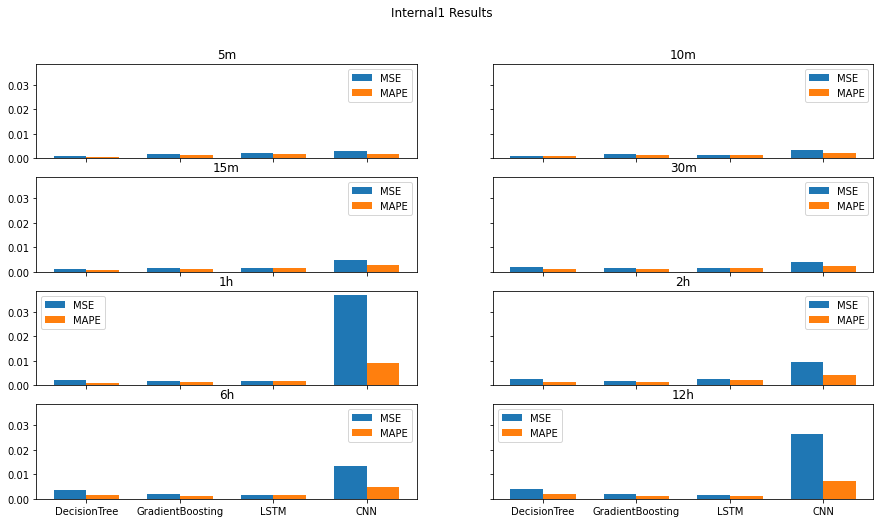

In [ ]:
# Define the data for the weather feature
time_intervals = ['5m', '10m', '15m', '30m', '1h', '2h', '6h', '12h']
models = ['DecisionTree', 'GradientBoosting', 'LSTM', 'CNN']
MSE_values_internal1 = [[0.0010633, 0.0017633, 0.0020594, 0.0031333], [0.0011931, 0.0017260, 0.0015555, 0.0033158], [0.0013829, 0.0017805, 0.0015645, 0.0047655], [0.0018279, 0.0017655, 0.0015052, 0.0039754], [0.0022163, 0.0017543, 0.0017191, 0.0367754], [0.0026805, 0.0017462, 0.0024031, 0.0094241], [0.0035817, 0.0017844, 0.0016810, 0.0132128], [0.0039243, 0.0017888, 0.0013536, 0.0263288]]
MAPE_values_internal1 = [[0.0007517, 0.0013229, 0.0018012, 0.0019713], [0.0008157, 0.0013024, 0.0015074, 0.0022170], [0.0008707, 0.0013333, 0.0014349, 0.0027490], [0.0009835, 0.0013253, 0.0015174, 0.0023429], [0.0011064, 0.0013178, 0.0017270, 0.0092066], [0.0013052, 0.0013119, 0.0021386, 0.0041263], [0.0017184, 0.0013453, 0.0014623, 0.0048388], [0.0018843, 0.0013382, 0.0012459, 0.0074415]]

# Create a grid of subplots
fig, axs = plt.subplots(4, 2, sharex=True, sharey=True, figsize=(15, 8))

# Loop through the time intervals and create a bar chart for each one
for i, interval in enumerate(time_intervals):
    x = np.arange(len(models))  # the x locations for the groups
    width = 0.35  # the width of the bars

    # Plot the MSE values
    axs[i//2, i%2].bar(x - width/2, MSE_values_internal1[i], width, label='MSE')

    # Plot the MAPE values
    axs[i//2, i%2].bar(x + width/2, MAPE_values_internal1[i], width, label='MAPE')

    # Add a title and labels
    axs[i//2, i%2].set_title(f"{interval}")
    axs[i//2, i%2].set_xticks(x)
    axs[i//2, i%2].set_xticklabels(models)
    axs[i//2, i%2].legend()

# Add a title for the entire grid
fig.suptitle("Internal1 Results")

# Show the plot
plt.show()


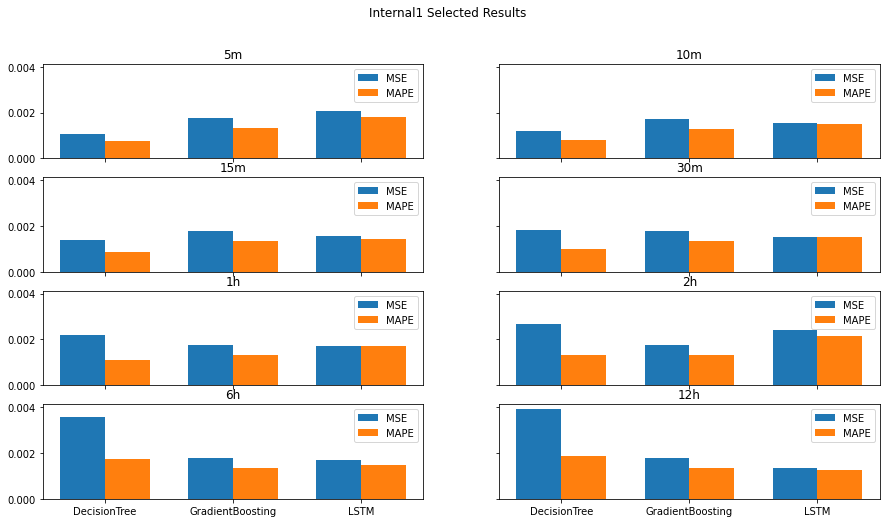

In [ ]:
# Define the data for the weather feature
time_intervals = ['5m', '10m', '15m', '30m', '1h', '2h', '6h', '12h']
models = ['DecisionTree', 'GradientBoosting', 'LSTM']
MSE_values_internal1_2 = [[0.0010633, 0.0017633, 0.0020594], [0.0011931, 0.0017260, 0.0015555], [0.0013829, 0.0017805, 0.0015645], [0.0018279, 0.0017655, 0.0015052], [0.0022163, 0.0017543, 0.0017191], [0.0026805, 0.0017462, 0.0024031], [0.0035817, 0.0017844, 0.0016810], [0.0039243, 0.0017888, 0.0013536]]
MAPE_values_internal1_2 = [[0.0007517, 0.0013229, 0.0018012], [0.0008157, 0.0013024, 0.0015074], [0.0008707, 0.0013333, 0.0014349], [0.0009835, 0.0013253, 0.0015174], [0.0011064, 0.0013178, 0.0017270], [0.0013052, 0.0013119, 0.0021386], [0.0017184, 0.0013453, 0.0014623], [0.0018843, 0.0013382, 0.0012459]]

# Create a grid of subplots
fig, axs = plt.subplots(4, 2, sharex=True, sharey=True, figsize=(15, 8))

# Loop through the time intervals and create a bar chart for each one
for i, interval in enumerate(time_intervals):
    x = np.arange(len(models))  # the x locations for the groups
    width = 0.35  # the width of the bars

    # Plot the MSE values
    axs[i//2, i%2].bar(x - width/2, MSE_values_internal1_2[i], width, label='MSE')

    # Plot the MAPE values
    axs[i//2, i%2].bar(x + width/2, MAPE_values_internal1_2[i], width, label='MAPE')

    # Add a title and labels
    axs[i//2, i%2].set_title(f"{interval}")
    axs[i//2, i%2].set_xticks(x)
    axs[i//2, i%2].set_xticklabels(models)
    axs[i//2, i%2].legend()

# Add a title for the entire grid
fig.suptitle("Internal1 Selected Results")

# Show the plot
plt.show()

######Internal2

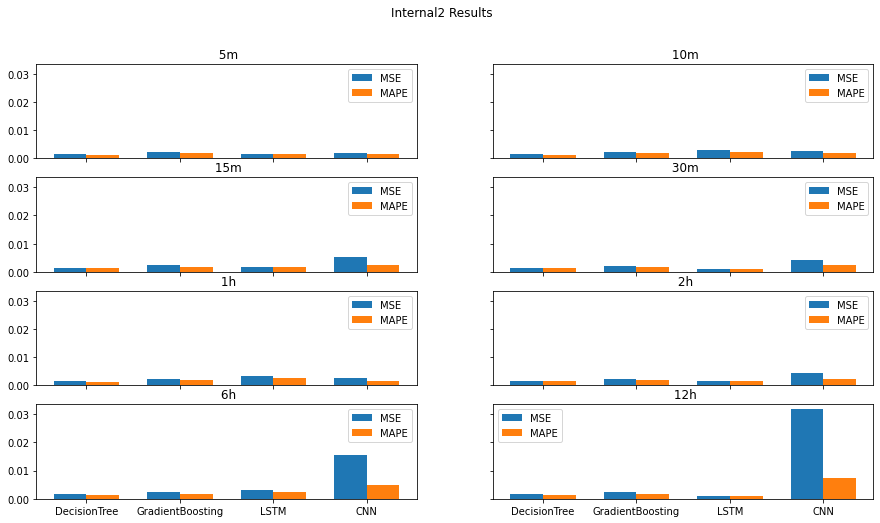

In [ ]:
# Define the data for the weather feature
time_intervals = ['5m', '10m', '15m', '30m', '1h', '2h', '6h', '12h']
models = ['DecisionTree', 'GradientBoosting', 'LSTM']
MSE_values_internal2 = [[0.0015148, 0.0022927, 0.0016543, 0.0019089], [0.0014821, 0.0022892, 0.0030740, 0.0027019], [0.0014891, 0.0023136, 0.0018968, 0.0053850], [0.0015144, 0.0022539, 0.0009466, 0.0041486], [0.0015489, 0.0022786, 0.0033568, 0.0024495], [0.0016025, 0.0022919, 0.001531, 0.0043511], [0.0016790, 0.0022937, 0.003222, 0.0155106], [0.0017090, 0.0023812, 0.0009960, 0.0318801]]
MAPE_values_internal2 = [[0.0013198, 0.0017662, 0.0015584, 0.0014707], [0.0013000, 0.0017646, 0.0023070, 0.0017561], [0.0013062, 0.0017754, 0.0017177, 0.0024740], [0.00131686, 0.0017607, 0.0011126, 0.0024985], [0.0013408, 0.0017642, 0.0025284, 0.0016511], [0.0013655, 0.0017655, 0.0015688, 0.0023582], [0.0014066, 0.0017680, 0.0023848, 0.0049810], [0.00141060, 0.0018083, 0.001133, 0.0073332]]

# Create a grid of subplots
fig, axs = plt.subplots(4, 2, sharex=True, sharey=True, figsize=(15, 8))

# Loop through the time intervals and create a bar chart for each one
for i, interval in enumerate(time_intervals):
    x = np.arange(len(models))  # the x locations for the groups
    width = 0.35  # the width of the bars

    # Plot the MSE values
    axs[i//2, i%2].bar(x - width/2, MSE_values_internal2[i], width, label='MSE')

    # Plot the MAPE values
    axs[i//2, i%2].bar(x + width/2, MAPE_values_internal2[i], width, label='MAPE')

    # Add a title and labels
    axs[i//2, i%2].set_title(f" {interval}")
    axs[i//2, i%2].set_xticks(x)
    axs[i//2, i%2].set_xticklabels(models)
    axs[i//2, i%2].legend()

# Add a title for the entire grid
fig.suptitle("Internal2 Results")

# Show the plot
plt.show()


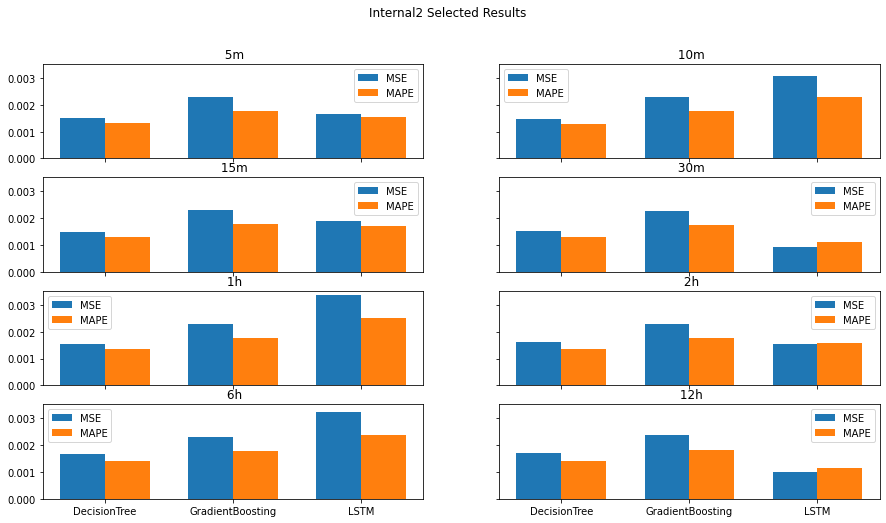

In [ ]:
# Define the data for the weather feature
time_intervals = ['5m', '10m', '15m', '30m', '1h', '2h', '6h', '12h']
models = ['DecisionTree', 'GradientBoosting', 'LSTM']
MSE_values_internal2_2 = [[0.0015148, 0.0022927, 0.0016543], [0.0014821, 0.0022892, 0.0030740], [0.0014891, 0.0023136, 0.0018968], [0.0015144, 0.0022539, 0.0009466], [0.0015489, 0.0022786, 0.0033568], [0.0016025, 0.0022919, 0.001531], [0.0016790, 0.0022937, 0.003222], [0.0017090, 0.0023812, 0.0009960]]
MAPE_values_internal2_2 = [[0.0013198, 0.0017662, 0.0015584], [0.0013000, 0.0017646, 0.0023070], [0.0013062, 0.0017754, 0.0017177], [0.00131686, 0.0017607, 0.0011126], [0.0013408, 0.0017642, 0.0025284], [0.0013655, 0.0017655, 0.0015688], [0.0014066, 0.0017680, 0.0023848], [0.00141060, 0.0018083, 0.001133]]

# Create a grid of subplots
fig, axs = plt.subplots(4, 2, sharex=True, sharey=True, figsize=(15, 8))

# Loop through the time intervals and create a bar chart for each one
for i, interval in enumerate(time_intervals):
    x = np.arange(len(models))  # the x locations for the groups
    width = 0.35  # the width of the bars

    # Plot the MSE values
    axs[i//2, i%2].bar(x - width/2, MSE_values_internal2_2[i], width, label='MSE')

    # Plot the MAPE values
    axs[i//2, i%2].bar(x + width/2, MAPE_values_internal2_2[i], width, label='MAPE')

    # Add a title and labels
    axs[i//2, i%2].set_title(f" {interval}")
    axs[i//2, i%2].set_xticks(x)
    axs[i//2, i%2].set_xticklabels(models)
    axs[i//2, i%2].legend()

# Add a title for the entire grid
fig.suptitle("Internal2 Selected Results")

# Show the plot
plt.show()

######External

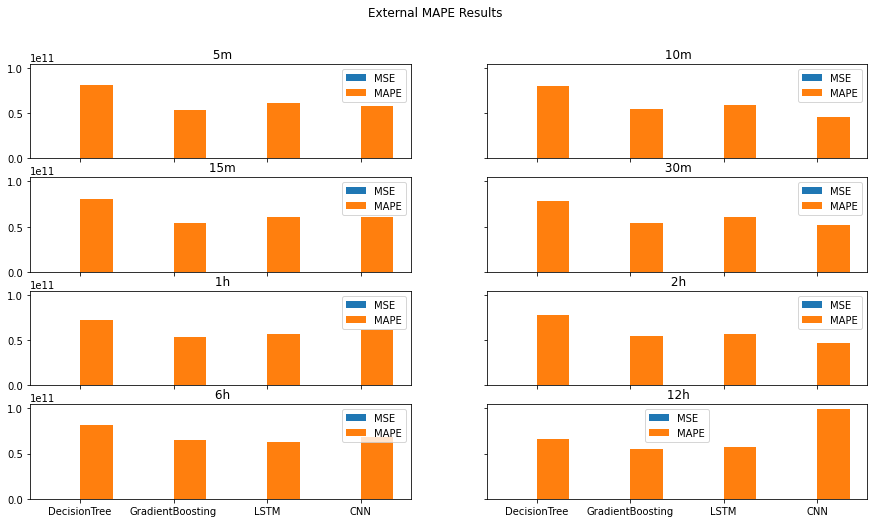

In [ ]:
# Define the data for the weather feature
time_intervals = ['5m', '10m', '15m', '30m', '1h', '2h', '6h', '12h']
models = ['DecisionTree', 'GradientBoosting', 'LSTM', 'CNN']
MSE_values_external = [[0.0831387, 0.0491845, 0.0492955, 0.1248967], [0.0915437, 0.0492839, 0.0456346, 0.0586576], [0.0936723, 0.0493532, 0.0456549, 0.1241113], [0.0961813, 0.0494057, 0.0467658, 0.0616162], [0.0996293, 0.0494006, 0.0580382, 0.0594282], [0.1049816, 0.0494230, 0.0471834, 0.0863325], [0.1109194, 0.0494876, 0.0460263, 0.0900057], [0.1112708, 0.0495672, 0.0489439, 0.0788610]]
MAPE_values_external = [[80936582143, 53988016902, 60903585182, 57550313192], [79786569847, 54257336125, 58827863216, 45756104982], [80802160207, 54595250369, 60556235855, 60363639218], [78203785986, 54481256527, 60277659895, 51994516572], [71962478414, 53877527154, 57026611780, 61713595734], [78252704118, 54168926170, 56337246266, 46814887810], [81518790248, 65108348891, 62507531471, 67971775180], [66007532227, 54519762036, 56916869446, 99530276085]]

# Create a grid of subplots
fig, axs = plt.subplots(4, 2, sharex=True, sharey=True, figsize=(15, 8))

# Loop through the time intervals and create a bar chart for each one
for i, interval in enumerate(time_intervals):
    x = np.arange(len(models))  # the x locations for the groups
    width = 0.35  # the width of the bars

    # Plot the MSE values
    axs[i//2, i%2].bar(x - width/2, MSE_values_external[i], width, label='MSE')

    # Plot the MAPE values
    axs[i//2, i%2].bar(x + width/2, MAPE_values_external[i], width, label='MAPE')

    # Add a title and labels
    axs[i//2, i%2].set_title(f" {interval}")
    axs[i//2, i%2].set_xticks(x)
    axs[i//2, i%2].set_xticklabels(models)
    axs[i//2, i%2].legend()

# Add a title for the entire grid
fig.suptitle("External MAPE Results")

# Show the plot
plt.show()

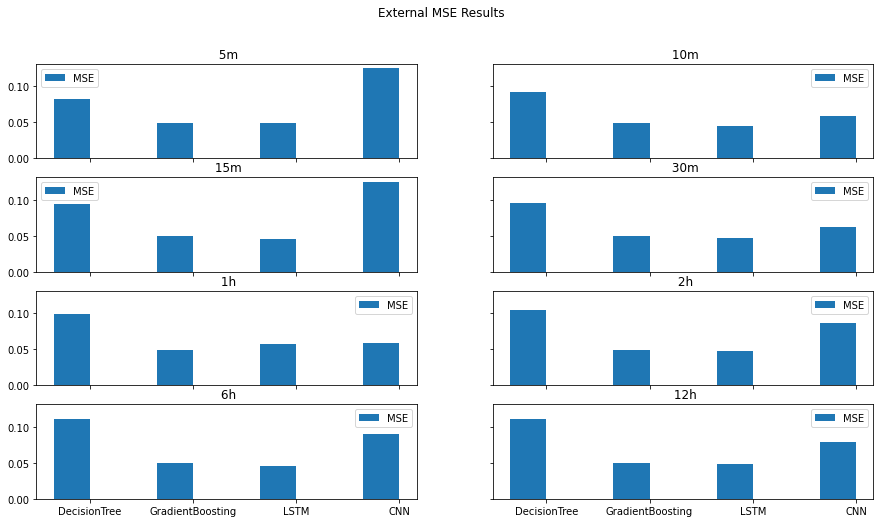

In [ ]:
# Define the data for the weather feature
time_intervals = ['5m', '10m', '15m', '30m', '1h', '2h', '6h', '12h']
models = ['DecisionTree', 'GradientBoosting', 'LSTM', 'CNN']
MSE_values_external = [[0.0831387, 0.0491845, 0.0492955, 0.1248967], [0.0915437, 0.0492839, 0.0456346, 0.0586576], [0.0936723, 0.0493532, 0.0456549, 0.1241113], [0.0961813, 0.0494057, 0.0467658, 0.0616162], [0.0996293, 0.0494006, 0.0580382, 0.0594282], [0.1049816, 0.0494230, 0.0471834, 0.0863325], [0.1109194, 0.0494876, 0.0460263, 0.0900057], [0.1112708, 0.0495672, 0.0489439, 0.0788610]]
MAPE_values_external = [[80936582143, 53988016902, 60903585182, 57550313192], [79786569847, 54257336125, 58827863216, 45756104982], [80802160207, 54595250369, 60556235855, 60363639218], [78203785986, 54481256527, 60277659895, 51994516572], [71962478414, 53877527154, 57026611780, 61713595734], [78252704118, 54168926170, 56337246266, 46814887810], [81518790248, 65108348891, 62507531471, 67971775180], [66007532227, 54519762036, 56916869446, 99530276085]]

# Create a grid of subplots
fig, axs = plt.subplots(4, 2, sharex=True, sharey=True, figsize=(15, 8))

# Loop through the time intervals and create a bar chart for each one
for i, interval in enumerate(time_intervals):
    x = np.arange(len(models))  # the x locations for the groups
    width = 0.35  # the width of the bars

    # Plot the MSE values
    axs[i//2, i%2].bar(x - width/2, MSE_values_external[i], width, label='MSE')

    # Plot the MAPE values
    #axs[i//2, i%2].bar(x + width/2, MAPE_values_external[i], width, label='MAPE')

    # Add a title and labels
    axs[i//2, i%2].set_title(f" {interval}")
    axs[i//2, i%2].set_xticks(x)
    axs[i//2, i%2].set_xticklabels(models)
    axs[i//2, i%2].legend()

# Add a title for the entire grid
fig.suptitle("External MSE Results")

# Show the plot
plt.show()

######CPUtemp

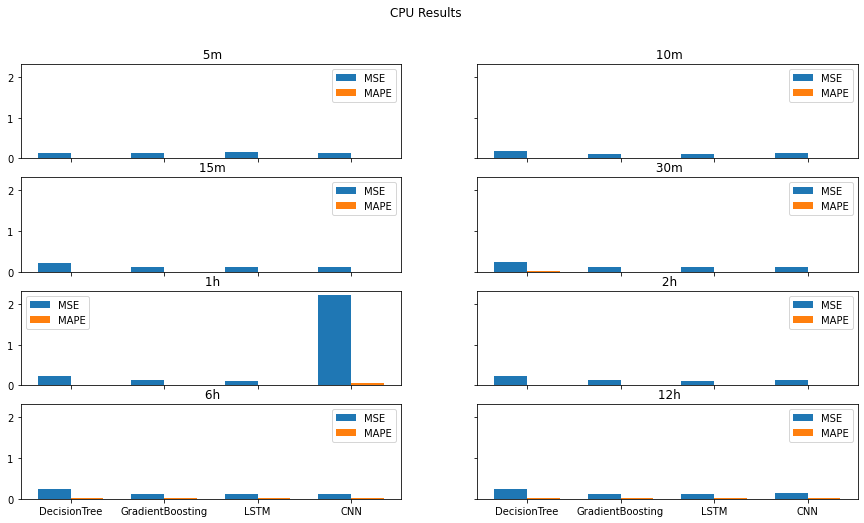

In [ ]:
# Define the data for the weather feature
time_intervals = ['5m', '10m', '15m', '30m', '1h', '2h', '6h', '12h']
models = ['DecisionTree', 'GradientBoosting', 'LSTM', 'CNN']
MSE_values_cpu = [[0.1252709, 0.1252048, 0.1621863, 0.1351067], [0.1808306, 0.1207166, 0.1172922, 0.1221842], [0.2223122, 0.1205254, 0.1225730, 0.1226838], [0.2392606, 0.1208323, 0.1140113, 0.1180024], [0.2385061, 0.1206065, 0.1136961, 2.2112652], [0.2366521, 0.1210423, 0.1151222, 0.1275192], [0.2386262, 0.1208155, 0.1231666, 0.1282857], [0.2392757, 0.1212465, 0.1123618, 0.1348187]]
MAPE_values_cpu = [[0.0085042, 0.0084652, 0.0100723, 0.0089879], [0.0093041, 0.0083331, 0.0081991, 0.0083033], [0.0098861, 0.0083173, 0.0085188, 0.0084870], [0.0101663, 0.0083262, 0.0080798, 0.0082330], [0.0100805, 0.0083148, 0.0080604, 0.0457958], [0.0100202, 0.0083296, 0.0082010, 0.0086470], [0.0101116, 0.0083283, 0.0084785, 0.0087251], [0.0101088, 0.0083404, 0.0080244, 0.0089223]]

# Create a grid of subplots
fig, axs = plt.subplots(4, 2, sharex=True, sharey=True, figsize=(15, 8))

# Loop through the time intervals and create a bar chart for each one
for i, interval in enumerate(time_intervals):
    x = np.arange(len(models))  # the x locations for the groups
    width = 0.35  # the width of the bars

    # Plot the MSE values
    axs[i//2, i%2].bar(x - width/2, MSE_values_cpu[i], width, label='MSE')

    # Plot the MAPE values
    axs[i//2, i%2].bar(x + width/2, MAPE_values_cpu[i], width, label='MAPE')

    # Add a title and labels
    axs[i//2, i%2].set_title(f" {interval}")
    axs[i//2, i%2].set_xticks(x)
    axs[i//2, i%2].set_xticklabels(models)
    axs[i//2, i%2].legend()

# Add a title for the entire grid
fig.suptitle("CPU Results")

# Show the plot
plt.show()

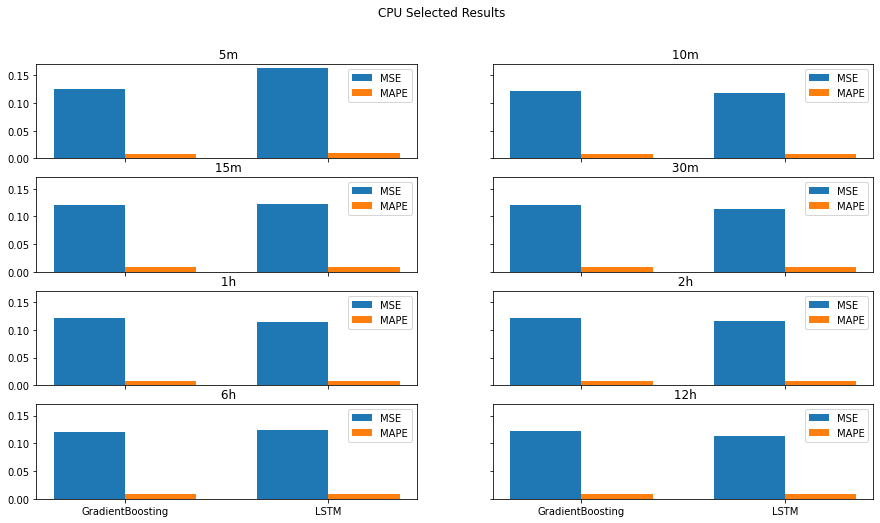

In [ ]:
# Define the data for the weather feature
time_intervals = ['5m', '10m', '15m', '30m', '1h', '2h', '6h', '12h']
models = ['GradientBoosting', 'LSTM']
MSE_values_cpu_2 = [[0.1252048, 0.1621863], [0.1207166, 0.1172922], [.1205254, 0.1225730], [0.1208323, 0.1140113], [0.1206065, 0.1136961], [0.1210423, 0.1151222], [0.1208155, 0.1231666], [0.1212465, 0.1123618]]
MAPE_values_cpu_2 = [[0.0084652, 0.0100723], [0.0083331, 0.0081991], [0.0083173, 0.0085188], [0.0083262, 0.0080798], [0.0083148, 0.0080604], [0.0083296, 0.0082010], [0.0083283, 0.0084785], [0.0083404, 0.0080244]]

# Create a grid of subplots
fig, axs = plt.subplots(4, 2, sharex=True, sharey=True, figsize=(15, 8))

# Loop through the time intervals and create a bar chart for each one
for i, interval in enumerate(time_intervals):
    x = np.arange(len(models))  # the x locations for the groups
    width = 0.35  # the width of the bars

    # Plot the MSE values
    axs[i//2, i%2].bar(x - width/2, MSE_values_cpu_2[i], width, label='MSE')

    # Plot the MAPE values
    axs[i//2, i%2].bar(x + width/2, MAPE_values_cpu_2[i], width, label='MAPE')

    # Add a title and labels
    axs[i//2, i%2].set_title(f" {interval}")
    axs[i//2, i%2].set_xticks(x)
    axs[i//2, i%2].set_xticklabels(models)
    axs[i//2, i%2].legend()

# Add a title for the entire grid
fig.suptitle("CPU Selected Results")

# Show the plot
plt.show()

######Air

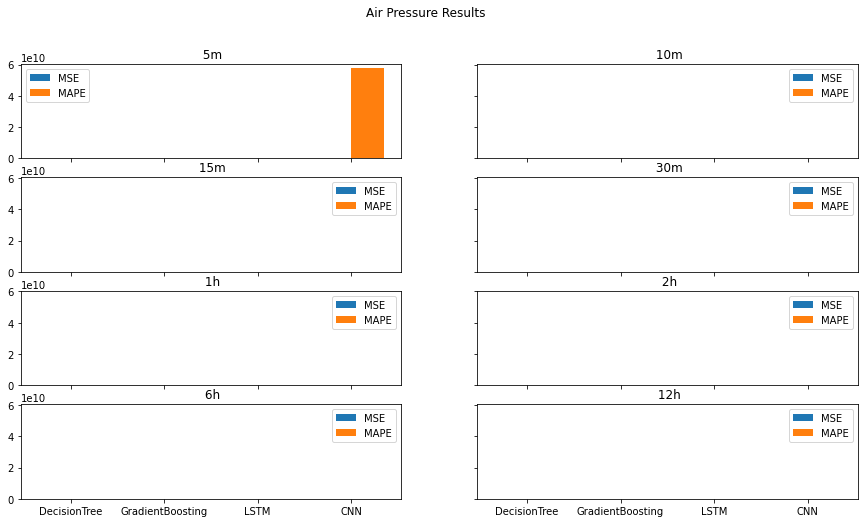

In [ ]:
# Define the data for the weather feature
time_intervals = ['5m', '10m', '15m', '30m', '1h', '2h', '6h', '12h']
models = ['DecisionTree', 'GradientBoosting', 'LSTM', 'CNN']
MSE_values_air1 = [[0.0027055, 0.0174893, 91148, 0.0478236], [0.0026466, 0.0000992, 158662, 0.4874651], [0.0026598, 0.0168429, 108638, 0.0154769], [0.0026995, 0.0174048, 250957, 2.4537732], [0.0027363, 0.0178666, 148991, 11.1006494], [0.0027762, 0.0173253, 124500, 6.6742276], [0.0028078, 0.0173805, 107657, 31], [0.0029018, 0.0180100, 203403, 10]]
MAPE_values_air1 = [[0.0000361, 0.0000995, 0.3024147, 57550313192], [0.0000358, 0.0083331, 0.3991358, 0.0006936], [0.0000979, 0.0083173, 0.3301997, 0.0000866], [0.0000361, 0.0000991, 0.5020740, 0.0015605], [0.0000364, 0.0001000, 0.3867693, 0.0033256], [0.0000369, 0.0000992, 0.3535175, 0.0025376], [0.0000372, 0.0000992, 0.3287071, 0.0054634], [0.0000380, 0.0001007, 0.4519797, 0.0028057]]

# Create a grid of subplots
fig, axs = plt.subplots(4, 2, sharex=True, sharey=True, figsize=(15, 8))

# Loop through the time intervals and create a bar chart for each one
for i, interval in enumerate(time_intervals):
    x = np.arange(len(models))  # the x locations for the groups
    width = 0.35  # the width of the bars

    # Plot the MSE values
    axs[i//2, i%2].bar(x - width/2, MSE_values_air1[i], width, label='MSE')

    # Plot the MAPE values
    axs[i//2, i%2].bar(x + width/2, MAPE_values_air1[i], width, label='MAPE')

    # Add a title and labels
    axs[i//2, i%2].set_title(f" {interval}")
    axs[i//2, i%2].set_xticks(x)
    axs[i//2, i%2].set_xticklabels(models)
    axs[i//2, i%2].legend()

# Add a title for the entire grid
fig.suptitle("Air Pressure Results")

# Show the plot
plt.show()

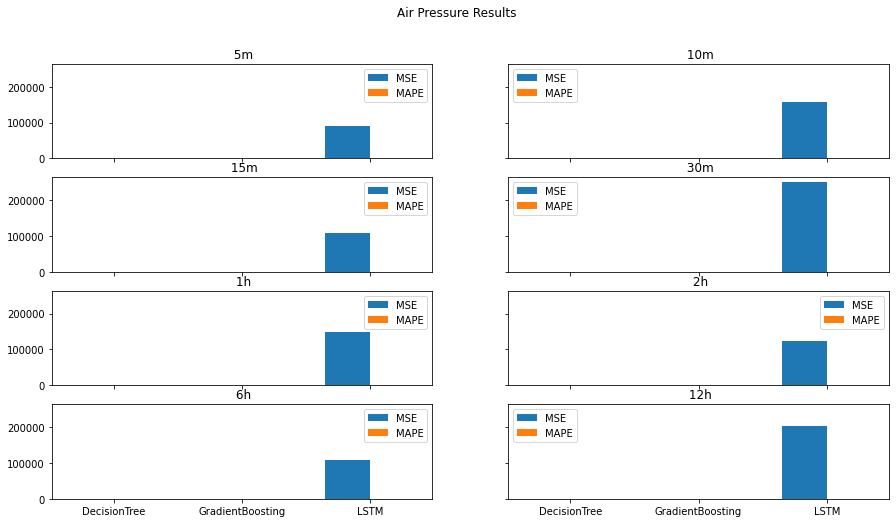

In [ ]:
# Define the data for the weather feature
time_intervals = ['5m', '10m', '15m', '30m', '1h', '2h', '6h', '12h']
models = ['DecisionTree', 'GradientBoosting', 'LSTM']
MSE_values_air1 = [[0.0027055, 0.0174893, 91148], [0.0026466, 0.0000992, 158662], [0.0026598, 0.0168429, 108638], [0.0026995, 0.0174048, 250957], [0.0027363, 0.0178666, 148991], [0.0027762, 0.0173253, 124500], [0.0028078, 0.0173805, 107657], [0.0029018, 0.0180100, 203403]]
MAPE_values_air1 = [[0.0000361, 0.0000995, 0.3024147], [0.0000358, 0.0083331, 0.3991358], [0.0000979, 0.0083173, 0.3301997], [0.0000361, 0.0000991, 0.5020740], [0.0000364, 0.0001000, 0.3867693], [0.0000369, 0.0000992, 0.3535175], [0.0000372, 0.0000992, 0.3287071], [0.0000380, 0.0001007, 0.4519797]]

# Create a grid of subplots
fig, axs = plt.subplots(4, 2, sharex=True, sharey=True, figsize=(15, 8))

# Loop through the time intervals and create a bar chart for each one
for i, interval in enumerate(time_intervals):
    x = np.arange(len(models))  # the x locations for the groups
    width = 0.35  # the width of the bars

    # Plot the MSE values
    axs[i//2, i%2].bar(x - width/2, MSE_values_air1[i], width, label='MSE')

    # Plot the MAPE values
    axs[i//2, i%2].bar(x + width/2, MAPE_values_air1[i], width, label='MAPE')

    # Add a title and labels
    axs[i//2, i%2].set_title(f" {interval}")
    axs[i//2, i%2].set_xticks(x)
    axs[i//2, i%2].set_xticklabels(models)
    axs[i//2, i%2].legend()

# Add a title for the entire grid
fig.suptitle("Air Pressure Results")

# Show the plot
plt.show()

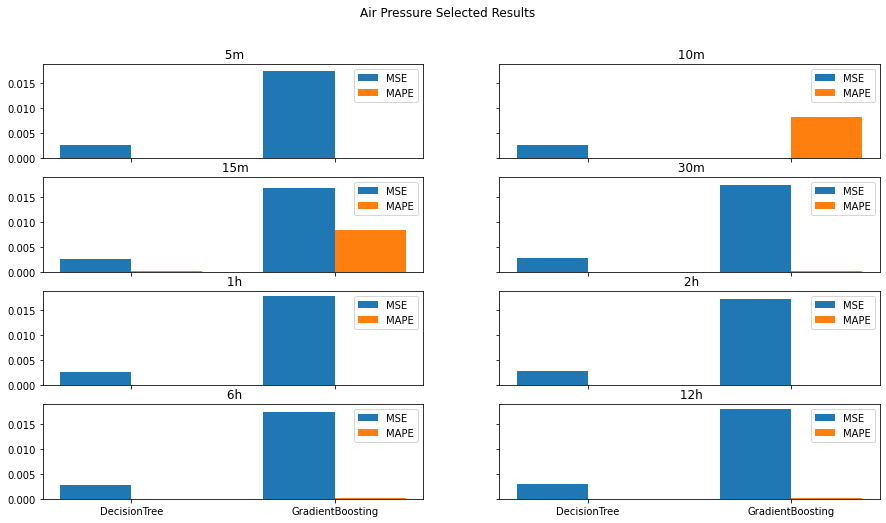

In [ ]:
# Define the data for the weather feature (with LSTM & CNN removed)
time_intervals = ['5m', '10m', '15m', '30m', '1h', '2h', '6h', '12h']
models = ['DecisionTree', 'GradientBoosting']
MSE_values_air2 = [[0.0027055, 0.0174893], [0.0026466, 0.00009921], [0.0026598, 0.0168429], [0.0026995, 0.0174048], [0.0027363, 0.0178666], [0.0027762, 0.0173253], [0.0028078, 0.0173805], [0.0029018, 0.0180100]]
MAPE_values_air2 = [[0.0000361, 0.0000995], [0.0000358, 0.0083331], [0.0000979, 0.0083173], [0.0000361, 0.0000991], [0.0000364, 0.0001000], [0.0000369, 0.0000992], [0.0000372, 0.0000992], [0.0000380, 0.0001007]]

# Create a grid of subplots
fig, axs = plt.subplots(4, 2, sharex=True, sharey=True, figsize=(15, 8))

# Loop through the time intervals and create a bar chart for each one
for i, interval in enumerate(time_intervals):
    x = np.arange(len(models))  # the x locations for the groups
    width = 0.35  # the width of the bars

    # Plot the MSE values
    axs[i//2, i%2].bar(x - width/2, MSE_values_air2[i], width, label='MSE')

    # Plot the MAPE values
    axs[i//2, i%2].bar(x + width/2, MAPE_values_air2[i], width, label='MAPE')

    # Add a title and labels
    axs[i//2, i%2].set_title(f" {interval}")
    axs[i//2, i%2].set_xticks(x)
    axs[i//2, i%2].set_xticklabels(models)
    axs[i//2, i%2].legend()

# Add a title for the entire grid
fig.suptitle("Air Pressure Selected Results")

# Show the plot
plt.show()

######Humidity

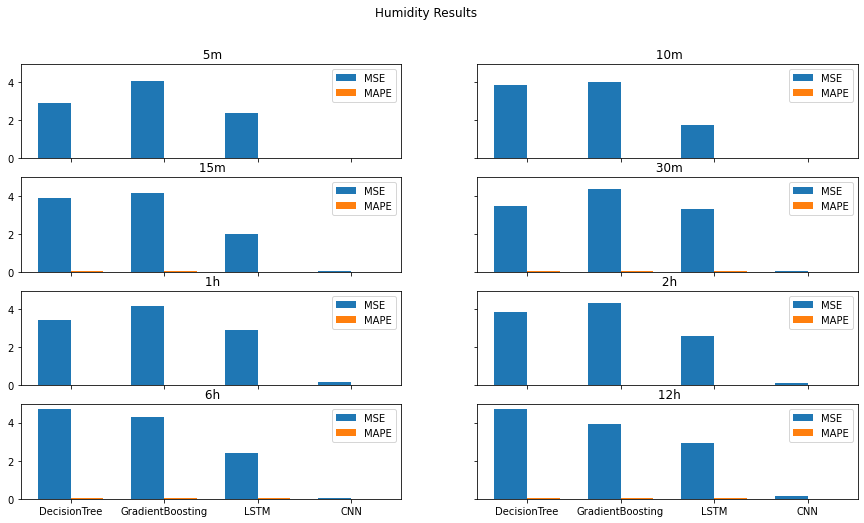

In [ ]:
# Define the data for the weather feature
time_intervals = ['5m', '10m', '15m', '30m', '1h', '2h', '6h', '12h']
models = ['DecisionTree', 'GradientBoosting', 'LSTM', 'CNN']
MSE_values_hum1 = [[2.9277, 4.0387, 2.3994, 0.0190430], [3.8567, 4.0347, 1.7519, 0.0149511], [3.8579, 4.1218, 2.0148, 0.0241733], [3.4479, 4.3481, 3.2832, 0.0419255], [3.4507, 4.1853, 2.9149, 0.1951073], [3.8381, 4.3367, 2.6096, 0.1268931], [4.7105, 4.2943, 2.4214, 0.0303838], [4.7243, 3.9079, 2.9271, 0.1253820]]
MAPE_values_hum1 = [[0.0204687, 0.0253033, 0.0192365, 0.0017456], [0.0245675, 0.0252892, 0.0156111, 0.0015873], [0.024604, 0.0256502, 0.0168080, 0.0019218], [0.0228612, 0.0265723, 0.02246429, 0.0033820], [0.0229220, 0.0258981, 0.021020188, 0.009134949], [0.0245812, 0.0265376, 0.0193648998, 0.007040697], [0.02829439, 0.02638394, 0.018220715597, 0.00257801545], [0.0284861951, 0.02478569, 0.02152405165, 0.006833056]]

# Create a grid of subplots
fig, axs = plt.subplots(4, 2, sharex=True, sharey=True, figsize=(15, 8))

# Loop through the time intervals and create a bar chart for each one
for i, interval in enumerate(time_intervals):
    x = np.arange(len(models))  # the x locations for the groups
    width = 0.35  # the width of the bars

    # Plot the MSE values
    axs[i//2, i%2].bar(x - width/2, MSE_values_hum1[i], width, label='MSE')

    # Plot the MAPE values
    axs[i//2, i%2].bar(x + width/2, MAPE_values_hum1[i], width, label='MAPE')

    # Add a title and labels
    axs[i//2, i%2].set_title(f" {interval}")
    axs[i//2, i%2].set_xticks(x)
    axs[i//2, i%2].set_xticklabels(models)
    axs[i//2, i%2].legend()

# Add a title for the entire grid
fig.suptitle("Humidity Results")

# Show the plot
plt.show()

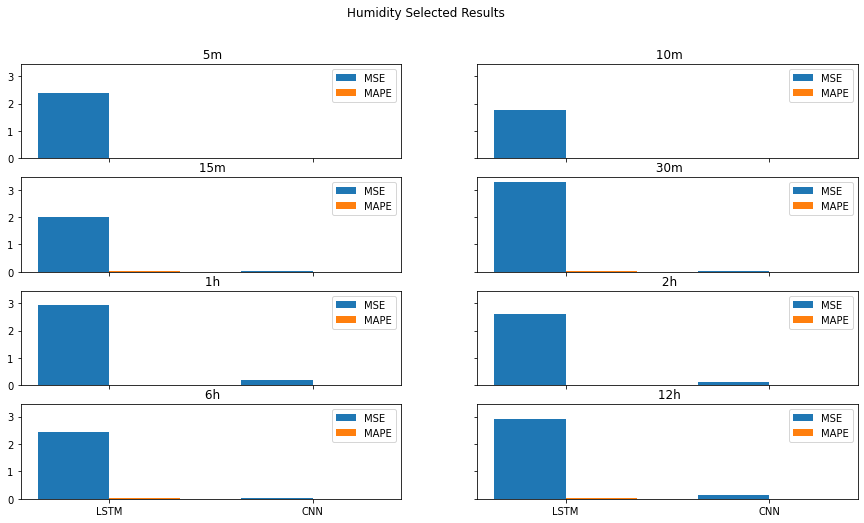

In [ ]:
# Define the data for the weather feature
time_intervals = ['5m', '10m', '15m', '30m', '1h', '2h', '6h', '12h']
models = ['LSTM', 'CNN']
MSE_values_hum2 = [[2.3994, 0.0190430], [1.7519, 0.0149511], [2.0148, 0.0241733], [3.2832, 0.0419255], [2.9149, 0.1951073], [2.6096, 0.1268931], [2.4214, 0.0303838], [2.9271, 0.1253820]]
MAPE_values_hum2 = [[0.0192365, 0.0017456], [0.0156111, 0.0015873], [0.0168080, 0.0019218], [0.02246429, 0.0033820], [0.021020188, 0.009134949], [0.0193648998, 0.007040697], [0.018220715597, 0.00257801545], [0.02152405165, 0.006833056]]

# Create a grid of subplots
fig, axs = plt.subplots(4, 2, sharex=True, sharey=True, figsize=(15, 8))

# Loop through the time intervals and create a bar chart for each one
for i, interval in enumerate(time_intervals):
    x = np.arange(len(models))  # the x locations for the groups
    width = 0.35  # the width of the bars

    # Plot the MSE values
    axs[i//2, i%2].bar(x - width/2, MSE_values_hum2[i], width, label='MSE')

    # Plot the MAPE values
    axs[i//2, i%2].bar(x + width/2, MAPE_values_hum2[i], width, label='MAPE')

    # Add a title and labels
    axs[i//2, i%2].set_title(f" {interval}")
    axs[i//2, i%2].set_xticks(x)
    axs[i//2, i%2].set_xticklabels(models)
    axs[i//2, i%2].legend()

# Add a title for the entire grid
fig.suptitle("Humidity Selected Results")

# Show the plot
plt.show()